In [4]:
source venv/bin/activate && pip install fuzzywuzzy python-Levenshtein

SyntaxError: invalid syntax (3952923813.py, line 1)

In [2]:
pip install fuzzywuzzy python-Levenshtein

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 9.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import os

# Controlliamo un campionato alla volta
league = "Championship"  # possiamo cambiarlo per controllare gli altri
base_path = "/Users/federico/dash_project/pages"

# Path per i vari tipi di file
if league == "Serie_A":
    fbref_path = f"{base_path}/data_serie_a_24-25"
else:
    fbref_path = f"{base_path}/{league}/data_{league.lower()}_24-25"

capology_path = f"{base_path}/Salari_Capology/{league}"

# Vediamo le squadre presenti
print(f"\nSquadre in {league}:")
print("\nFile FBRef:")
print([f for f in os.listdir(fbref_path) if f.endswith('.csv') and not f.endswith('_transfermarkt.csv')])

print("\nFile Transfermarkt:")
print([f for f in os.listdir(fbref_path) if f.endswith('_transfermarkt.csv')])

print("\nCartelle Capology:")
if os.path.exists(capology_path):
    print([d for d in os.listdir(capology_path) if os.path.isdir(os.path.join(capology_path, d))])
else:
    print("Cartella Capology non trovata")


Squadre in Championship:

File FBRef:
['Coventry_City_wyscout.csv', 'Swansea_City_wyscout.csv', 'Stoke_City.csv', 'Sunderland_wyscout.csv', 'Middlesbrough.csv', 'Derby_County_wyscout.csv', 'Hull_City_wyscout.csv', 'Norwich_City_wyscout.csv', 'Burnley.csv', 'Plymouth_Argyle_wyscout.csv', 'Cardiff_City_wyscout.csv', 'Oxford_United_wyscout.csv', 'Sheffield_Wednesday_wyscout.csv', 'West_Bromwich_Albion.csv', 'Queens_Park_Rangers.csv', 'Coventry_City.csv', 'clasificacion.csv', 'Queens_Park_Rangers_wyscout.csv', 'Bristol_City_wyscout.csv', 'Luton_Town.csv', 'West_Bromwich_Albion_wyscout.csv', 'Stoke_City_wyscout.csv', 'Norwich_City.csv', 'Portsmouth_wyscout.csv', 'Middlesbrough_wyscout.csv', 'Blackburn_Rovers.csv', 'Millwall_wyscout.csv', 'Portsmouth.csv', 'Preston_North_End.csv', 'Cardiff_City.csv', 'Burnley_wyscout.csv', 'Millwall.csv', 'Championship_24-25.csv', 'Watford.csv', 'Plymouth_Argyle.csv', 'Blackburn_Rovers_wyscout.csv', 'Sheffield_Wednesday.csv', 'Bristol_City.csv', 'Leeds_Unit

In [32]:
import os

def clean_team_name(filename):
    # Rimuove le estensioni e i suffissi comuni
    name = filename.replace('.csv', '')
    name = name.replace('_wyscout', '')
    name = name.replace('_transfermarkt', '')
    return name

def get_teams_differences(league):
    base_path = "/Users/federico/dash_project/pages"
    
    # Percorsi
    if league == "Serie_A":
        fbref_path = f"{base_path}/data_serie_a_24-25"
    else:
        fbref_path = f"{base_path}/{league}/data_{league.lower()}_24-25"
    
    capology_path = f"{base_path}/Salari_Capology/{league}"
    
    # Ottiene le squadre da FBRef (escludendo i file wyscout e altri file non necessari)
    fbref_files = [f for f in os.listdir(fbref_path) if f.endswith('.csv') 
                   and not f.endswith('_wyscout.csv')
                   and not 'clasificacion' in f
                   and not f.startswith(league)]
    
    fbref_teams = set(clean_team_name(f) for f in fbref_files)
    
    # Ottiene le squadre da Capology
    capology_teams = set(os.listdir(capology_path))
    
    # Trova le differenze
    only_in_fbref = fbref_teams - capology_teams
    only_in_capology = capology_teams - fbref_teams
    
    print(f"\nDifferenze per {league}:")
    if only_in_fbref:
        print(f"\nSquadre solo in FBRef:")
        print(sorted(only_in_fbref))
    if only_in_capology:
        print(f"\nSquadre solo in Capology:")
        print(sorted(only_in_capology))
    if not only_in_fbref and not only_in_capology:
        print("Nessuna differenza trovata! ✅")

# Test per un campionato
league = "Süper_Lig"  # Puoi cambiare questo per testare altri campionati
get_teams_differences(league)


Differenze per Süper_Lig:

Squadre solo in FBRef:
['Beşiktaş', 'Eyüpspor', 'Fenerbahçe', 'Göztepe', 'Kasımpaşa', 'Super_Lig_2024-2025']


In [16]:
import pandas as pd
import os

def compare_team_names(league):
    base_path = "/Users/federico/dash_project/pages"
    
    # Percorsi
    if league == "Serie_A":
        league_path = f"{base_path}/data_serie_a_24-25"
        league_file = f"{league_path}/{league}_24-25.csv"
    else:
        league_path = f"{base_path}/{league}/data_{league.lower()}_24-25"
        league_file = f"{league_path}/{league}_24-25.csv"
    
    # Leggi il file generale del campionato
    df_league = pd.read_csv(league_file)
    league_teams = set(df_league['Equipo'].unique())
    
    # Ottieni i nomi dai file delle squadre (FBRef)
    fbref_files = [f.replace('.csv', '') for f in os.listdir(league_path) 
                   if f.endswith('.csv') 
                   and not f.endswith('_wyscout.csv')
                   and not f.endswith('_transfermarkt.csv')
                   and not 'clasificacion' in f
                   and not f.startswith(league)]
    
    # Ottieni i nomi dai file transfermarkt
    transfermarkt_files = [f.replace('_transfermarkt.csv', '') for f in os.listdir(league_path) 
                          if f.endswith('_transfermarkt.csv')]
    
    print(f"\nComparazione nomi squadre per {league}:")
    print("\nNomi nel file generale (Equipo):")
    print(sorted(league_teams))
    print("\nNomi nei file FBRef:")
    print(sorted(fbref_files))
    print("\nNomi nei file Transfermarkt:")
    print(sorted(transfermarkt_files))
    
    # Trova le differenze
    print("\nDifferenze trovate:")
    all_names = set(list(league_teams) + fbref_files + transfermarkt_files)
    for team in all_names:
        variants = []
        if team in league_teams:
            variants.append("file generale")
        if team in fbref_files:
            variants.append("file FBRef")
        if team in transfermarkt_files:
            variants.append("file Transfermarkt")
        if len(variants) < 3:  # se il nome non appare in tutte e tre le fonti
            print(f"{team}: presente in {', '.join(variants)}")

# Test per Serie A
league = "Süper_Lig"
compare_team_names(league)


Comparazione nomi squadre per Süper_Lig:

Nomi nel file generale (Equipo):
['Adana Demirspor', 'Alanyaspor', 'Antalyaspor', 'BB Bodrumspor', 'Başakşehir', 'Beşiktaş', 'Eyüpspor', 'Fenerbahçe', 'Galatasaray', 'Gaziantep FK', 'Göztepe', 'Hatayspor', 'Kasımpaşa', 'Kayserispor', 'Konyaspor', 'Rizespor', 'Samsunspor', 'Sivasspor', 'Trabzonspor']

Nomi nei file FBRef:
['Adana_Demirspor', 'Alanyaspor', 'Antalyaspor', 'BB_Bodrumspor', 'Başakşehir', 'Beşiktaş', 'Eyüpspor', 'Fenerbahçe', 'Galatasaray', 'Gaziantep_FK', 'Göztepe', 'Hatayspor', 'Kasımpaşa', 'Kayserispor', 'Konyaspor', 'Rizespor', 'Samsunspor', 'Sivasspor', 'Super_Lig_2024-2025', 'Trabzonspor']

Nomi nei file Transfermarkt:
['Alanyaspor', 'Antalyaspor', 'BB_Bodrumspor', 'Başakşehir', 'Beşiktaş', 'Eyüpspor', 'Fenerbahçe', 'Galatasaray', 'Gaziantep_FK', 'Göztepe', 'Hatayspor', 'Kasımpaşa', 'Kayserispor', 'Konyaspor', 'Rizespor', 'Samsunspor', 'Sivasspor', 'Süper_Lig', 'Trabzonspor']

Differenze trovate:
Göztepe: presente in fil

In [5]:
# Scout Analysis Development

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', None)
sns.set_theme()

In [6]:
# BASE_PATH punta alla cartella 'pages'
BASE_PATH = "/Users/federico/dash_project/pages"

LEAGUE_WEIGHTS = {
    "Serie_A": 2.0,
    "EPL": 2.0, 
    "La_Liga": 2.0,
    "Bundesliga": 2.0,
    "Ligue_1": 2.0,
    "Primeira_Liga": 1.5,
    "Eredivisie": 1.5,
    "Süper_Lig": 1.5,
    "MLS": 1.0,
    "Championship": 1.0
}

LEAGUE_PATHS = {
    "Serie_A": "data_serie_a_24-25",
    "EPL": "EPL/data_EPL_24-25",
    "La_Liga": "La_Liga/data_La_Liga_24-25",
    "Bundesliga": "Bundesliga/data_Bundesliga_24-25",
    "Ligue_1": "Ligue_1/data_Ligue_1_24-25",
    "Primeira_Liga": "Primeira_Liga/data_Primeira_Liga_24-25",
    "Eredivisie": "Eredivisie/data_Eredivisie_24-25",
    "Championship": "Championship/data_Championship_24-25",
    "Süper_Lig": "Süper_Lig/data_Süper_Lig_24-25",
    "MLS": "MLS/data_MLS_24"
}

In [7]:
# Controllo esistenza directory per ogni lega
for league, rel_path in LEAGUE_PATHS.items():
    abs_path = os.path.join(BASE_PATH, rel_path)
    if os.path.exists(abs_path):
        print(f"✅ {league}: {abs_path}  --> ESISTE")
    else:
        print(f"❌ {league}: {abs_path}  --> NON TROVATA")

✅ Serie_A: /Users/federico/dash_project/pages/data_serie_a_24-25  --> ESISTE
✅ EPL: /Users/federico/dash_project/pages/EPL/data_EPL_24-25  --> ESISTE
✅ La_Liga: /Users/federico/dash_project/pages/La_Liga/data_La_Liga_24-25  --> ESISTE
✅ Bundesliga: /Users/federico/dash_project/pages/Bundesliga/data_Bundesliga_24-25  --> ESISTE
✅ Ligue_1: /Users/federico/dash_project/pages/Ligue_1/data_Ligue_1_24-25  --> ESISTE
✅ Primeira_Liga: /Users/federico/dash_project/pages/Primeira_Liga/data_Primeira_Liga_24-25  --> ESISTE
✅ Eredivisie: /Users/federico/dash_project/pages/Eredivisie/data_Eredivisie_24-25  --> ESISTE
✅ Championship: /Users/federico/dash_project/pages/Championship/data_Championship_24-25  --> ESISTE
✅ Süper_Lig: /Users/federico/dash_project/pages/Süper_Lig/data_Süper_Lig_24-25  --> ESISTE
✅ MLS: /Users/federico/dash_project/pages/MLS/data_MLS_24  --> ESISTE


In [8]:
def clean_market_value(value):
    if pd.isna(value) or not isinstance(value, str):
        return 0.0
    try:
        value = value.replace('€', '').strip()
        if 'm' in value.lower():
            return float(value.lower().replace('m', ''))
        elif 'k' in value.lower():
            return float(value.lower().replace('k', '')) / 1000
        return float(value)
    except:
        return 0.0

def clean_salary(value):
    if pd.isna(value):
        return 0.0
    try:
        value = str(value).replace('€', '').replace(' ', '').replace(',', '')
        return float(value) / 1_000_000
    except:
        return 0.0

In [9]:
def load_league_data(league):
    league_path = os.path.join(BASE_PATH, LEAGUE_PATHS[league])
    if not os.path.exists(league_path):
        print(f"Directory {league} non trovata")
        return None
    
    all_files = [f for f in os.listdir(league_path) 
                 if f.endswith('.csv') and 
                 not any(x in f for x in ['clasificacion', 'marcatori', '_wyscout'])]
    
    league_data = []
    for file_name in all_files:
        team_name = file_name.replace('.csv', '').replace('_transfermarkt', '')
        file_path = os.path.join(league_path, file_name)
        try:
            df = pd.read_csv(file_path)
            df['Team'] = team_name
            df['League'] = league
            league_data.append(df)
        except Exception as e:
            print(f"Errore nel caricamento di {file_name}: {str(e)}")
    
    if not league_data:
        return None
    
    return pd.concat(league_data, ignore_index=True)

# Carica i dati di tutte le leghe
all_leagues_data = {}
for league in LEAGUE_WEIGHTS.keys():
    print(f"Caricamento {league}...")
    league_data = load_league_data(league)
    if league_data is not None:
        all_leagues_data[league] = league_data
        print(f"Caricati {len(league_data)} giocatori da {league}")

if all_leagues_data:
    all_players_df = pd.concat(all_leagues_data.values(), ignore_index=True)
    print(f"\nTotale giocatori caricati: {len(all_players_df)}")
    print("\nColonne disponibili:")
    print(all_players_df.columns.tolist())

Caricamento Serie_A...
Caricati 1431 giocatori da Serie_A
Caricamento EPL...
Caricati 1326 giocatori da EPL
Caricamento La_Liga...
Caricati 1307 giocatori da La_Liga
Caricamento Bundesliga...
Caricati 1137 giocatori da Bundesliga
Caricamento Ligue_1...
Caricati 1199 giocatori da Ligue_1
Caricamento Primeira_Liga...
Caricati 1209 giocatori da Primeira_Liga
Caricamento Eredivisie...
Caricati 1218 giocatori da Eredivisie
Caricamento Süper_Lig...
Caricati 1327 giocatori da Süper_Lig
Caricamento MLS...
Caricati 1963 giocatori da MLS
Caricamento Championship...
Caricati 1752 giocatori da Championship

Totale giocatori caricati: 13869

Colonne disponibili:
['Number', 'Name', 'Position', 'Date of Birth/Age', 'Nationality', 'Height', 'Foot', 'Signed', 'Previous Team', 'Contract Until', 'Market Value', 'Link', 'Team', 'League', 'Jugador', 'País', 'Posc', 'Edad', 'PJ', 'Titular', 'Mín', '90 s', 'Gls.', 'Ass', 'G+A', 'G-TP', 'TP', 'TPint', 'TA', 'TR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP

Anteprima dei dati:


,Number,Name,Position,Date of Birth/Age,Nationality,Height,Foot,Signed,Previous Team,Contract Until,Market Value,Link,Team,League,Jugador,País,Posc,Edad,PJ,Titular,Mín,90 s,Gls.,Ass,G+A,G-TP,TP,TPint,TA,TR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls..1,Ast,G+A.1,G-TP.1,G+A-TP,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Partidos,ACT,SCA90,PassLive_SCA,PassDead_SCA,HASTA_SCA,Dis_SCA,FR_SCA,Def_SCA,ACG,GCA90,PassLive_GCA,PassDead_GCA,HASTA_GCA,Dis_GCA,FR_GCA,Def_GCA,Tkl,Tkl(Derribos),3.º def.,3.º cent.,3.º ataq.,Tkl(Desafios),Att,Tkl%,Pérdida,Bloqueos,Dis,Pases,Int,Tkl+Int,Desp.,Err,Cmp,Int.,% Cmp,Dist. tot.,Dist. prg.,Cmp (cortos),Int. (cortos),% Cmp (cortos),Cmp (medios),Int. (medios),% Cmp (medios),Cmp (largos),Int. (largos),% Cmp (largos),xA,A-xAG,PC,1/3,PPA,CrAP,Balón vivo,Balón muerto,FK,PL,Camb.,Pcz,Lanz.,SE,Dentro,Fuera,Rect.,PA,DaP,% de TT,T/90,TalArc/90,G/T,G/TalArc,Dist,npxG/Sh,G-xG,np:G-xG,Toques,Ataq. pen.,Succ,Exitosa%,Tkld,Tkld%,Transportes,TAP,Errores de control,Des,Rec,GC,GC90,DaPC,Salvadas,% Salvadas,PG,PE,PP,PaC,PaC%,PD,PD.1,PD.2,PD.3,% Salvadas_penales,TL,TE,PSxG,PSxG/SoT,PSxG+/-,/90,Att (GK),TI,%deLanzamientos,Long. prom.,%deLanzamientos (Saques de meta),Long. prom. (Saques de meta),Opp,Stp,% de Stp,Núm. de OPA,Núm. de OPA/90,DistProm.,Mn/PJ,% min,Mn/arranque,Compl,Sup,Mn/Sust,Partidos como sustituto,PPP,onG,onGA,+/-,+/-90,Dentro-Fuera,onxG,onxGA,xG+/-,xG+/-90,Dentro-Fuera (expected),2a amarilla,Fls,FR,TklG,Penal ejecutado,Penal concedido,Recup.,% de ganados,link,Equipo,Pos.,Gls./90,Ast/90,G+A/90,G-TP/90,G+A-TP/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,PassLive,PassDead,HASTA,Def,3.º_def,3.º_cent,3.º_ataq,Tkl_regateadores,Desafíos_totales,Tkl_%,Desafíos_perdidos,Bloqueos_totales,Dis_bloqueados,Pases_bloqueados,Intercepciones,Despeje,Errores,Cmp (Cortos),Int. (Cortos),% Cmp (Cortos),Cmp (Medios),Int. (Medios),% Cmp (Medios),Cmp (Largos),Int. (Largos),% Cmp (Largos),Pos,Def_pen,3º_def,3º_cent,3º_ataq,Ataq_pen,Balón_vivo,Dist_tot,Dist_prg,Errores_control,GC (Propio),Int. (Meta),%deLanzamientos (Meta),Long. prom. (Meta),Ganados,Perdidos,nombre,plantilla,edad_promedio,extranjeros,valor_mercado,valor_total,RL,GF,DG,Pts,Pts/PJ,xGA,xGD,xGD/90,Asistencia,Máximo Goleador del Equipo,Portero,Notas
0,30,Wladimiro Falcone,Goalkeeper,"Apr 12, 1995 (30)",Italy,"1,95m",right,"Jul 27, 2023",NaN,"Jun 30, 2028",€4.00m,https://www.transfermarkt.com/wladimiro-falcon...,Lecce,Serie_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Christian Früchtl,Goalkeeper,"Jan 28, 2000 (25)",Germany,"1,93m",left,"Jul 1, 2024",NaN,"Jun 30, 2027",€1.50m,https://www.transfermarkt.com/christian-frucht...,Lecce,Serie_A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


Statistiche descrittive:


,Previous Team,GC,GC90,DaPC,Salvadas,% Salvadas,PG,PE,PP,PaC,PaC%,PD,PD.1,PD.2,PD.3,% Salvadas_penales,TL,TE,PSxG,PSxG/SoT,PSxG+/-,/90,Att (GK),TI,%deLanzamientos,Long. prom.,%deLanzamientos (Saques de meta),Long. prom. (Saques de meta),Opp,Stp,% de Stp,Núm. de OPA,Núm. de OPA/90,DistProm.,Pos.,Gls./90,Ast/90,G+A/90,G-TP/90,G+A-TP/90,xG/90,xAG/90,xG+xAG/90,npxG/90,npxG+xAG/90,PassLive,PassDead,HASTA,Def,3.º_def,3.º_cent,3.º_ataq,Tkl_regateadores,Desafíos_totales,Tkl_%,Desafíos_perdidos,Bloqueos_totales,Dis_bloqueados,Pases_bloqueados,Intercepciones,Despeje,Errores,Cmp (Cortos),Int. (Cortos),% Cmp (Cortos),Cmp (Medios),Int. (Medios),% Cmp (Medios),Cmp (Largos),Int. (Largos),% Cmp (Largos),Pos,Def_pen,3º_def,3º_cent,3º_ataq,Ataq_pen,Balón_vivo,Dist_tot,Dist_prg,Errores_control,GC (Propio),Int. (Meta),%deLanzamientos (Meta),Long. prom. (Meta),Ganados,Perdidos,plantilla,edad_promedio,RL,GF,DG,Pts,Pts/PJ,xGA,xGD,xGD/90
count,0.0,759.000000,730.000000,730.000000,730.000000,725.000000,759.000000,759.000000,759.000000,730.00000,719.000000,730.000000,434.000000,434.000000,434.000000,299.000000,650.000000,650.000000,650.000000,646.000000,650.000000,650.000000,650.000000,650.000000,650.000000,650.000000,392.000000,392.000000,650.000000,650.000000,650.000000,650.000000,650.000000,645.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,0.0,205.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000
mean,NaN,33.757576,1.464068,99.186301,67.091781,68.812552,8.903821,6.068511,8.903821,5.99863,25.777747,2.626027,1.817972,1.817972,1.817972,19.190970,0.501538,3.772308,32.403538,0.301424,0.429692,-0.013462,666.315385,98.758462,36.104923,33.620769,53.629592,43.283163,323.223077,19.264615,5.977385,26.355385,1.102877,13.894264,50.004392,1.373818,0.979257,2.353041,1.260372,2.239595,1.356357,0.980349,2.336977,1.250504,2.230698,559.453488,67.554264,40.395349,14.348837,271.585271,228.054264,78.034884,277.426357,530.794574,52.286822,253.368217,379.003876,119.209302,259.794574,292.852713,831.689922,18.596899,5971.930233,6738.197674,88.162016,5911.554264,6824.837209,86.266667,1302.945736,2485.538760,52.831783,49.992636,2234.918605,6905.976744,9196.984496,4899.081395,758.170543,20805.732558,58653.658915,29384.232558,515.992248,1.565891,260.337209,44.975969,37.733721,498.531008,498.527132,NaN,27.541463,7.758621,53.517241,0.000000,46.862069,1.378966,49.741379,-3.675221e-16,0.000690
std,NaN,20.756644,0.617093,60.089881,41.142011,10.877696,6.561258,4.228693,6.387031,4.79068,20.016846,2.337417,2.023317,2.023317,2.023317,28.782123,0.749420,2.910663,20.380030,0.066460,4.229097,0.341414,419.884958,62.380969,13.450844,5.780695,22.021812,10.935013,200.579056,14.075106,3.388469,21.183944,0.690121,3.414271,5.647392,0.425013,0.341342,0.758787,0.395967,0.732604,0.330099,0.264473,0.590120,0.303647,0.566345,120.525760,19.162396,12.441876,4.849728,55.611864,45.156591,17.275146,44.657848,80.360523,2.958385,41.738020,64.743943,32.167043,41.994632,48.882946,236.155386,7.547019,1599.362632,1649.265238,2.696999,1310.172760,1367.704275,3.098357,221.655034,471.083056,5.713939,5.784185,412.216498,1237.078156,1735.901421,1116.748392,184.330195,3472.158713,12362.166594,6825.386773,87.604212,1.301570,52.037986,16.619478,9.032513,169.734793,167.376650,NaN,2.663200,4.264933,10.769072,17.742202,12.336717,0.362997,6.099211,1.104853e+01,0.324367
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


Distribuzione per lega:


League
MLS              1963
Championship     1752
Serie_A          1431
Süper_Lig        1327
EPL              1326
La_Liga          1307
Eredivisie       1218
Primeira_Liga    1209
Ligue_1          1199
Bundesliga       1137
Name: count, dtype: int64

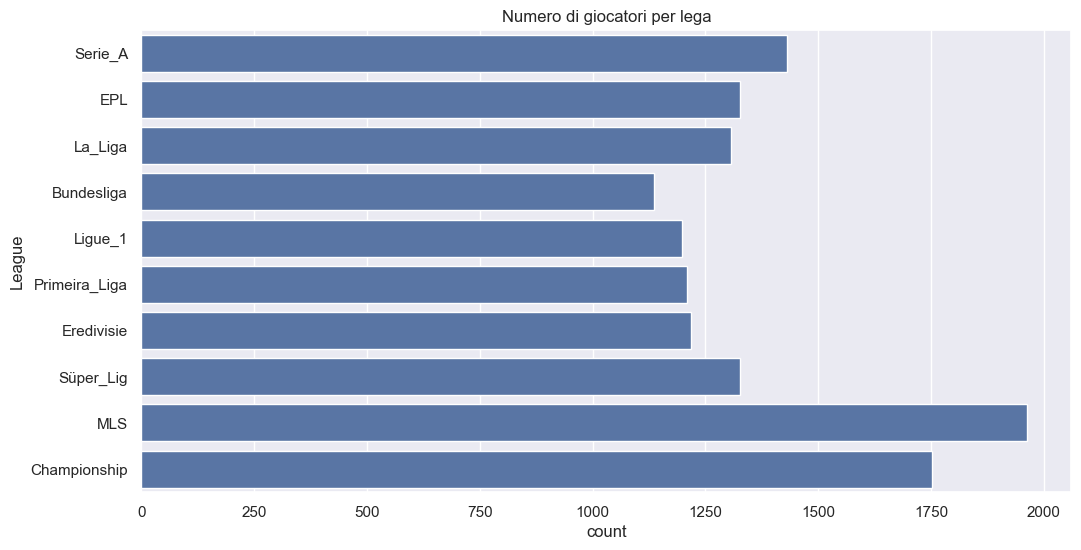

/var/folders/9q/5m05pnbj0qq1k1kptxff_f1w0000gn/T/ipykernel_1298/2481931483.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_players_df['Mín_num'] = pd.to_numeric(all_players_df['Mín'].astype(str).str.replace(',', ''), errors='coerce')


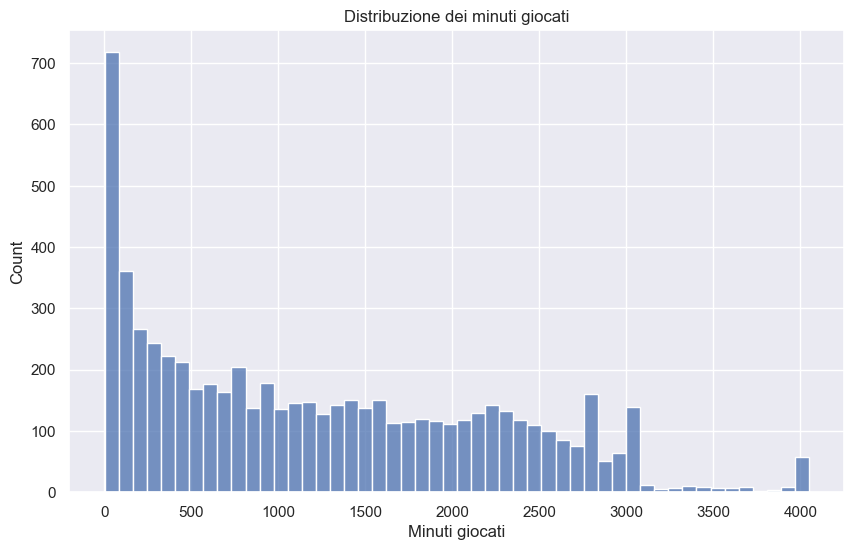

In [10]:
print("Anteprima dei dati:")
display(all_players_df.head())

print("\nStatistiche descrittive:")
display(all_players_df.describe())

print("\nDistribuzione per lega:")
display(all_players_df['League'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(data=all_players_df, y='League')
plt.title('Numero di giocatori per lega')
plt.show()

# Gestione robusta della colonna 'Mín'
if 'Mín' in all_players_df.columns:
    # Rimuove la virgola e converte in numerico, errori diventano NaN
    all_players_df['Mín_num'] = pd.to_numeric(all_players_df['Mín'].astype(str).str.replace(',', ''), errors='coerce')
    plt.figure(figsize=(10, 6))
    sns.histplot(data=all_players_df, x='Mín_num', bins=50)
    plt.title('Distribuzione dei minuti giocati')
    plt.xlabel('Minuti giocati')
    plt.show()
else:
    print("Colonna 'Mín' non trovata.")

In [11]:
# Ordina per minuti giocati (corretto e robusto!)
if 'Mín' in all_players_df.columns:
    all_players_df['Mín_num'] = pd.to_numeric(all_players_df['Mín'].astype(str).str.replace(',', ''), errors='coerce')
    top_by_minutes = all_players_df.sort_values('Mín_num', ascending=False)
    display(top_by_minutes[['Jugador', 'Equipo', 'League', 'Mín', 'Mín_num']].head(20))
else:
    print("Colonna 'Mín' non trovata.")

,Jugador,Equipo,League,Mín,Mín_num
13600,NaN,Sunderland,Championship,"4,050",4050.0
13024,NaN,Cardiff City,Championship,"4,050",4050.0
13026,NaN,Derby County,Championship,"4,050",4050.0
13036,NaN,Preston,Championship,"4,050",4050.0
13027,NaN,Hull City,Championship,"4,050",4050.0
13588,NaN,Luton Town,Championship,"4,050",4050.0
13762,Jamie Cumming,NaN,Championship,"4,050",4050.0
13589,NaN,Middlesbrough,Championship,"4,050",4050.0
13590,NaN,Millwall,Championship,"4,050",4050.0
13028,NaN,Leeds United,Championship,"4,050",4050.0


In [12]:
lega = 'La_Liga'  # Cambia con la lega che vuoi analizzare

# Scegli la colonna giusta per il nome del giocatore
nome_colonna = 'Player' if 'Player' in all_players_df.columns else 'Jugador'

df_lega = all_players_df[(all_players_df['League'] == lega) & (all_players_df[nome_colonna].notna())]
df_lega = df_lega.sort_values('Mín_num', ascending=False)
display(df_lega[[nome_colonna, 'Team' if 'Team' in df_lega.columns else 'Equipo', 'League', 'Mín', 'Mín_num']].head(20))

,Jugador,Team,League,Mín,Mín_num
3470,David Soria,Getafe,La_Liga,"2,970",2970.0
3688,Joan García,Espanyol,La_Liga,"2,970",2970.0
3337,Paulo Gazzaniga,Girona,La_Liga,"2,925",2925.0
3175,Álex Remiro,Real_Sociedad,La_Liga,"2,880",2880.0
3907,Jan Oblak,Atletico_Madrid,La_Liga,"2,880",2880.0
3509,Sergio Herrera,Osasuna,La_Liga,"2,880",2880.0
4004,Florian Lejeune,Rayo_Vallecano,La_Liga,"2,875",2875.0
3428,Cristhian Mosquera,Valencia,La_Liga,"2,869",2869.0
3689,Omar El Hilali,Espanyol,La_Liga,"2,828",2828.0
3122,Antonio Raillo,Mallorca,La_Liga,"2,757",2757.0


In [13]:
# Carica il file dei profili
profili_path = os.path.join(BASE_PATH, "Scout Analysis", "profili_scout_analysis_finale_corretti.csv")
profili_df = pd.read_csv(profili_path, sep=';')

# Visualizza le prime righe per controllo
display(profili_df.head(10))

,RUOLO,PROFILO,DESCRIZIONE,PESO CON/SENZA PALLA,KPI CON PALLA,PESO KPI CON,KPI SENZA PALLA,PESO KPI SENZA
0,GOALKEEPER,Playmaker Keeper,"Goalkeeper involved in build-up play, capable ...",30/70,PA,9,PSxG+/-,25
1,NaN,NaN,NaN,NaN,Att (GK),8,Salvadas,18
2,NaN,NaN,NaN,NaN,Long. Prom.,7,%Salvadas,17
3,NaN,NaN,NaN,NaN,% Cmp,6,DistProm,10
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Shot-Stopper,"Goalkeeper focused on shot-stopping, with exce...",10/90,% Cmp,10,PaC%,36
6,NaN,NaN,NaN,NaN,NaN,NaN,%Salvadas,27
7,NaN,NaN,NaN,NaN,NaN,NaN,PSxG+/-,18
8,NaN,NaN,NaN,NaN,NaN,NaN,Salvadas,9
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
profili = {}
current_role = None
current_profile = None
for _, row in profili_df.iterrows():
    if pd.notna(row['RUOLO']):
        current_role = row['RUOLO']
        if current_role not in profili:
            profili[current_role] = {}
    if pd.notna(row['PROFILO']):
        current_profile = row['PROFILO']
        profili[current_role][current_profile] = {
            'con_palla': {},
            'senza_palla': {},
            'peso_con': None,
            'peso_senza': None,
            'descrizione': row['DESCRIZIONE'] if 'DESCRIZIONE' in row else ''
        }
        # Parsing del peso con/senza palla
        if pd.notna(row['PESO CON/SENZA PALLA']):
            try:
                p_con, p_senza = row['PESO CON/SENZA PALLA'].split('/')
                profili[current_role][current_profile]['peso_con'] = float(p_con.strip())
                profili[current_role][current_profile]['peso_senza'] = float(p_senza.strip())
            except:
                profili[current_role][current_profile]['peso_con'] = None
                profili[current_role][current_profile]['peso_senza'] = None
    # KPI con palla
    if pd.notna(row['KPI CON PALLA']) and pd.notna(row['PESO KPI CON']):
        try:
            peso_con = float(str(row['PESO KPI CON']).replace(',', '.'))
            profili[current_role][current_profile]['con_palla'][row['KPI CON PALLA'].strip()] = peso_con
        except ValueError:
            # Salta se il peso non è numerico (es. "Variabile")
            pass
    # KPI senza palla
    if pd.notna(row['KPI SENZA PALLA']) and pd.notna(row['PESO KPI SENZA']):
        try:
            peso_senza = float(str(row['PESO KPI SENZA']).replace(',', '.'))
            profili[current_role][current_profile]['senza_palla'][row['KPI SENZA PALLA'].strip()] = peso_senza
        except ValueError:
            pass

# Esempio: visualizza la struttura per un profilo
import pprint
pprint.pprint(profili['CENTRE BACK']['Guardian'])

{'con_palla': {'% Cmp': 8.0, 'Cmp': 2.0, 'Long. Prom.': 3.0, 'PA': 7.0},
 'descrizione': 'Physical center-back with strong positional awareness, '
                'dominant in aerial duels and positional defending',
 'peso_con': 20.0,
 'peso_senza': 80.0,
 'senza_palla': {'% de ganados': 20.0,
                 '3.º cent.': 20.0,
                 'Recup.': 16.0,
                 'Tkl(Desafios)': 24.0}}


In [3]:
import os
import pandas as pd
import sys

# Aggiungi i percorsi necessari
sys.path.append('/Users/federico/dash_project/pages/Scout Analysis')
sys.path.append('/Users/federico/dash_project/utils')

from scout_analysis import load_players_data

# Caricamento dati giocatori
all_players_df = load_players_data()

# Rinomina le colonne
all_players_df = all_players_df.rename(columns={
    'Name_fbref': 'Name',
    'Team': 'Team',
    'Position_tm': 'Position',
    'Mín': 'Mín',
    'Min': 'Mín_num'
})

# Caricamento profili
base_dir = '/Users/federico/dash_project/pages/Scout Analysis'
profili_path = os.path.join(base_dir, 'profili_scout_analysis_finale_corretti.csv')

if not os.path.exists(profili_path):
    raise FileNotFoundError(f"File non trovato: {profili_path}")

profili_df = pd.read_csv(profili_path, sep=';')

# Inizializzazione dizionario profili
profili = {}
current_role = None
current_profile = None

# Elaborazione profili
for _, row in profili_df.iterrows():
    if pd.notna(row['RUOLO']):
        current_role = row['RUOLO']
        if current_role not in profili:
            profili[current_role] = {}
    
    if pd.notna(row['PROFILO']):
        current_profile = row['PROFILO']
        profili[current_role][current_profile] = {
            'con_palla': {},
            'senza_palla': {},
            'peso_con': None,
            'peso_senza': None,
            'descrizione': row['DESCRIZIONE'] if 'DESCRIZIONE' in row else ''
        }
    
    # Gestione pesi con/senza palla
    if pd.notna(row['PESO CON/SENZA PALLA']):
        try:
            p_con, p_senza = row['PESO CON/SENZA PALLA'].split('/')
            profili[current_role][current_profile]['peso_con'] = float(p_con.strip())
            profili[current_role][current_profile]['peso_senza'] = float(p_senza.strip())
        except:
            profili[current_role][current_profile]['peso_con'] = None
            profili[current_role][current_profile]['peso_senza'] = None
    
    # Gestione KPI con palla
    if pd.notna(row['KPI CON PALLA']) and pd.notna(row['PESO KPI CON']):
        try:
            peso_con = float(str(row['PESO KPI CON']).replace(',', '.'))
            profili[current_role][current_profile]['con_palla'][row['KPI CON PALLA'].strip()] = peso_con
        except ValueError:
            pass
    
    # Gestione KPI senza palla
    if pd.notna(row['KPI SENZA PALLA']) and pd.notna(row['PESO KPI SENZA']):
        try:
            peso_senza = float(str(row['PESO KPI SENZA']).replace(',', '.'))
            profili[current_role][current_profile]['senza_palla'][row['KPI SENZA PALLA'].strip()] = peso_senza
        except ValueError:
            pass

def calcola_rating_portieri(
    df_giocatori,
    profili,
    profilo_portiere,  # 'Playmaker Keeper' o 'Shot-Stopper'
    min_col='Mín_num',
    min_threshold=500,
    league_weights=None
):
    if league_weights is None:
        league_weights = {
            "Serie_A": 2.0,
            "EPL": 2.0,
            "La_Liga": 2.0,
            "Bundesliga": 2.0,
            "Ligue_1": 2.0,
            "Primeira_Liga": 1.5,
            "Eredivisie": 1.5,
            "Süper_Lig": 1.5,
            "MLS": 1.0,
            "Championship": 1.0
        }

    ruolo = 'GOALKEEPER'
    kpi_con = profili[ruolo][profilo_portiere]['con_palla']
    kpi_senza = profili[ruolo][profilo_portiere]['senza_palla']
    peso_con = profili[ruolo][profilo_portiere]['peso_con']
    peso_senza = profili[ruolo][profilo_portiere]['peso_senza']

    # Filtra solo portieri
    mask_portieri = df_giocatori['Position'].str.upper().isin(['GOALKEEPER', 'GK', 'PO', 'PORTIERE'])
    portieri_df = df_giocatori[mask_portieri].copy()
    print("Numero portieri trovati:", portieri_df.shape[0])
    print("\nPrimi 10 portieri:")
    print(portieri_df[['Name', 'Position', 'Mín', 'Mín_num']].head(10))

    # Verifica KPI disponibili
    kpi_list = list(kpi_con.keys()) + list(kpi_senza.keys())
    print("\nKPI richiesti dal profilo:", kpi_list)

    missing_kpi = [k for k in kpi_list if k not in portieri_df.columns]
    if missing_kpi:
        print("\nATTENZIONE: Questi KPI non sono presenti nei dati e verranno ignorati:", missing_kpi)
    else:
        print("\nTutti i KPI richiesti sono presenti nei dati.")

    kpi_presenti = [k for k in kpi_list if k in portieri_df.columns]
    print("\nPrimi dati portieri per i KPI presenti:")
    print(portieri_df[['Name', 'Team', min_col] + kpi_presenti].head(10))

    def rating_grezzo(row):
        # Calcolo rating con palla
        somma_con = 0
        peso_tot_con = 0
        for kpi, peso in kpi_con.items():
            if kpi in row and pd.notna(row[kpi]):
                try:
                    valore = float(str(row[kpi]).replace(',', '.'))
                    somma_con += valore * peso
                    peso_tot_con += peso
                except:
                    pass
        rating_con = somma_con / peso_tot_con if peso_tot_con > 0 else 0

        # Calcolo rating senza palla
        somma_senza = 0
        peso_tot_senza = 0
        for kpi, peso in kpi_senza.items():
            if kpi in row and pd.notna(row[kpi]):
                try:
                    valore = float(str(row[kpi]).replace(',', '.'))
                    somma_senza += valore * peso
                    peso_tot_senza += peso
                except:
                    pass
        rating_senza = somma_senza / peso_tot_senza if peso_tot_senza > 0 else 0

        # Calcolo rating finale
        rating = (rating_con * peso_con + rating_senza * peso_senza) / (peso_con + peso_senza)

        # Verifica minuti giocati
        minuti = row[min_col] if min_col in row and pd.notna(row[min_col]) else 0
        if minuti < min_threshold:
            return None

        # Coefficiente minuti
        if minuti >= 1500:
            coeff_minuti = 1.0
        elif minuti >= 1000:
            coeff_minuti = 0.8
        else:
            coeff_minuti = 0.6

        # Coefficiente lega
        league = row['League'] if 'League' in row else None
        coeff_league = league_weights.get(league, 1.0)

        return rating * coeff_minuti * coeff_league

    # Calcolo rating
    portieri_df['rating_grezzo'] = portieri_df.apply(rating_grezzo, axis=1)
    portieri_df = portieri_df[portieri_df['rating_grezzo'].notna()]

    # Normalizzazione rating
    media = portieri_df['rating_grezzo'].mean()
    std = portieri_df['rating_grezzo'].std()
    portieri_df['zscore'] = (portieri_df['rating_grezzo'] - media) / std
    z_min, z_max = -2, 2
    portieri_df['zscore_clipped'] = portieri_df['zscore'].clip(z_min, z_max)
    portieri_df['percentile'] = (portieri_df['zscore_clipped'] - z_min) / (z_max - z_min)
    min_rating = 40
    max_rating = 99
    portieri_df['rating'] = min_rating + portieri_df['percentile'] * (max_rating - min_rating)

    # Selezione colonne finali
    colonne_finali = ['Name', 'Team', 'League', min_col, 'Market Value', 'rating_grezzo', 'rating']

    return portieri_df.sort_values('rating', ascending=False)[colonne_finali]

# Esecuzione
risultato = calcola_rating_portieri(
    all_players_df,
    profili,
    profilo_portiere='Playmaker Keeper'
)

# Visualizzazione risultati
print("\nRisultati finali:")
display(risultato.head(20))

Error processing Lecce: 'Market_Value_Num'
Error processing Lazio: 'Market_Value_Num'
Error processing Genoa: 'Market_Value_Num'
Error processing Atalanta: 'Market_Value_Num'
Error processing Internazionale: 'Market_Value_Num'
Error processing Empoli: 'Market_Value_Num'
Error processing Hellas_Verona: 'Market_Value_Num'
Error processing Bologna: 'Market_Value_Num'
Error processing Como: 'Market_Value_Num'
Error processing Atalanta: 'Market_Value_Num'
Error processing Lecce: 'Market_Value_Num'
Error processing Torino: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Napoli: 'Market_Value_Num'
Error processing Udinese: 'Market_Value_Num'
Error processing Empoli: 'Market_Value_Num'
Error processing Fiorentina: 'Market_Value_Num'
Error processing Internazionale: 'Market_Value_Num'
Error processing Udinese: 'Market_Value_Num'
Error processing Cagliari: 'Market_Value_Num'
Error processing Milan: 'Market_Value_Num'
Error processing Parma: 'Market_Value_Num'
Error processing Parma: 'Market_Value_Num'
Error processing Torino: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Milan: 'Market_Value_Num'
Error processing Como: 'Market_Value_Num'
Error processing Roma: 'Market_Value_Num'
Error processing Roma: 'Market_Value_Num'
Error processing Fiorentina: 'Market_Value_Num'
Error processing Genoa: 'Market_Value_Num'
Error processing Cagliari: 'Market_Value_Num'
Error processing Bologna: 'Market_Value_Num'
Error processing Napoli: 'Market_Value_Num'
Error processing Monza: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Hellas_Verona: 'Market_Value_Num'
Error processing Lazio: 'Market_Value_Num'
Error processing Monza: 'Market_Value_Num'
Error processing Bournemouth: 'Market_Value_Num'
Error processing Everton: 'Market_Value_Num'
Error processing Arsenal: 'Market_Value_Num'
Error processing Wolverhampton_Wanderers: 'Market_Value_Num'
Error processing Manchester_City: 'Market_Value_Num'
Error processing Brentford: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Manchester_United: 'Market_Value_Num'
Error processing Crystal_Palace: 'Market_Value_Num'
Error processing Aston_Villa: 'Market_Value_Num'
Error processing Fulham: 'Market_Value_Num'
Error processing Tottenham_Hotspur: 'Market_Value_Num'
Error processing Ipswich_Town: 'Market_Value_Num'
Error processing Fulham: 'Market_Value_Num'
Error processing Liverpool: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Newcastle_United: 'Market_Value_Num'
Error processing Ipswich_Town: 'Market_Value_Num'
Error processing Southampton: 'Market_Value_Num'
Error processing Chelsea: 'Market_Value_Num'
Error processing West_Ham_United: 'Market_Value_Num'
Error processing Chelsea: 'Market_Value_Num'
Error processing Leicester_City: 'Market_Value_Num'
Error processing Brentford: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Liverpool: 'Market_Value_Num'
Error processing Leicester_City: 'Market_Value_Num'
Error processing Brighton_and_Hove_Albion: 'Market_Value_Num'
Error processing Southampton: 'Market_Value_Num'
Error processing Bournemouth: 'Market_Value_Num'
Error processing Wolverhampton_Wanderers: 'Market_Value_Num'
Error processing Nottingham_Forest: 'Market_Value_Num'
Error processing Manchester_City: 'Market_Value_Num'
Error processing West_Ham_United: 'Market_Value_Num'
Error processing Tottenham_Hotspur: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Nottingham_Forest: 'Market_Value_Num'
Error processing Newcastle_United: 'Market_Value_Num'
Error processing Brighton_and_Hove_Albion: 'Market_Value_Num'
Error processing Arsenal: 'Market_Value_Num'
Error processing Manchester_United: 'Market_Value_Num'
Error processing Everton: 'Market_Value_Num'
Error processing Crystal_Palace: 'Market_Value_Num'
Error processing Aston_Villa: 'Market_Value_Num'
Error processing Sevilla: 'Market_Value_Num'
Error processing Athletic_Club: 'Market_Value_Num'
Error processing Real_Betis: 'Market_Value_Num'
Error processing Barcelona: 'Market_Value_Num'
Error processing Sevilla: 'Market_Value_Num'
Error processing Alaves: 'Market_Value_Num'
Error processing Mallorca: 'Market_Value_Num'
Error processing Las_Palmas: 'Market_Value_Num'
Error processing Leganes: 'Market_Value_Num'
Error processing Espanyol: 'Market_Value_Num'
Error processing Celta_Vigo: 'Market_Value_Num'
Error processing Real_Madrid: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Mallorca: 'Market_Value_Num'
Error processing Real_Sociedad: 'Market_Value_Num'
Error processing Atletico_Madrid: 'Market_Value_Num'
Error processing Leganes: 'Market_Value_Num'
Error processing Alaves: 'Market_Value_Num'
Error processing Las_Palmas: 'Market_Value_Num'
Error processing Girona: 'Market_Value_Num'
Error processing Villareal: 'Market_Value_Num'
Error processing Getafe: 'Market_Value_Num'
Error processing Valencia: 'Market_Value_Num'
Error processing Getafe: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Osasuna: 'Market_Value_Num'
Error processing Barcelona: 'Market_Value_Num'
Error processing Valladolid: 'Market_Value_Num'
Error processing Real_Madrid: 'Market_Value_Num'
Error processing Real_Sociedad: 'Market_Value_Num'
Error processing Espanyol: 'Market_Value_Num'
Error processing Athletic_Club: 'Market_Value_Num'
Error processing Valladolid: 'Market_Value_Num'
Error processing Rayo_Vallecano: 'Market_Value_Num'
Error processing Villareal: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Girona: 'Market_Value_Num'
Error processing Atletico_Madrid: 'Market_Value_Num'
Error processing Celta_Vigo: 'Market_Value_Num'
Error processing Real_Betis: 'Market_Value_Num'
Error processing Rayo_Vallecano: 'Market_Value_Num'
Error processing Valencia: 'Market_Value_Num'
Error processing Stuttgart: 'Market_Value_Num'
Error reading /Users/federico/dash_project/pages/Salari_Capology/Bundesliga/Bayer_Leverkusen/Tabla_Limpia_Bayer_Leverkusen.csv: Parser error
Error processing Bayer_Leverkusen: 'Market_Value_Num'
Error processing Monchengladbach: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Union_Berlin: 'Market_Value_Num'
Error processing Stuttgart: 'Market_Value_Num'
Error processing Union_Berlin: 'Market_Value_Num'
Error processing RB_Leipzig: 'Market_Value_Num'
Error processing St_Pauli: 'Market_Value_Num'
Error processing Monchengladbach: 'Market_Value_Num'
Error processing Freiburg: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Holstein_Kiel: 'Market_Value_Num'
Error processing Augsburg: 'Market_Value_Num'
Error processing Holstein_Kiel: 'Market_Value_Num'
Error processing Bayern_Munich: 'Market_Value_Num'
Error processing Dortmund: 'Market_Value_Num'
Error processing Eintracht_Frankfurt: 'Market_Value_Num'
Error processing Wolfsburg: 'Market_Value_Num'
Error reading /Users/federico/dash_project/pages/Salari_Capology/Bundesliga/Bayer_Leverkusen/Tabla_Limpia_Bayer_Leverkusen.csv: Parser error


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Bayer_Leverkusen: 'Market_Value_Num'
Error processing Hoffenheim: 'Market_Value_Num'
Error processing Mainz_05: 'Market_Value_Num'
Error processing Werder_Bremen: 'Market_Value_Num'
Error processing Heidenheim: 'Market_Value_Num'
Error processing Eintracht_Frankfurt: 'Market_Value_Num'
Error processing Wolfsburg: 'Market_Value_Num'
Error processing Werder_Bremen: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Augsburg: 'Market_Value_Num'
Error processing Hoffenheim: 'Market_Value_Num'
Error processing Freiburg: 'Market_Value_Num'
Error processing Bochum: 'Market_Value_Num'
Error processing Mainz_05: 'Market_Value_Num'
Error processing Dortmund: 'Market_Value_Num'
Error processing Bayern_Munich: 'Market_Value_Num'
Error processing St_Pauli: 'Market_Value_Num'
Error processing Heidenheim: 'Market_Value_Num'
Error processing Bochum: 'Market_Value_Num'
Error processing RB_Leipzig: 'Market_Value_Num'
Error processing Saint_Etienne: 'Market_Value_Num'
Error processing Nice: 'Market_Value_Num'
Error processing Lens: 'Market_Value_Num'
Error processing Nice: 'Market_Value_Num'
Error processing Auxerre: 'Market_Value_Num'
Error processing Montpellier: 'Market_Value_Num'
Error processing Strasbourg: 'Market_Value_Num'
Error processing Le_Havre: 'Market_Value_Num'
Error processing Reims: 'Market_Value_Num'
Error processing Toulouse: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Saint_Etienne: 'Market_Value_Num'
Error processing Reims: 'Market_Value_Num'
Error processing Angers: 'Market_Value_Num'
Error processing Rennes: 'Market_Value_Num'
Error processing Marseille: 'Market_Value_Num'
Error processing Lille: 'Market_Value_Num'
Error processing Lyon: 'Market_Value_Num'
Error processing Marseille: 'Market_Value_Num'
Error processing Montpellier: 'Market_Value_Num'
Error processing Auxerre: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Brest: 'Market_Value_Num'
Error processing Le_Havre: 'Market_Value_Num'
Error processing Monaco: 'Market_Value_Num'
Error processing Nantes: 'Market_Value_Num'
Error processing Brest: 'Market_Value_Num'
Error processing Strasbourg: 'Market_Value_Num'
Error processing Nantes: 'Market_Value_Num'
Error processing Paris_Saint_Germain: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Rennes: 'Market_Value_Num'
Error processing Lyon: 'Market_Value_Num'
Error processing Toulouse: 'Market_Value_Num'
Error processing Lens: 'Market_Value_Num'
Error processing Paris_Saint_Germain: 'Market_Value_Num'
Error processing Angers: 'Market_Value_Num'
Error processing Monaco: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Casa_Pia: 'Market_Value_Num'
Error processing Arouca: 'Market_Value_Num'
Error processing Arouca: 'Market_Value_Num'
Error processing Sporting_CP: 'Market_Value_Num'
Error processing Estrela: 'Market_Value_Num'
Error processing Gil_Vicente_FC: 'Market_Value_Num'
Error processing Braga: 'Market_Value_Num'
Error processing Moreirense: 'Market_Value_Num'
Error processing Farense: 'Market_Value_Num'
Error processing Porto: 'Market_Value_Num'
Error processing AVS_Futebol: 'Market_Value_Num'
Error processing Boavista: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Nacional: 'Market_Value_Num'
Error processing Benfica: 'Market_Value_Num'
Error processing Benfica: 'Market_Value_Num'
Error processing Estoril: 'Market_Value_Num'
Error processing Estoril: 'Market_Value_Num'
Error processing Moreirense: 'Market_Value_Num'
Error processing Gil_Vicente_FC: 'Market_Value_Num'
Error processing AVS_Futebol: 'Market_Value_Num'
Error processing Braga: 'Market_Value_Num'
Error processing Porto: 'Market_Value_Num'
Error processing Vitoria_Guimaraes: 'Market_Value_Num'
Error processing Farense: 'Market_Value_Num'
Error processing Santa_Clara: 'Market_Value_Num'
Error processing Rio_Ave: 'Market_Value_Num'
Error processing Nacional: 'Market_Value_Num'
Error processing Vitoria_Guimaraes: 'Market_Value_Num'
Error processing Sporting_CP: 'Market_Value_Num'
Error processing Boavista: 'Market_Value_Num'
Error processing Famalicão: 'Market_Value_Num'
Error processing Rio_Ave: 'Market_Value_Num'
Error processing Famalicão: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Casa_Pia: 'Market_Value_Num'
Error processing Estrela: 'Market_Value_Num'
Error processing Santa_Clara: 'Market_Value_Num'
Error processing Willem_II: 'Market_Value_Num'
Error processing Utrecht: 'Market_Value_Num'
Error processing Fortuna_Sittard: 'Market_Value_Num'
Error processing Almere_City: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing RKC_Waalwijk: 'Market_Value_Num'
Error processing AZ_Alkmaar: 'Market_Value_Num'
Error processing Go_Ahead_Eag: 'Market_Value_Num'
Error processing Fortuna_Sittard: 'Market_Value_Num'
Error processing RKC_Waalwijk: 'Market_Value_Num'
Error processing NEC_Nijmegen: 'Market_Value_Num'
Error processing Heracles_Almelo: 'Market_Value_Num'
Error processing Sparta_R'dam: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Heerenveen: 'Market_Value_Num'
Error processing Heracles_Almelo: 'Market_Value_Num'
Error processing Twente: 'Market_Value_Num'
Error processing NAC_Breda: 'Market_Value_Num'
Error processing AZ_Alkmaar: 'Market_Value_Num'
Error processing Twente: 'Market_Value_Num'
Error processing PSV_Eindhoven: 'Market_Value_Num'
Error processing Feyenoord: 'Market_Value_Num'
Error processing NAC_Breda: 'Market_Value_Num'
Error processing PSV_Eindhoven: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Zwolle: 'Market_Value_Num'
Error processing Willem_II: 'Market_Value_Num'
Error processing Groningen: 'Market_Value_Num'
Error processing Ajax: 'Market_Value_Num'
Error processing Almere_City: 'Market_Value_Num'
Error processing Sparta_R'dam: 'Market_Value_Num'
Error processing Heerenveen: 'Market_Value_Num'
Error processing Utrecht: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Zwolle: 'Market_Value_Num'
Error processing Feyenoord: 'Market_Value_Num'
Error processing NEC_Nijmegen: 'Market_Value_Num'
Error processing Ajax: 'Market_Value_Num'
Error processing Go_Ahead_Eag: 'Market_Value_Num'
Error processing Groningen: 'Market_Value_Num'
Error processing Konyaspor: 'Market_Value_Num'
Error processing Gaziantep_FK: 'Market_Value_Num'
Error processing Beşiktaş: 'Market_Value_Num'
Error processing Konyaspor: 'Market_Value_Num'
Error processing Fenerbahçe: 'Market_Value_Num'
Error processing Göztepe: 'Market_Value_Num'
Error processing Göztepe: 'Market_Value_Num'
Error processing Rizespor: 'Market_Value_Num'
Error processing Samsunspor: 'Market_Value_Num'
Error processing Hatayspor: 'Market_Value_Num'
Error processing Kayserispor: 'Market_Value_Num'
Error processing Eyüpspor: 'Market_Value_Num'
Error processing Galatasaray: 'Market_Value_Num'
Error processing Kasımpaşa: 'Market_Value_Num'
Error processing Alanyaspor: 'Market_Value_Num'
Error pr

/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Charlotte: 'Market_Value_Num'
Error processing Nashville_SC: 'Market_Value_Num'
Error processing FC_Cincinnati: 'Market_Value_Num'
Error processing Minnesota_Utd: 'Market_Value_Num'
Error processing Houston_Dynamo: 'Market_Value_Num'
Error processing Houston_Dynamo: 'Market_Value_Num'
Error processing Philadelphia_Union: 'Market_Value_Num'
Error processing Minnesota_Utd: 'Market_Value_Num'
Error processing SJ_Earthquakes: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Colorado_Rapids: 'Market_Value_Num'
Error processing Portland_Timbers: 'Market_Value_Num'
Error processing FC_Dallas: 'Market_Value_Num'
Error processing St_Louis: 'Market_Value_Num'
Error processing NE_Revolution: 'Market_Value_Num'
Error processing Atlanta_Utd: 'Market_Value_Num'
Error processing LA_Galaxy: 'Market_Value_Num'
Error processing LA_Galaxy: 'Market_Value_Num'
Error processing NE_Revolution: 'Market_Value_Num'
Error processing Colorado_Rapids: 'Market_Value_Num'
Error processing Sporting_KC: 'Market_Value_Num'
Error processing Inter_Miami: 'Market_Value_Num'
Error processing St_Louis: 'Market_Value_Num'
Error processing Inter_Miami: 'Market_Value_Num'
Error processing Atlanta_Utd: 'Market_Value_Num'
Error processing Austin: 'Market_Value_Num'
Error processing D.C_United: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing CF_Montréal: 'Market_Value_Num'
Error processing Nashville_SC: 'Market_Value_Num'
Error processing CF_Montréal: 'Market_Value_Num'
Error processing SJ_Earthquakes: 'Market_Value_Num'
Error processing Vancouver_W'caps: 'Market_Value_Num'
Error processing Toronto_FC: 'Market_Value_Num'
Error processing FC_Cincinnati: 'Market_Value_Num'
Error processing Charlotte: 'Market_Value_Num'
Error processing D.C_United: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Chicago_Fire: 'Market_Value_Num'
Error processing Orlando_City: 'Market_Value_Num'
Error processing Chicago_Fire: 'Market_Value_Num'
Error processing Philadelphia_Union: 'Market_Value_Num'
Error processing Toronto_FC: 'Market_Value_Num'
Error processing Orlando_City: 'Market_Value_Num'
Error processing FC_Dallas: 'Market_Value_Num'
Error processing Sporting_KC: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing New_York_City_FC: 'Market_Value_Num'
Error processing NY_Red_Bulls: 'Market_Value_Num'
Error processing Los_Angeles_FC: 'Market_Value_Num'
Error processing Los_Angeles_FC: 'Market_Value_Num'
Error processing New_York_City_FC: 'Market_Value_Num'
Error processing NY_Red_Bulls: 'Market_Value_Num'
Error processing Columbus_Crew: 'Market_Value_Num'
Error processing Portland_Timbers: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Plymouth_Argyle: 'Market_Value_Num'
Error processing Norwich_City: 'Market_Value_Num'
Error processing Stoke_City: 'Market_Value_Num'
Error processing Middlesbrough: 'Market_Value_Num'
Error processing Stoke_City: 'Market_Value_Num'
Error processing Swansea_City: 'Market_Value_Num'
Error processing Burnley: 'Market_Value_Num'
Error processing Sheffield_Wednesday: 'Market_Value_Num'
Error processing Sheffield_United: 'Market_Value_Num'
Error processing Portsmouth: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing West_Bromwich_Albion: 'Market_Value_Num'
Error processing Derby_County: 'Market_Value_Num'
Error processing West_Bromwich_Albion: 'Market_Value_Num'
Error processing Sunderland: 'Market_Value_Num'
Error processing Queens_Park_Rangers: 'Market_Value_Num'
Error processing Coventry_City: 'Market_Value_Num'
Error processing Luton_Town: 'Market_Value_Num'
Error processing Norwich_City: 'Market_Value_Num'
Error processing Blackburn_Rovers: 'Market_Value_Num'
Error processing Bristol_City: 'Market_Value_Num'
Error processing Portsmouth: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Preston_North_End: 'Market_Value_Num'
Error processing Cardiff_City: 'Market_Value_Num'
Error processing Millwall: 'Market_Value_Num'
Error processing Middlesbrough: 'Market_Value_Num'
Error processing Luton_Town: 'Market_Value_Num'
Error processing Watford: 'Market_Value_Num'
Error processing Oxford_United: 'Market_Value_Num'
Error processing Queens_Park_Rangers: 'Market_Value_Num'
Error processing Watford: 'Market_Value_Num'
Error processing Burnley: 'Market_Value_Num'
Error processing Plymouth_Argyle: 'Market_Value_Num'
Error processing Millwall: 'Market_Value_Num'
Error processing Sheffield_Wednesday: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

Error processing Bristol_City: 'Market_Value_Num'
Error processing Leeds_United: 'Market_Value_Num'
Error processing Hull_City: 'Market_Value_Num'
Error processing Derby_County: 'Market_Value_Num'
Error processing Coventry_City: 'Market_Value_Num'
Error processing Hull_City: 'Market_Value_Num'
Error processing Sheffield_United: 'Market_Value_Num'
Error processing Leeds_United: 'Market_Value_Num'
Error processing Swansea_City: 'Market_Value_Num'
Error processing Preston_North_End: 'Market_Value_Num'
Error processing Blackburn_Rovers: 'Market_Value_Num'
Error processing Oxford_United: 'Market_Value_Num'
Error processing Cardiff_City: 'Market_Value_Num'
Error processing Sunderland: 'Market_Value_Num'


/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df.loc[:, 'Player_Std'] = fbref_df['Name'].apply(standardize_player_name)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:148: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fbref_df['Min'] = pd.to_numeric(fbref_df['Mín'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
/Users/federico/dash_project/pages/Scout Analysis/scout_analysis.py:143: PerformanceWarning: DataFrame is 

KeyError: 'Position'

In [16]:
# Esempio per 'Playmaker Keeper'
risultato = calcola_rating_portieri(
    all_players_df,
    profili,
    profilo_portiere='Playmaker Keeper'
)
display(risultato.head(20))

Numero portieri trovati: 658
   Jugador                Name    Position  Mín  Mín_num
0      NaN   Wladimiro Falcone  Goalkeeper  NaN      NaN
1      NaN   Christian Früchtl  Goalkeeper  NaN      NaN
2      NaN      Jasper Samooja  Goalkeeper  NaN      NaN
34     NaN       Ivan Provedel  Goalkeeper  NaN      NaN
35     NaN     Christos Mandas  Goalkeeper  NaN      NaN
36     NaN     Davide Renzetti  Goalkeeper  NaN      NaN
37     NaN  Alessio Furlanetto  Goalkeeper  NaN      NaN
65     NaN        Nicola Leali  Goalkeeper  NaN      NaN
66     NaN   Benjamin Siegrist  Goalkeeper  NaN      NaN
67     NaN   Daniele Sommariva  Goalkeeper  NaN      NaN
KPI richiesti dal profilo: ['PA', 'Att (GK)', 'Long. Prom.', '% Cmp', 'PSxG+/-', 'Salvadas', '%Salvadas', 'DistProm']
ATTENZIONE: Questi KPI non sono presenti nei dati e verranno ignorati: ['Long. Prom.', '%Salvadas', 'DistProm']
Primi dati portieri per i KPI presenti:
   Jugador   Team  Mín_num   PA  Att (GK) % Cmp  PSxG+/-  Salvadas
0      

,Name,Team,League,Mín_num,rating_grezzo,rating


In [23]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Pesi delle leghe
LEAGUE_WEIGHTS = {
    'Serie_A': 2.0,      # Top 5
    'EPL': 2.0,          # Top 5
    'La_Liga': 2.0,      # Top 5
    'Bundesliga': 2.0,   # Top 5
    'Ligue_1': 2.0,      # Top 5
    'Primeira_Liga': 1.5,
    'Eredivisie': 1.5,
    'Süper_Lig': 1.5,
    'MLS': 1.0,
    'Championship': 1.0
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def safe_float_convert(value):
    """
    Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia
    """
    if pd.isna(value) or value == '':
        return 0.0
    try:
        # Rimuove la virgola se presente e converte in float
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """
    Restituisce il coefficiente in base ai minuti giocati
    """
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """
    Restituisce i percorsi delle leghe da analizzare
    """
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """
    Ottiene i file delle squadre dalla directory della lega
    """
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name == 'clasificacion.csv' or file.name == 'marcatori_Serie_A_24-25.csv' or file.name == 'Serie_A_24-25.csv':
            continue
            
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
            
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    
    return team_files

def load_league_data(league_path):
    """
    Carica i dati della lega da FBRef e Transfermarkt
    """
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            # Carica dati FBRef
            fbref_df = pd.read_csv(fbref_file)
            fbref_df['Team'] = fbref_file.stem
            all_fbref_data.append(fbref_df)

            # Carica dati Transfermarkt
            transfermarkt_df = pd.read_csv(transfermarkt_file)
            transfermarkt_df['Team'] = fbref_file.stem
            all_transfermarkt_data.append(transfermarkt_df)

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """
    Normalizza un KPI nel range 0-1
    """
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val) or min_val == max_val:
        return 0.0
    return (value - min_val) / (max_val - min_val)

def calculate_global_ranges(fbref_df):
    """
    Calcola i range globali per la normalizzazione dei KPI
    """
    kpi_ranges = {}
    
    # Dizionario per la conversione dei nomi delle colonne
    column_conversion = {
        'Att_GK': 'Att (GK)',
        'DistProm': 'DistProm.',
        'Mín': 'Mín'
    }
    
    # KPIs per Playmaker Keeper
    playmaker_kpis = {
        'Att (GK)': {'weight': 0.4, 'inverse': False},
        'DistProm.': {'weight': 0.3, 'inverse': False},
        'Mín': {'weight': 0.3, 'inverse': False}
    }
    
    # KPIs per Shot Stopper
    shot_stopper_kpis = {
        'PSxG': {'weight': 0.3, 'inverse': True},
        'PSxG/SoT': {'weight': 0.3, 'inverse': True},
        'PSxG+/-': {'weight': 0.4, 'inverse': True}
    }
    
    # Calcola i range per ogni KPI
    for kpi in list(playmaker_kpis.keys()) + list(shot_stopper_kpis.keys()):
        col_name = column_conversion.get(kpi, kpi)
        if col_name in fbref_df.columns:
            values = fbref_df[col_name].apply(safe_float_convert)
            kpi_ranges[kpi] = {
                'min': values.min(),
                'max': values.max()
            }
    
    return kpi_ranges

def calculate_goalkeeper_rating(player_data, kpi_ranges, league_weight=1.0):
    """
    Calcola i rating del portiere usando i pesi specifici per ogni KPI
    """
    # Ottieni il coefficiente dei minuti
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    
    # Se il portiere ha giocato meno di 500 minuti, ritorna rating 30
    if minutes_coefficient == 0.0:
        return {
            'Playmaker_Keeper': 30.0,
            'Shot_Stopper': 30.0
        }
    
    # Normalizza le statistiche del giocatore
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    
    # Calcola il rating Playmaker Keeper
    playmaker_weights = {
        'Att (GK)': 0.4,
        'DistProm.': 0.3,
        'Mín': 0.3
    }
    
    playmaker_rating = sum(normalized_stats[kpi] * weight 
                          for kpi, weight in playmaker_weights.items() 
                          if kpi in normalized_stats)
    
    # Calcola il rating Shot Stopper
    shot_stopper_weights = {
        'PSxG': 0.3,
        'PSxG/SoT': 0.3,
        'PSxG+/-': 0.4
    }
    
    shot_stopper_rating = sum(normalized_stats[kpi] * weight 
                             for kpi, weight in shot_stopper_weights.items() 
                             if kpi in normalized_stats)
    
    # Applica il coefficiente dei minuti e il peso della lega
    playmaker_rating = playmaker_rating * minutes_coefficient * league_weight
    shot_stopper_rating = shot_stopper_rating * minutes_coefficient * league_weight
    
    # Converti i rating nel range 30-99
    playmaker_final = 30 + (playmaker_rating * 69)  # 69 = 99-30
    shot_stopper_final = 30 + (shot_stopper_rating * 69)
    
    # Limita i rating a 99
    playmaker_final = min(99.0, playmaker_final)
    shot_stopper_final = min(99.0, shot_stopper_final)
    
    return {
        'Playmaker_Keeper': round(playmaker_final, 1),
        'Shot_Stopper': round(shot_stopper_final, 1)
    }

def get_goalkeeper_ratings(fbref_df, transfermarkt_df, league_name):
    """
    Calcola i rating per tutti i portieri di una lega
    """
    if fbref_df is None or fbref_df.empty:
        return None
        
    # Filtra solo i portieri
    goalkeepers = fbref_df[fbref_df['Posc'] == 'PO'].copy()
    
    if goalkeepers.empty:
        return None
    
    # Calcola i range globali per la normalizzazione
    kpi_ranges = calculate_global_ranges(fbref_df)
    
    # Ottieni il peso della lega
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    
    # Calcola i rating per ogni portiere
    ratings = []
    for _, player in goalkeepers.iterrows():
        rating = calculate_goalkeeper_rating(player, kpi_ranges, league_weight)
        ratings.append({
            'Player': player['Jugador'],
            'Team': player['Team'],
            'League': league_name,
            'Playmaker_Keeper': rating['Playmaker_Keeper'],
            'Shot_Stopper': rating['Shot_Stopper']
        })
    
    return pd.DataFrame(ratings)

def main():
    """
    Funzione principale per analizzare tutte le leghe
    """
    league_paths = get_league_paths()
    all_ratings = []
    
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        
        # Carica i dati della lega
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            print(f"Impossibile caricare i dati per {league_name}")
            continue
        
        # Calcola i rating
        ratings = get_goalkeeper_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} portieri in {league_name}")
    
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        # Ordina per Playmaker_Keeper decrescente
        final_ratings = final_ratings.sort_values('Playmaker_Keeper', ascending=False)
        final_ratings.to_csv('goalkeeper_ratings.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'goalkeeper_ratings.csv'")
        print(f"Analizzati {len(final_ratings)} portieri in totale")
        print("\nTop 20 portieri per rating Playmaker_Keeper:")
        print(final_ratings[['Player', 'Team', 'League', 'Playmaker_Keeper', 'Shot_Stopper']].head(20).to_string())
        print("\nTop 20 portieri per rating Shot_Stopper:")
        shot_stopper_ratings = final_ratings.sort_values('Shot_Stopper', ascending=False)
        print(shot_stopper_ratings[['Player', 'Team', 'League', 'Playmaker_Keeper', 'Shot_Stopper']].head(20).to_string())
    else:
        print("Nessun dato trovato per l'analisi")

if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 92 portieri in Serie_A

Analizzando EPL...
Analizzati 77 portieri in EPL

Analizzando La_Liga...
Analizzati 87 portieri in La_Liga

Analizzando Bundesliga...
Analizzati 61 portieri in Bundesliga

Analizzando Ligue_1...
Analizzati 59 portieri in Ligue_1

Analizzando Primeira_Liga...
Analizzati 61 portieri in Primeira_Liga

Analizzando Eredivisie...
Analizzati 82 portieri in Eredivisie

Analizzando Süper_Lig...
Analizzati 80 portieri in Süper_Lig

Analizzando MLS...
Analizzati 94 portieri in MLS

Analizzando Championship...
Analizzati 92 portieri in Championship

Analisi completata. I risultati sono stati salvati in 'goalkeeper_ratings.csv'
Analizzati 785 portieri in totale

Top 20 portieri per rating Playmaker_Keeper:
                  Player                     Team      League  Playmaker_Keeper  Shot_Stopper
0      Marco Carnesecchi                 Atalanta     Serie_A              99.0          99.0
285          Kevin Trapp      Eintracht_Frankfurt 

In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Pesi delle leghe aggiornati
LEAGUE_WEIGHTS = {
    'Serie_A': 1.5,
    'EPL': 1.5,
    'La_Liga': 1.5,
    'Bundesliga': 1.5,
    'Ligue_1': 1.5,
    'Primeira_Liga': 1.2,
    'Eredivisie': 1.2,
    'Süper_Lig': 1.2,
    'MLS': 1.0,
    'Championship': 1.0
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def safe_float_convert(value):
    """
    Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia
    """
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """
    Restituisce il coefficiente in base ai minuti giocati
    """
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """
    Restituisce i percorsi delle leghe da analizzare
    """
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """
    Ottiene i file delle squadre dalla directory della lega
    """
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name in ['clasificacion.csv', 'marcatori_Serie_A_24-25.csv', 'Serie_A_24-25.csv']:
            continue
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    return team_files

def load_league_data(league_path):
    """
    Carica i dati della lega da FBRef e Transfermarkt
    """
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            fbref_df = pd.read_csv(fbref_file)
            fbref_df['Team'] = fbref_file.stem
            all_fbref_data.append(fbref_df)
            transfermarkt_df = pd.read_csv(transfermarkt_file)
            transfermarkt_df['Team'] = fbref_file.stem
            all_transfermarkt_data.append(transfermarkt_df)

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """
    Normalizza un KPI nel range 0-1
    """
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val) or min_val == max_val:
        return 0.0
    return (value - min_val) / (max_val - min_val)

def calculate_global_ranges(fbref_df):
    """
    Calcola i range globali per la normalizzazione dei KPI
    """
    kpi_ranges = {}
    column_conversion = {
        'Att_GK': 'Att (GK)',
        'DistProm': 'DistProm.',
        'Mín': 'Mín'
    }
    playmaker_kpis = {
        'Att (GK)': {'weight': 0.4, 'inverse': False},
        'DistProm.': {'weight': 0.3, 'inverse': False},
        'Mín': {'weight': 0.3, 'inverse': False}
    }
    shot_stopper_kpis = {
        'PSxG': {'weight': 0.3, 'inverse': True},
        'PSxG/SoT': {'weight': 0.3, 'inverse': True},
        'PSxG+/-': {'weight': 0.4, 'inverse': True}
    }
    for kpi in list(playmaker_kpis.keys()) + list(shot_stopper_kpis.keys()):
        col_name = column_conversion.get(kpi, kpi)
        if col_name in fbref_df.columns:
            values = fbref_df[col_name].apply(safe_float_convert)
            kpi_ranges[kpi] = {
                'min': values.min(),
                'max': values.max()
            }
    return kpi_ranges

def calculate_goalkeeper_rating(player_data, kpi_ranges, league_weight=1.0):
    """
    Calcola i rating del portiere usando i pesi specifici per ogni KPI
    """
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    if minutes_coefficient == 0.0:
        return {
            'Playmaker_Keeper': 30.0,
            'Shot_Stopper': 30.0
        }
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    playmaker_weights = {
        'Att (GK)': 0.4,
        'DistProm.': 0.3,
        'Mín': 0.3
    }
    playmaker_rating = sum(normalized_stats[kpi] * weight
                          for kpi, weight in playmaker_weights.items()
                          if kpi in normalized_stats)
    shot_stopper_weights = {
        'PSxG': 0.3,
        'PSxG/SoT': 0.3,
        'PSxG+/-': 0.4
    }
    shot_stopper_rating = sum(normalized_stats[kpi] * weight
                             for kpi, weight in shot_stopper_weights.items()
                             if kpi in normalized_stats)
    playmaker_rating = playmaker_rating * minutes_coefficient * league_weight
    shot_stopper_rating = shot_stopper_rating * minutes_coefficient * league_weight
    # Scala più severa (ridotto del 20%)
    playmaker_final = 30 + (playmaker_rating * 0.8 * 69)
    shot_stopper_final = 30 + (shot_stopper_rating * 0.8 * 69)
    playmaker_final = min(99.0, playmaker_final)
    shot_stopper_final = min(99.0, shot_stopper_final)
    return {
        'Playmaker_Keeper': round(playmaker_final, 1),
        'Shot_Stopper': round(shot_stopper_final, 1)
    }

def get_goalkeeper_ratings(fbref_df, transfermarkt_df, league_name):
    """
    Calcola i rating per tutti i portieri di una lega
    """
    if fbref_df is None or fbref_df.empty:
        return None
    goalkeepers = fbref_df[fbref_df['Posc'] == 'PO'].copy()
    if goalkeepers.empty:
        return None
    kpi_ranges = calculate_global_ranges(fbref_df)
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    ratings = []
    for _, player in goalkeepers.iterrows():
        rating = calculate_goalkeeper_rating(player, kpi_ranges, league_weight)
        ratings.append({
            'Player': player['Jugador'],
            'Team': player['Team'],
            'League': league_name,
            'Playmaker_Keeper': rating['Playmaker_Keeper'],
            'Shot_Stopper': rating['Shot_Stopper']
        })
    return pd.DataFrame(ratings)

def main():
    """
    Funzione principale per analizzare tutte le leghe e generare il CSV
    """
    league_paths = get_league_paths()
    all_ratings = []
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            print(f"Impossibile caricare i dati per {league_name}")
            continue
        ratings = get_goalkeeper_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} portieri in {league_name}")
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        final_ratings = final_ratings.sort_values('Playmaker_Keeper', ascending=False)
        final_ratings.to_csv('goalkeeper_ratings.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'goalkeeper_ratings.csv'")
        print(f"Analizzati {len(final_ratings)} portieri in totale")
        print("\nTop 20 portieri per rating Playmaker_Keeper:")
        print(final_ratings[['Player', 'Team', 'League', 'Playmaker_Keeper', 'Shot_Stopper']].head(20).to_string())
        print("\nTop 20 portieri per rating Shot_Stopper:")
        shot_stopper_ratings = final_ratings.sort_values('Shot_Stopper', ascending=False)
        print(shot_stopper_ratings[['Player', 'Team', 'League', 'Playmaker_Keeper', 'Shot_Stopper']].head(20).to_string())
    else:
        print("Nessun dato trovato per l'analisi")

if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 92 portieri in Serie_A

Analizzando EPL...
Analizzati 77 portieri in EPL

Analizzando La_Liga...
Analizzati 87 portieri in La_Liga

Analizzando Bundesliga...
Analizzati 61 portieri in Bundesliga

Analizzando Ligue_1...
Analizzati 59 portieri in Ligue_1

Analizzando Primeira_Liga...
Analizzati 61 portieri in Primeira_Liga

Analizzando Eredivisie...
Analizzati 82 portieri in Eredivisie

Analizzando Süper_Lig...
Analizzati 80 portieri in Süper_Lig

Analizzando MLS...
Analizzati 94 portieri in MLS

Analizzando Championship...
Analizzati 92 portieri in Championship

Analisi completata. I risultati sono stati salvati in 'goalkeeper_ratings.csv'
Analizzati 785 portieri in totale

Top 20 portieri per rating Playmaker_Keeper:
                     Player                      Team      League  Playmaker_Keeper  Shot_Stopper
133            Mark Flekken                 Brentford         EPL              99.0          85.1
204         Paulo Gazzaniga               

In [7]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Pesi delle leghe aggiornati
LEAGUE_WEIGHTS = {
    'Serie_A': 1.4,      # Top 5 (aumentato da 1.3)
    'EPL': 1.4,          # Top 5 (aumentato da 1.3)
    'La_Liga': 1.4,      # Top 5 (aumentato da 1.3)
    'Bundesliga': 1.4,   # Top 5 (aumentato da 1.3)
    'Ligue_1': 1.4,      # Top 5 (aumentato da 1.3)
    'Primeira_Liga': 1.2,  # (aumentato da 1.1)
    'Eredivisie': 1.2,     # (aumentato da 1.1)
    'Süper_Lig': 1.2,     # (aumentato da 1.1)
    'MLS': 1.0,          # (aumentato da 0.9)
    'Championship': 1.0   # (aumentato da 0.9)
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """Restituisce il coefficiente in base ai minuti giocati"""
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """Ottiene i file delle squadre dalla directory della lega"""
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name in ['clasificacion.csv', 'marcatori_Serie_A_24-25.csv', 'Serie_A_24-25.csv']:
            continue
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    return team_files

def load_league_data(league_path):
    """Carica i dati della lega da FBRef e Transfermarkt"""
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            fbref_df = pd.read_csv(fbref_file)
            fbref_df['Team'] = fbref_file.stem
            all_fbref_data.append(fbref_df)
            transfermarkt_df = pd.read_csv(transfermarkt_file)
            transfermarkt_df['Team'] = fbref_file.stem
            all_transfermarkt_data.append(transfermarkt_df)

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """Normalizza un KPI nel range 0-1"""
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val) or min_val == max_val:
        return 0.0
    return (value - min_val) / (max_val - min_val)

def calculate_global_ranges(fbref_df):
    """Calcola i range globali per la normalizzazione dei KPI"""
    kpi_ranges = {}
    column_conversion = {
        'Att_GK': 'Att (GK)',
        'DistProm': 'DistProm.',
        'Mín': 'Mín'
    }
    playmaker_kpis = {
        'Att (GK)': {'weight': 0.4, 'inverse': False},
        'DistProm.': {'weight': 0.3, 'inverse': False},
        'Mín': {'weight': 0.3, 'inverse': False}
    }
    shot_stopper_kpis = {
        'PSxG': {'weight': 0.3, 'inverse': True},
        'PSxG/SoT': {'weight': 0.3, 'inverse': True},
        'PSxG+/-': {'weight': 0.4, 'inverse': True}
    }
    for kpi in list(playmaker_kpis.keys()) + list(shot_stopper_kpis.keys()):
        col_name = column_conversion.get(kpi, kpi)
        if col_name in fbref_df.columns:
            values = fbref_df[col_name].apply(safe_float_convert)
            kpi_ranges[kpi] = {
                'min': values.min(),
                'max': values.max()
            }
    return kpi_ranges

def calculate_goalkeeper_rating(player_data, kpi_ranges, league_weight=1.0):
    """Calcola i rating del portiere usando i pesi specifici per ogni KPI"""
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    if minutes_coefficient == 0.0:
        return {
            'Playmaker_Keeper': 30.0,
            'Shot_Stopper': 30.0
        }
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    playmaker_weights = {
        'Att (GK)': 0.4,
        'DistProm.': 0.3,
        'Mín': 0.3
    }
    playmaker_rating = sum(normalized_stats[kpi] * weight
                          for kpi, weight in playmaker_weights.items()
                          if kpi in normalized_stats)
    shot_stopper_weights = {
        'PSxG': 0.3,
        'PSxG/SoT': 0.3,
        'PSxG+/-': 0.4
    }
    shot_stopper_rating = sum(normalized_stats[kpi] * weight
                             for kpi, weight in shot_stopper_weights.items()
                             if kpi in normalized_stats)
    playmaker_rating = playmaker_rating * minutes_coefficient * league_weight
    shot_stopper_rating = shot_stopper_rating * minutes_coefficient * league_weight
    # Scala più equilibrata (ridotto del 20% invece del 35%)
    playmaker_final = 30 + (playmaker_rating * 0.8 * 69)
    shot_stopper_final = 30 + (shot_stopper_rating * 0.8 * 69)
    playmaker_final = min(99.0, playmaker_final)
    shot_stopper_final = min(99.0, shot_stopper_final)
    return {
        'Playmaker_Keeper': round(playmaker_final, 1),
        'Shot_Stopper': round(shot_stopper_final, 1)
    }

def get_goalkeeper_ratings(fbref_df, transfermarkt_df, league_name):
    """Calcola i rating per tutti i portieri di una lega"""
    if fbref_df is None or fbref_df.empty or transfermarkt_df is None or transfermarkt_df.empty:
        return None
    
    # Ottieni i nomi dei portieri dal file transfermarkt
    goalkeepers_tm = transfermarkt_df[transfermarkt_df['Position'].str.lower() == 'goalkeeper']['Name'].tolist()
    
    # Filtra i dati FBRef per includere solo i portieri identificati in transfermarkt
    goalkeepers = fbref_df[fbref_df['Jugador'].isin(goalkeepers_tm)].copy()
    
    if goalkeepers.empty:
        print(f"Nessun portiere trovato in {league_name}")
        return None
    
    kpi_ranges = calculate_global_ranges(fbref_df)
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    ratings = []
    
    for _, player in goalkeepers.iterrows():
        # Trova il nome corrispondente in transfermarkt per assicurarsi che sia un portiere
        tm_player = transfermarkt_df[transfermarkt_df['Name'] == player['Jugador']]
        if not tm_player.empty and tm_player.iloc[0]['Position'].lower() == 'goalkeeper':
            rating = calculate_goalkeeper_rating(player, kpi_ranges, league_weight)
            ratings.append({
                'Player': player['Jugador'],
                'Team': player['Team'],
                'League': league_name,
                'Playmaker_Keeper': rating['Playmaker_Keeper'],
                'Shot_Stopper': rating['Shot_Stopper']
            })
    
    if not ratings:
        print(f"Nessun portiere valido trovato in {league_name}")
        return None
        
    return pd.DataFrame(ratings)

def main():
    """Funzione principale per analizzare tutte le leghe e generare il CSV"""
    league_paths = get_league_paths()
    all_ratings = []
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            print(f"Impossibile caricare i dati per {league_name}")
            continue
        ratings = get_goalkeeper_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} portieri in {league_name}")
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        final_ratings = final_ratings.sort_values('Playmaker_Keeper', ascending=False)
        final_ratings.to_csv('goalkeeper_ratings.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'goalkeeper_ratings.csv'")
        print(f"Analizzati {len(final_ratings)} portieri in totale")
        print("\nTop 20 portieri per rating Playmaker_Keeper:")
        print(final_ratings[['Player', 'Team', 'League', 'Playmaker_Keeper', 'Shot_Stopper']].head(20).to_string())
        print("\nTop 20 portieri per rating Shot_Stopper:")
        shot_stopper_ratings = final_ratings.sort_values('Shot_Stopper', ascending=False)
        print(shot_stopper_ratings[['Player', 'Team', 'League', 'Playmaker_Keeper', 'Shot_Stopper']].head(20).to_string())
    else:
        print("Nessun dato trovato per l'analisi")

if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 61 portieri in Serie_A

Analizzando EPL...
Analizzati 62 portieri in EPL

Analizzando La_Liga...
Analizzati 35 portieri in La_Liga

Analizzando Bundesliga...
Analizzati 50 portieri in Bundesliga

Analizzando Ligue_1...
Analizzati 43 portieri in Ligue_1

Analizzando Primeira_Liga...
Analizzati 44 portieri in Primeira_Liga

Analizzando Eredivisie...
Analizzati 61 portieri in Eredivisie

Analizzando Süper_Lig...
Analizzati 46 portieri in Süper_Lig

Analizzando MLS...
Analizzati 58 portieri in MLS

Analizzando Championship...
Analizzati 63 portieri in Championship

Analisi completata. I risultati sono stati salvati in 'goalkeeper_ratings.csv'
Analizzati 523 portieri in totale

Top 20 portieri per rating Playmaker_Keeper:
                     Player                      Team         League  Playmaker_Keeper  Shot_Stopper
160         Alexander Nübel                 Stuttgart     Bundesliga              99.0          67.9
35             Mike Maignan         

In [5]:
import pandas as pd
import glob
import os

def get_all_positions():
    # Trova tutti i file transfermarkt
    transfermarkt_files = glob.glob('pages/data_serie_a_24-25/*_transfermarkt.csv')
    
    # Set per memorizzare i ruoli unici
    unique_positions = set()
    
    # Leggi ogni file e estrai i ruoli
    for file in transfermarkt_files:
        try:
            df = pd.read_csv(file)
            if 'Position' in df.columns:
                # Rimuovi i valori NaN e converti in stringhe
                positions = df['Position'].dropna().astype(str).unique()
                # Rimuovi eventuali spazi extra e converti in minuscolo per uniformità
                positions = [pos.strip().lower() for pos in positions]
                unique_positions.update(positions)
        except Exception as e:
            print(f"Errore nel leggere {file}: {str(e)}")
    
    # Converti il set in una lista ordinata, escludendo 'nan' come stringa
    positions_list = sorted([pos for pos in unique_positions if pos != 'nan'])
    
    # Crea un DataFrame con i ruoli e il conteggio
    positions_df = pd.DataFrame({
        'Position': positions_list,
        'Count': [sum(1 for _ in positions_list if _ == pos) for pos in positions_list]
    })
    
    # Salva in CSV
    positions_df.to_csv('unique_positions.csv', index=False)
    print(f"Trovati {len(positions_list)} ruoli unici. Salvati in 'unique_positions.csv'")
    
    # Stampa i ruoli trovati
    print("\nRuoli trovati:")
    for pos in positions_list:
        print(f"- {pos}")

if __name__ == "__main__":
    get_all_positions()

Trovati 13 ruoli unici. Salvati in 'unique_positions.csv'

Ruoli trovati:
- attacking midfield
- central midfield
- centre-back
- centre-forward
- defensive midfield
- goalkeeper
- left midfield
- left winger
- left-back
- right midfield
- right winger
- right-back
- second striker


In [30]:
import pandas as pd
import numpy as np
from pathlib import Path
import re

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            # Rimuove il simbolo dell'euro e le virgole
            value = value.replace('€', '').replace(',', '').strip()
            # Gestisce i valori in milioni (es. "12.00m" -> 12000000)
            if 'm' in value.lower():
                value = float(value.lower().replace('m', '')) * 1000000
            else:
                value = float(value)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def extract_age(date_of_birth):
    """Estrae l'età dalla stringa 'Date of Birth/Age'"""
    if pd.isna(date_of_birth):
        return np.nan
    try:
        # Cerca il pattern (XX) nella stringa
        match = re.search(r'\((\d+)\)', date_of_birth)
        if match:
            return int(match.group(1))
        return np.nan
    except:
        return np.nan

def get_transfermarkt_data(league_path):
    """Carica e processa i dati Transfermarkt per una lega"""
    all_tm_data = []
    
    for file in league_path.glob('*_transfermarkt.csv'):
        try:
            df = pd.read_csv(file)
            # Filtra solo i portieri
            df = df[df['Position'] == 'Goalkeeper'].copy()
            
            # Estrae l'età
            df['Age'] = df['Date of Birth/Age'].apply(extract_age)
            
            # Processa il valore di mercato
            df['Market Value'] = df['Market Value'].apply(safe_float_convert)
            
            # Aggiunge il nome della squadra
            df['Team'] = file.stem.replace('_transfermarkt', '')
            
            all_tm_data.append(df)
        except Exception as e:
            print(f"Errore nel processare {file}: {str(e)}")
    
    if not all_tm_data:
        return None
    
    return pd.concat(all_tm_data, ignore_index=True)

def get_capology_data(league_name):
    """Carica e processa i dati Capology per una lega"""
    base_path = Path('/Users/federico/dash_project/pages/Salari_Capology')
    league_path = base_path / league_name
    
    if not league_path.exists():
        return None
    
    all_capology_data = []
    
    for team_dir in league_path.iterdir():
        if team_dir.is_dir():
            capology_file = team_dir / f"Tabla_Limpia_{team_dir.name}.csv"
            if capology_file.exists():
                try:
                    df = pd.read_csv(capology_file)
                    # Seleziona solo le colonne necessarie
                    df = df[['Jugador', 'Bruto Anual', 'Cláusula De Rescisión']].copy()
                    
                    # Processa i valori numerici
                    df['Bruto Anual'] = df['Bruto Anual'].apply(safe_float_convert)
                    df['Cláusula De Rescisión'] = df['Cláusula De Rescisión'].apply(safe_float_convert)
                    
                    # Applica il salario base dove manca
                    df['Bruto Anual'] = df['Bruto Anual'].fillna(500000)
                    
                    # Aggiunge il nome della squadra
                    df['Team'] = team_dir.name
                    
                    all_capology_data.append(df)
                except Exception as e:
                    print(f"Errore nel processare {capology_file}: {str(e)}")
    
    if not all_capology_data:
        return None
    
    return pd.concat(all_capology_data, ignore_index=True)

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def main():
    """Funzione principale per aggiungere i dati al CSV esistente"""
    # Carica il CSV esistente
    try:
        final_ratings = pd.read_csv('goalkeeper_ratings.csv')
        print(f"Caricato il file esistente con {len(final_ratings)} portieri")
    except Exception as e:
        print(f"Errore nel caricare il file esistente: {str(e)}")
        return

    league_paths = get_league_paths()
    all_tm_data = []  # Lista per tutti i dati Transfermarkt
    all_capology_data = []  # Lista per tutti i dati Capology
    
    # Raccogliamo tutti i dati Transfermarkt
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando dati Transfermarkt per {league_name}...")
        tm_data = get_transfermarkt_data(league_path)
        if tm_data is not None:
            all_tm_data.append(tm_data)
    
    # Raccogliamo tutti i dati Capology
    for league_name in league_paths.keys():
        print(f"\nAnalizzando dati Capology per {league_name}...")
        capology_data = get_capology_data(league_name)
        if capology_data is not None:
            all_capology_data.append(capology_data)
    
    # Facciamo un unico merge con tutti i dati Transfermarkt
    if all_tm_data:
        tm_combined = pd.concat(all_tm_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            tm_combined[['Name', 'Team', 'Age', 'Nationality', 'Height', 'Foot', 'Market Value', 'Contract Until']],
            left_on=['Player', 'Team'],
            right_on=['Name', 'Team'],
            how='left'
        )
        final_ratings.drop('Name', axis=1, inplace=True)
    
    # Facciamo un unico merge con tutti i dati Capology
    if all_capology_data:
        capology_combined = pd.concat(all_capology_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            capology_combined[['Jugador', 'Team', 'Bruto Anual', 'Cláusula De Rescisión']],
            left_on=['Player', 'Team'],
            right_on=['Jugador', 'Team'],
            how='left'
        )
        final_ratings.drop('Jugador', axis=1, inplace=True)
    
    # Rinomina le colonne in inglese
    final_ratings = final_ratings.rename(columns={
        'Bruto Anual': 'Annual Salary',
        'Cláusula De Rescisión': 'Release Clause'
    })
    
    # Ordina per rating Playmaker_Keeper
    final_ratings = final_ratings.sort_values('Playmaker_Keeper', ascending=False)
    
    # Salva il risultato in un nuovo file
    final_ratings.to_csv('goalkeeper_ratings_complete_en.csv', index=False)
    print("\nAnalisi completata. I risultati sono stati salvati in 'goalkeeper_ratings_complete_en.csv'")
    print(f"Analizzati {len(final_ratings)} portieri in totale")
    
    # Mostra i top 20 portieri
    print("\nTop 20 portieri per rating Playmaker_Keeper:")
    print(final_ratings[['Player', 'Team', 'League', 'Playmaker_Keeper', 'Shot_Stopper', 
                        'Age', 'Market Value', 'Annual Salary']].head(20).to_string())

if __name__ == "__main__":
    main()

Errore nel caricare il file esistente: [Errno 2] No such file or directory: 'goalkeeper_ratings.csv'


In [31]:
import pandas as pd
import numpy as np
from pathlib import Path
import re

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            # Rimuove il simbolo dell'euro e le virgole
            value = value.replace('€', '').replace(',', '').strip()
            # Gestisce i valori in milioni (es. "12.00m" -> 12000000)
            if 'm' in value.lower():
                value = float(value.lower().replace('m', '')) * 1000000
            else:
                value = float(value)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def extract_age(date_of_birth):
    """Estrae l'età dalla stringa 'Date of Birth/Age'"""
    if pd.isna(date_of_birth):
        return np.nan
    try:
        # Cerca il pattern (XX) nella stringa
        match = re.search(r'\((\d+)\)', date_of_birth)
        if match:
            return int(match.group(1))
        return np.nan
    except:
        return np.nan

def get_transfermarkt_data(league_path):
    """Carica e processa i dati Transfermarkt per una lega"""
    all_tm_data = []
    
    for file in league_path.glob('*_transfermarkt.csv'):
        try:
            df = pd.read_csv(file)
            # Filtra solo i difensori centrali
            df = df[df['Position'] == 'Centre-Back'].copy()
            
            # Estrae l'età
            df['Age'] = df['Date of Birth/Age'].apply(extract_age)
            
            # Processa il valore di mercato
            df['Market Value'] = df['Market Value'].apply(safe_float_convert)
            
            # Aggiunge il nome della squadra
            df['Team'] = file.stem.replace('_transfermarkt', '')
            
            all_tm_data.append(df)
        except Exception as e:
            print(f"Errore nel processare {file}: {str(e)}")
    
    if not all_tm_data:
        return None
    
    return pd.concat(all_tm_data, ignore_index=True)

def get_capology_data(league_name):
    """Carica e processa i dati Capology per una lega"""
    base_path = Path('/Users/federico/dash_project/pages/Salari_Capology')
    league_path = base_path / league_name
    
    if not league_path.exists():
        return None
    
    all_capology_data = []
    
    for team_dir in league_path.iterdir():
        if team_dir.is_dir():
            capology_file = team_dir / f"Tabla_Limpia_{team_dir.name}.csv"
            if capology_file.exists():
                try:
                    df = pd.read_csv(capology_file)
                    # Seleziona solo le colonne necessarie
                    df = df[['Jugador', 'Bruto Anual', 'Cláusula De Rescisión']].copy()
                    
                    # Processa i valori numerici
                    df['Bruto Anual'] = df['Bruto Anual'].apply(safe_float_convert)
                    df['Cláusula De Rescisión'] = df['Cláusula De Rescisión'].apply(safe_float_convert)
                    
                    # Applica il salario base dove manca
                    df['Bruto Anual'] = df['Bruto Anual'].fillna(500000)
                    
                    # Aggiunge il nome della squadra
                    df['Team'] = team_dir.name
                    
                    all_capology_data.append(df)
                except Exception as e:
                    print(f"Errore nel processare {capology_file}: {str(e)}")
    
    if not all_capology_data:
        return None
    
    return pd.concat(all_capology_data, ignore_index=True)

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def main():
    """Funzione principale per aggiungere i dati al CSV esistente"""
    # Carica il CSV esistente
    try:
        final_ratings = pd.read_csv('centreback_ratings.csv')
        print(f"Caricato il file esistente con {len(final_ratings)} difensori centrali")
    except Exception as e:
        print(f"Errore nel caricare il file esistente: {str(e)}")
        return

    league_paths = get_league_paths()
    all_tm_data = []  # Lista per tutti i dati Transfermarkt
    all_capology_data = []  # Lista per tutti i dati Capology
    
    # Raccogliamo tutti i dati Transfermarkt
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando dati Transfermarkt per {league_name}...")
        tm_data = get_transfermarkt_data(league_path)
        if tm_data is not None:
            all_tm_data.append(tm_data)
    
    # Raccogliamo tutti i dati Capology
    for league_name in league_paths.keys():
        print(f"\nAnalizzando dati Capology per {league_name}...")
        capology_data = get_capology_data(league_name)
        if capology_data is not None:
            all_capology_data.append(capology_data)
    
    # Facciamo un unico merge con tutti i dati Transfermarkt
    if all_tm_data:
        tm_combined = pd.concat(all_tm_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            tm_combined[['Name', 'Team', 'Age', 'Nationality', 'Height', 'Foot', 'Market Value', 'Contract Until']],
            left_on=['Player', 'Team'],
            right_on=['Name', 'Team'],
            how='left'
        )
        final_ratings.drop('Name', axis=1, inplace=True)
    
    # Facciamo un unico merge con tutti i dati Capology
    if all_capology_data:
        capology_combined = pd.concat(all_capology_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            capology_combined[['Jugador', 'Team', 'Bruto Anual', 'Cláusula De Rescisión']],
            left_on=['Player', 'Team'],
            right_on=['Jugador', 'Team'],
            how='left'
        )
        final_ratings.drop('Jugador', axis=1, inplace=True)
    
    # Rinomina le colonne in inglese
    final_ratings = final_ratings.rename(columns={
        'Bruto Anual': 'Annual Salary',
        'Cláusula De Rescisión': 'Release Clause'
    })
    
    # Formatta i valori monetari
    def format_currency(value, decimals=0):
        if pd.isna(value):
            return ''
        try:
            # Formatta con separatore delle migliaia e decimali specificati
            return f"€{value:,.{decimals}f}".replace(',', '.')
        except:
            return ''

    # Applica la formattazione alle colonne monetarie
    final_ratings['Annual Salary'] = final_ratings['Annual Salary'].apply(lambda x: format_currency(x, decimals=2))  # 2 decimali per i salari
    final_ratings['Release Clause'] = final_ratings['Release Clause'].apply(format_currency)  # 0 decimali per le clausole
    final_ratings['Market Value'] = final_ratings['Market Value'].apply(format_currency)  # 0 decimali per i valori di mercato
    
    # Ordina per rating Guardian
    final_ratings = final_ratings.sort_values('Guardian', ascending=False)
    
    # Salva il risultato in un nuovo file
    final_ratings.to_csv('centreback_ratings_complete_en.csv', index=False)
    print("\nAnalisi completata. I risultati sono stati salvati in 'centreback_ratings_complete_en.csv'")
    print(f"Analizzati {len(final_ratings)} difensori centrali in totale")
    
    # Mostra i top 20 difensori
    print("\nTop 20 difensori centrali per rating Guardian:")
    print(final_ratings[['Player', 'Team', 'League', 'Guardian', 'Deep_Distributor', 'Enforcer',
                        'Age', 'Market Value', 'Annual Salary']].head(20).to_string())

if __name__ == "__main__":
    main()

Errore nel caricare il file esistente: [Errno 2] No such file or directory: 'centreback_ratings.csv'


In [17]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Pesi delle leghe
LEAGUE_WEIGHTS = {
    'Serie_A': 1.7,      # Top 5
    'EPL': 1.7,          # Top 5
    'La_Liga': 1.7,      # Top 5
    'Bundesliga': 1.7,   # Top 5
    'Ligue_1': 1.7,      # Top 5
    'Primeira_Liga': 1.2,
    'Eredivisie': 1.2,
    'Süper_Lig': 1.2,
    'MLS': 1.0,
    'Championship': 1.0
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """Restituisce il coefficiente in base ai minuti giocati"""
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """Restituisce le coppie di file FBRef e Transfermarkt per ogni squadra"""
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name in ['clasificacion.csv', 'marcadores.csv', 'marcatori_Serie_A_24-25.csv', 'Serie_A_24-25.csv']:
            continue
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    return team_files

def load_league_data(league_path):
    """Carica i dati della lega da FBRef e Transfermarkt"""
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            print(f"Nessun file trovato in {league_path}")
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            try:
                fbref_df = pd.read_csv(fbref_file)
                fbref_df['Team'] = fbref_file.stem
                all_fbref_data.append(fbref_df)
                
                transfermarkt_df = pd.read_csv(transfermarkt_file)
                transfermarkt_df['Team'] = fbref_file.stem
                all_transfermarkt_data.append(transfermarkt_df)
            except Exception as e:
                print(f"Errore nel caricamento dei file {fbref_file} o {transfermarkt_file}: {str(e)}")
                continue

        if not all_fbref_data or not all_transfermarkt_data:
            print(f"Nessun dato valido trovato in {league_path}")
            return None, None

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati per {league_path}: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """Normalizza un valore KPI tra 0 e 1"""
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val):
        return 0.0
    if max_val == min_val:
        return 0.5
    return (value - min_val) / (max_val - min_val)

def calculate_global_ranges(fbref_df):
    """Calcola i range globali per la normalizzazione dei KPI"""
    kpi_ranges = {}
    
    # KPI per Guardian (20/80 con/senza palla)
    guardian_kpis = {
        'Con palla': {
            '% Cmp': {'weight': 0.4, 'inverse': False},
            'PA': {'weight': 0.35, 'inverse': False},
            'Long. Prom.': {'weight': 0.15, 'inverse': False},
            'Cmp': {'weight': 0.1, 'inverse': False}
        },
        'Senza palla': {
            'Tkl(Desafios)': {'weight': 0.3, 'inverse': False},
            '3.º cent.': {'weight': 0.25, 'inverse': False},
            '% de ganados': {'weight': 0.25, 'inverse': False},
            'Recup.': {'weight': 0.2, 'inverse': False}
        }
    }
    
    # KPI per Deep Distributor (70/30 con/senza palla)
    distributor_kpis = {
        'Con palla': {
            'PrgP': {'weight': 0.35, 'inverse': False},
            '1/3': {'weight': 0.3, 'inverse': False},
            'Camb.': {'weight': 0.25, 'inverse': False},
            '% Cmp (largos)': {'weight': 0.1, 'inverse': False}
        },
        'Senza palla': {
            'Int': {'weight': 0.4, 'inverse': False},
            '3.º cent.': {'weight': 0.35, 'inverse': False},
            'TklG': {'weight': 0.15, 'inverse': False},
            'Recup.': {'weight': 0.1, 'inverse': False}
        }
    }
    
    # KPI per Enforcer (15/85 con/senza palla)
    enforcer_kpis = {
        'Con palla': {
            'PrgP': {'weight': 0.4, 'inverse': False},
            '% Cmp': {'weight': 0.35, 'inverse': False},
            'Dist. prg.': {'weight': 0.15, 'inverse': False},
            'Toques': {'weight': 0.1, 'inverse': False}
        },
        'Senza palla': {
            'Int': {'weight': 0.35, 'inverse': False},
            'Recup.': {'weight': 0.3, 'inverse': False},
            '% de ganados': {'weight': 0.2, 'inverse': False},
            'Tkl(Desafios)': {'weight': 0.15, 'inverse': False}
        }
    }
    
    # Calcola i range per tutti i KPI
    all_kpis = set()
    for profile in [guardian_kpis, distributor_kpis, enforcer_kpis]:
        for phase in profile.values():
            all_kpis.update(phase.keys())
    
    for kpi in all_kpis:
        if kpi in fbref_df.columns:
            values = fbref_df[kpi].apply(safe_float_convert)
            if not values.empty and values.notna().any():
                kpi_ranges[kpi] = {
                    'min': values.min(),
                    'max': values.max()
                }
    
    return kpi_ranges, guardian_kpis, distributor_kpis, enforcer_kpis

def calculate_centreback_rating(player_data, kpi_ranges, guardian_kpis, distributor_kpis, enforcer_kpis, league_weight=1.0):
    """Calcola i rating del difensore centrale per i tre profili"""
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    if minutes_coefficient == 0.0:
        return {
            'Guardian': 30.0,
            'Deep_Distributor': 30.0,
            'Enforcer': 30.0
        }
    
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    
    def calculate_profile_rating(profile_kpis):
        rating = 0.0
        total_weight = 0.0
        
        # Calcola rating con palla (20% per Guardian, 70% per Distributor, 15% per Enforcer)
        with_ball_weight = 0.2 if profile_kpis == guardian_kpis else (0.7 if profile_kpis == distributor_kpis else 0.15)
        for kpi, info in profile_kpis['Con palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * with_ball_weight
                total_weight += info['weight'] * with_ball_weight
        
        # Calcola rating senza palla (80% per Guardian, 30% per Distributor, 85% per Enforcer)
        without_ball_weight = 0.8 if profile_kpis == guardian_kpis else (0.3 if profile_kpis == distributor_kpis else 0.85)
        for kpi, info in profile_kpis['Senza palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * without_ball_weight
                total_weight += info['weight'] * without_ball_weight
        
        if total_weight > 0:
            rating = rating / total_weight
        
        return rating
    
    # Calcola i rating per ogni profilo
    guardian_rating = calculate_profile_rating(guardian_kpis)
    distributor_rating = calculate_profile_rating(distributor_kpis)
    enforcer_rating = calculate_profile_rating(enforcer_kpis)
    
    # Applica i coefficienti
    guardian_final = 30 + (guardian_rating * 1.0 * 69) * minutes_coefficient * league_weight
    distributor_final = 30 + (distributor_rating * 1.0 * 69) * minutes_coefficient * league_weight
    enforcer_final = 30 + (enforcer_rating * 0.85 * 69) * minutes_coefficient * league_weight
    
    # Limita i rating a 99.0
    return {
        'Guardian': round(min(99.0, guardian_final), 1),
        'Deep_Distributor': round(min(99.0, distributor_final), 1),
        'Enforcer': round(min(99.0, enforcer_final), 1)
    }

def get_centreback_ratings(fbref_df, transfermarkt_df, league_name):
    """Calcola i rating per tutti i difensori centrali di una lega"""
    if fbref_df is None or fbref_df.empty or transfermarkt_df is None or transfermarkt_df.empty:
        return None
    
    # Ottieni i nomi dei difensori centrali dal file transfermarkt
    centrebacks_tm = transfermarkt_df[
        transfermarkt_df['Position'].str.lower().isin(['centre-back', 'center-back'])
    ]['Name'].tolist()
    
    # Filtra i dati FBRef per includere solo i difensori centrali identificati in transfermarkt
    centrebacks = fbref_df[fbref_df['Jugador'].isin(centrebacks_tm)].copy()
    
    if centrebacks.empty:
        print(f"Nessun difensore centrale trovato in {league_name}")
        return None
    
    kpi_ranges, guardian_kpis, distributor_kpis, enforcer_kpis = calculate_global_ranges(fbref_df)
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    ratings = []
    
    for _, player in centrebacks.iterrows():
        # Trova il nome corrispondente in transfermarkt per assicurarsi che sia un difensore centrale
        tm_player = transfermarkt_df[transfermarkt_df['Name'] == player['Jugador']]
        if not tm_player.empty and tm_player.iloc[0]['Position'].lower() in ['centre-back', 'center-back']:
            rating = calculate_centreback_rating(
                player, kpi_ranges, guardian_kpis, distributor_kpis, enforcer_kpis, league_weight
            )
            ratings.append({
                'Player': player['Jugador'],
                'Team': player['Team'],
                'League': league_name,
                'Guardian': rating['Guardian'],
                'Deep_Distributor': rating['Deep_Distributor'],
                'Enforcer': rating['Enforcer']
            })
    
    if not ratings:
        print(f"Nessun difensore centrale valido trovato in {league_name}")
        return None
        
    return pd.DataFrame(ratings)

def main():
    """Funzione principale per analizzare tutte le leghe e generare il CSV"""
    league_paths = get_league_paths()
    all_ratings = []
    
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        if not league_path.exists():
            print(f"Directory {league_path} non trovata")
            continue
            
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            continue
            
        ratings = get_centreback_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} difensori centrali in {league_name}")
    
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        
        # Salva i risultati
        final_ratings.to_csv('centreback_ratings.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'centreback_ratings.csv'")
        print(f"Analizzati {len(final_ratings)} difensori centrali in totale")
        
        # Mostra i top 20 per ogni profilo
        print("\nTop 20 difensori centrali per rating Guardian:")
        guardian_ratings = final_ratings.sort_values('Guardian', ascending=False)
        print(guardian_ratings[['Player', 'Team', 'League', 'Guardian', 'Deep_Distributor', 'Enforcer']].head(20).to_string())
        
        print("\nTop 20 difensori centrali per rating Deep Distributor:")
        distributor_ratings = final_ratings.sort_values('Deep_Distributor', ascending=False)
        print(distributor_ratings[['Player', 'Team', 'League', 'Guardian', 'Deep_Distributor', 'Enforcer']].head(20).to_string())
        
        print("\nTop 20 difensori centrali per rating Enforcer:")
        enforcer_ratings = final_ratings.sort_values('Enforcer', ascending=False)
        print(enforcer_ratings[['Player', 'Team', 'League', 'Guardian', 'Deep_Distributor', 'Enforcer']].head(20).to_string())
    else:
        print("Nessun dato trovato per l'analisi")

if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 96 difensori centrali in Serie_A

Analizzando EPL...
Analizzati 91 difensori centrali in EPL

Analizzando La_Liga...
Analizzati 72 difensori centrali in La_Liga

Analizzando Bundesliga...
Analizzati 73 difensori centrali in Bundesliga

Analizzando Ligue_1...
Analizzati 66 difensori centrali in Ligue_1

Analizzando Primeira_Liga...
Analizzati 64 difensori centrali in Primeira_Liga

Analizzando Eredivisie...
Analizzati 77 difensori centrali in Eredivisie

Analizzando Süper_Lig...
Analizzati 70 difensori centrali in Süper_Lig

Analizzando MLS...
Analizzati 89 difensori centrali in MLS

Analizzando Championship...
Analizzati 100 difensori centrali in Championship

Analisi completata. I risultati sono stati salvati in 'centreback_ratings.csv'
Analizzati 798 difensori centrali in totale

Top 20 difensori centrali per rating Guardian:
                 Player            Team      League  Guardian  Deep_Distributor  Enforcer
328      Patrick Mainka      Heiden

In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Pesi delle leghe
LEAGUE_WEIGHTS = {
    'Serie_A': 1.7,      # Top 5
    'EPL': 1.7,          # Top 5
    'La_Liga': 1.7,      # Top 5
    'Bundesliga': 1.7,   # Top 5
    'Ligue_1': 1.7,      # Top 5
    'Primeira_Liga': 1.2,
    'Eredivisie': 1.2,
    'Süper_Lig': 1.2,
    'MLS': 1.0,
    'Championship': 1.0
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """Restituisce il coefficiente in base ai minuti giocati"""
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """Restituisce le coppie di file FBRef e Transfermarkt per ogni squadra"""
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name in ['clasificacion.csv', 'marcadores.csv', 'marcatori_Serie_A_24-25.csv', 'Serie_A_24-25.csv']:
            continue
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    return team_files

def load_league_data(league_path):
    """Carica i dati della lega da FBRef e Transfermarkt"""
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            print(f"Nessun file trovato in {league_path}")
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            try:
                fbref_df = pd.read_csv(fbref_file)
                fbref_df['Team'] = fbref_file.stem
                all_fbref_data.append(fbref_df)
                
                transfermarkt_df = pd.read_csv(transfermarkt_file)
                transfermarkt_df['Team'] = fbref_file.stem
                all_transfermarkt_data.append(transfermarkt_df)
            except Exception as e:
                print(f"Errore nel caricamento dei file {fbref_file} o {transfermarkt_file}: {str(e)}")
                continue

        if not all_fbref_data or not all_transfermarkt_data:
            print(f"Nessun dato valido trovato in {league_path}")
            return None, None

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati per {league_path}: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """Normalizza un valore KPI tra 0 e 1"""
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val):
        return 0.0
    if max_val == min_val:
        return 0.5
    return (value - min_val) / (max_val - min_val)

def calculate_global_ranges(fbref_df):
    """Calcola i range globali per la normalizzazione dei KPI"""
    kpi_ranges = {}
    
    # KPI per Pivot Master (25/75 con/senza palla)
    pivot_kpis = {
        'Con palla': {
            '% Cmp': {'weight': 0.4, 'inverse': False},
            '% Cmp (cortos)': {'weight': 0.36, 'inverse': False},
            'Long. Prom.': {'weight': 0.24, 'inverse': False}
        },
        'Senza palla': {
            'Int': {'weight': 0.35, 'inverse': False},
            '3.º cent.': {'weight': 0.31, 'inverse': False},
            'Recup.': {'weight': 0.25, 'inverse': False},
            'Tkl%': {'weight': 0.09, 'inverse': False}
        }
    }
    
    # KPI per Maestro (75/25 con/senza palla)
    maestro_kpis = {
        'Con palla': {
            'Toques': {'weight': 0.31, 'inverse': False},
            'PrgP': {'weight': 0.27, 'inverse': False},
            '1/3': {'weight': 0.23, 'inverse': False},
            '% Cmp (medios)': {'weight': 0.19, 'inverse': False}
        },
        'Senza palla': {
            'Int': {'weight': 0.52, 'inverse': False},
            '3.º cent.': {'weight': 0.28, 'inverse': False},
            '% de ganados': {'weight': 0.16, 'inverse': False},
            'Recup.': {'weight': 0.04, 'inverse': False}
        }
    }
    
    # KPI per Box-to-Box (65/35 con/senza palla)
    boxtobox_kpis = {
        'Con palla': {
            'PrgC': {'weight': 0.34, 'inverse': False},
            'Exitosa%': {'weight': 0.26, 'inverse': False},
            'xG + xAG': {'weight': 0.26, 'inverse': False},
            'PrgR': {'weight': 0.14, 'inverse': False}
        },
        'Senza palla': {
            'Tkl': {'weight': 0.36, 'inverse': False},
            'Int': {'weight': 0.29, 'inverse': False},
            'Recup.': {'weight': 0.24, 'inverse': False},
            '% de ganados': {'weight': 0.11, 'inverse': False}
        }
    }
    
    # Calcola i range per tutti i KPI
    all_kpis = set()
    for profile in [pivot_kpis, maestro_kpis, boxtobox_kpis]:
        for phase in profile.values():
            all_kpis.update(phase.keys())
    
    for kpi in all_kpis:
        if kpi in fbref_df.columns:
            values = fbref_df[kpi].apply(safe_float_convert)
            if not values.empty and values.notna().any():
                kpi_ranges[kpi] = {
                    'min': values.min(),
                    'max': values.max()
                }
    
    return kpi_ranges, pivot_kpis, maestro_kpis, boxtobox_kpis

def calculate_midfielder_rating(player_data, kpi_ranges, pivot_kpis, maestro_kpis, boxtobox_kpis, league_weight=1.0):
    """Calcola i rating del centrocampista per i tre profili"""
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    if minutes_coefficient == 0.0:
        return {
            'Pivot_Master': 30.0,
            'Maestro': 30.0,
            'Box_to_Box': 30.0
        }
    
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    
    def calculate_profile_rating(profile_kpis):
        rating = 0.0
        total_weight = 0.0
        
        # Calcola rating con palla (25% per Pivot, 75% per Maestro, 65% per Box-to-Box)
        with_ball_weight = 0.25 if profile_kpis == pivot_kpis else (0.75 if profile_kpis == maestro_kpis else 0.65)
        for kpi, info in profile_kpis['Con palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * with_ball_weight
                total_weight += info['weight'] * with_ball_weight
        
        # Calcola rating senza palla (75% per Pivot, 25% per Maestro, 35% per Box-to-Box)
        without_ball_weight = 0.75 if profile_kpis == pivot_kpis else (0.25 if profile_kpis == maestro_kpis else 0.35)
        for kpi, info in profile_kpis['Senza palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * without_ball_weight
                total_weight += info['weight'] * without_ball_weight
        
        if total_weight > 0:
            rating = rating / total_weight
        
        return rating
    
    # Calcola i rating per ogni profilo
    pivot_rating = calculate_profile_rating(pivot_kpis)
    maestro_rating = calculate_profile_rating(maestro_kpis)
    boxtobox_rating = calculate_profile_rating(boxtobox_kpis)
    
    # Applica i coefficienti
    pivot_final = 30 + (pivot_rating * 0.70 * 69) * minutes_coefficient * league_weight  # Diminuito da 1.0 a 0.85
    maestro_final = 30 + (maestro_rating * 0.70 * 69) * minutes_coefficient * league_weight  # Invariato
    boxtobox_final = 30 + (boxtobox_rating * 1.0 * 69) * minutes_coefficient * league_weight  # Aumentato da 1.0 a 1.15
    
    # Limita i rating a 99.0
    return {
        'Pivot_Master': round(min(99.0, pivot_final), 1),
        'Maestro': round(min(99.0, maestro_final), 1),
        'Box_to_Box': round(min(99.0, boxtobox_final), 1)
    }

def get_midfielder_ratings(fbref_df, transfermarkt_df, league_name):
    """Calcola i rating per tutti i centrocampisti di una lega"""
    if fbref_df is None or fbref_df.empty or transfermarkt_df is None or transfermarkt_df.empty:
        return None
    
    # Ottieni i nomi dei centrocampisti dal file transfermarkt
    midfielders_tm = transfermarkt_df[
        transfermarkt_df['Position'].str.lower().isin([
            'central midfield', 'defensive midfield', 'attacking midfield',
            'left midfield', 'right midfield', 'midfield'
        ])
    ]['Name'].tolist()
    
    # Filtra i dati FBRef per includere solo i centrocampisti identificati in transfermarkt
    midfielders = fbref_df[fbref_df['Jugador'].isin(midfielders_tm)].copy()
    
    if midfielders.empty:
        print(f"Nessun centrocampista trovato in {league_name}")
        return None
    
    kpi_ranges, pivot_kpis, maestro_kpis, boxtobox_kpis = calculate_global_ranges(fbref_df)
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    ratings = []
    
    for _, player in midfielders.iterrows():
        # Trova il nome corrispondente in transfermarkt per assicurarsi che sia un centrocampista
        tm_player = transfermarkt_df[transfermarkt_df['Name'] == player['Jugador']]
        if not tm_player.empty and tm_player.iloc[0]['Position'].lower() in [
            'central midfield', 'defensive midfield', 'attacking midfield',
            'left midfield', 'right midfield', 'midfield'
        ]:
            rating = calculate_midfielder_rating(
                player, kpi_ranges, pivot_kpis, maestro_kpis, boxtobox_kpis, league_weight
            )
            ratings.append({
                'Player': player['Jugador'],
                'Team': player['Team'],
                'League': league_name,
                'Pivot_Master': rating['Pivot_Master'],
                'Maestro': rating['Maestro'],
                'Box_to_Box': rating['Box_to_Box']
            })
    
    if not ratings:
        print(f"Nessun centrocampista valido trovato in {league_name}")
        return None
        
    return pd.DataFrame(ratings)

def main():
    """Funzione principale per analizzare tutte le leghe e generare il CSV"""
    league_paths = get_league_paths()
    all_ratings = []
    
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        if not league_path.exists():
            print(f"Directory {league_path} non trovata")
            continue
            
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            continue
            
        ratings = get_midfielder_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} centrocampisti in {league_name}")
    
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        
        # Salva i risultati
        final_ratings.to_csv('midfielder_ratings.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'midfielder_ratings.csv'")
        print(f"Analizzati {len(final_ratings)} centrocampisti in totale")
        
        # Mostra i top 20 per ogni profilo
        print("\nTop 20 centrocampisti per rating Pivot Master:")
        pivot_ratings = final_ratings.sort_values('Pivot_Master', ascending=False)
        print(pivot_ratings[['Player', 'Team', 'League', 'Pivot_Master', 'Maestro', 'Box_to_Box']].head(20).to_string())
        
        print("\nTop 20 centrocampisti per rating Maestro:")
        maestro_ratings = final_ratings.sort_values('Maestro', ascending=False)
        print(maestro_ratings[['Player', 'Team', 'League', 'Pivot_Master', 'Maestro', 'Box_to_Box']].head(20).to_string())
        
        print("\nTop 20 centrocampisti per rating Box-to-Box:")
        boxtobox_ratings = final_ratings.sort_values('Box_to_Box', ascending=False)
        print(boxtobox_ratings[['Player', 'Team', 'League', 'Pivot_Master', 'Maestro', 'Box_to_Box']].head(20).to_string())
    else:
        print("Nessun dato trovato per l'analisi")

# Esegui il codice
if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 165 centrocampisti in Serie_A

Analizzando EPL...
Analizzati 131 centrocampisti in EPL

Analizzando La_Liga...
Analizzati 102 centrocampisti in La_Liga

Analizzando Bundesliga...
Analizzati 123 centrocampisti in Bundesliga

Analizzando Ligue_1...
Analizzati 105 centrocampisti in Ligue_1

Analizzando Primeira_Liga...
Analizzati 99 centrocampisti in Primeira_Liga

Analizzando Eredivisie...
Analizzati 117 centrocampisti in Eredivisie

Analizzando Süper_Lig...
Analizzati 127 centrocampisti in Süper_Lig

Analizzando MLS...
Analizzati 128 centrocampisti in MLS

Analizzando Championship...
Analizzati 170 centrocampisti in Championship

Analisi completata. I risultati sono stati salvati in 'midfielder_ratings.csv'
Analizzati 1267 centrocampisti in totale

Top 20 centrocampisti per rating Pivot Master:
                    Player                      Team      League  Pivot_Master  Maestro  Box_to_Box
229         Moisés Caicedo                   Chelsea        

In [32]:
import pandas as pd
import numpy as np
from pathlib import Path
import re

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            # Rimuove il simbolo dell'euro e le virgole
            value = value.replace('€', '').replace(',', '').strip()
            # Gestisce i valori in milioni (es. "12.00m" -> 12000000)
            if 'm' in value.lower():
                value = float(value.lower().replace('m', '')) * 1000000
            else:
                value = float(value)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def extract_age(date_of_birth):
    """Estrae l'età dalla stringa 'Date of Birth/Age'"""
    if pd.isna(date_of_birth):
        return np.nan
    try:
        # Cerca il pattern (XX) nella stringa
        match = re.search(r'\((\d+)\)', date_of_birth)
        if match:
            return int(match.group(1))
        return np.nan
    except:
        return np.nan

def get_transfermarkt_data(league_path):
    """Carica e processa i dati Transfermarkt per una lega"""
    all_tm_data = []
    
    for file in league_path.glob('*_transfermarkt.csv'):
        try:
            df = pd.read_csv(file)
            # Filtra solo i terzini (sia destri che sinistri)
            df = df[df['Position'].isin(['Left-Back', 'Right-Back'])].copy()
            
            # Estrae l'età
            df['Age'] = df['Date of Birth/Age'].apply(extract_age)
            
            # Processa il valore di mercato
            df['Market Value'] = df['Market Value'].apply(safe_float_convert)
            
            # Aggiunge il nome della squadra
            df['Team'] = file.stem.replace('_transfermarkt', '')
            
            all_tm_data.append(df)
        except Exception as e:
            print(f"Errore nel processare {file}: {str(e)}")
    
    if not all_tm_data:
        return None
    
    return pd.concat(all_tm_data, ignore_index=True)

def get_capology_data(league_name):
    """Carica e processa i dati Capology per una lega"""
    base_path = Path('/Users/federico/dash_project/pages/Salari_Capology')
    league_path = base_path / league_name
    
    if not league_path.exists():
        return None
    
    all_capology_data = []
    
    for team_dir in league_path.iterdir():
        if team_dir.is_dir():
            capology_file = team_dir / f"Tabla_Limpia_{team_dir.name}.csv"
            if capology_file.exists():
                try:
                    df = pd.read_csv(capology_file)
                    # Seleziona solo le colonne necessarie
                    df = df[['Jugador', 'Bruto Anual', 'Cláusula De Rescisión']].copy()
                    
                    # Processa i valori numerici
                    df['Bruto Anual'] = df['Bruto Anual'].apply(safe_float_convert)
                    df['Cláusula De Rescisión'] = df['Cláusula De Rescisión'].apply(safe_float_convert)
                    
                    # Applica il salario base dove manca
                    df['Bruto Anual'] = df['Bruto Anual'].fillna(500000)
                    
                    # Aggiunge il nome della squadra
                    df['Team'] = team_dir.name
                    
                    all_capology_data.append(df)
                except Exception as e:
                    print(f"Errore nel processare {capology_file}: {str(e)}")
    
    if not all_capology_data:
        return None
    
    return pd.concat(all_capology_data, ignore_index=True)

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def main():
    """Funzione principale per aggiungere i dati al CSV esistente"""
    # Carica il CSV esistente
    try:
        final_ratings = pd.read_csv('fullback_ratings.csv')
        print(f"Caricato il file esistente con {len(final_ratings)} terzini")
    except Exception as e:
        print(f"Errore nel caricare il file esistente: {str(e)}")
        return

    league_paths = get_league_paths()
    all_tm_data = []  # Lista per tutti i dati Transfermarkt
    all_capology_data = []  # Lista per tutti i dati Capology
    
    # Raccogliamo tutti i dati Transfermarkt
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando dati Transfermarkt per {league_name}...")
        tm_data = get_transfermarkt_data(league_path)
        if tm_data is not None:
            all_tm_data.append(tm_data)
    
    # Raccogliamo tutti i dati Capology
    for league_name in league_paths.keys():
        print(f"\nAnalizzando dati Capology per {league_name}...")
        capology_data = get_capology_data(league_name)
        if capology_data is not None:
            all_capology_data.append(capology_data)
    
    # Facciamo un unico merge con tutti i dati Transfermarkt
    if all_tm_data:
        tm_combined = pd.concat(all_tm_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            tm_combined[['Name', 'Team', 'Age', 'Nationality', 'Height', 'Foot', 'Market Value', 'Contract Until', 'Position']],
            left_on=['Player', 'Team'],
            right_on=['Name', 'Team'],
            how='left'
        )
        final_ratings.drop('Name', axis=1, inplace=True)
    
    # Facciamo un unico merge con tutti i dati Capology
    if all_capology_data:
        capology_combined = pd.concat(all_capology_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            capology_combined[['Jugador', 'Team', 'Bruto Anual', 'Cláusula De Rescisión']],
            left_on=['Player', 'Team'],
            right_on=['Jugador', 'Team'],
            how='left'
        )
        final_ratings.drop('Jugador', axis=1, inplace=True)
    
    # Rinomina le colonne in inglese
    final_ratings = final_ratings.rename(columns={
        'Bruto Anual': 'Annual Salary',
        'Cláusula De Rescisión': 'Release Clause'
    })
    
    # Formatta i valori monetari
    def format_currency(value, decimals=0):
        if pd.isna(value):
            return ''
        try:
            # Formatta con separatore delle migliaia e decimali specificati
            return f"€{value:,.{decimals}f}".replace(',', '.')
        except:
            return ''

    # Applica la formattazione alle colonne monetarie
    final_ratings['Annual Salary'] = final_ratings['Annual Salary'].apply(lambda x: format_currency(x, decimals=2))  # 2 decimali per i salari
    final_ratings['Release Clause'] = final_ratings['Release Clause'].apply(format_currency)  # 0 decimali per le clausole
    final_ratings['Market Value'] = final_ratings['Market Value'].apply(format_currency)  # 0 decimali per i valori di mercato
    
    # Ordina per rating Sentinel_Fullback (il rating principale per i terzini)
    final_ratings = final_ratings.sort_values('Sentinel_Fullback', ascending=False)
    
    # Salva il risultato in un nuovo file
    final_ratings.to_csv('fullback_ratings_complete_en.csv', index=False)
    print("\nAnalisi completata. I risultati sono stati salvati in 'fullback_ratings_complete_en.csv'")
    print(f"Analizzati {len(final_ratings)} terzini in totale")
    
    # Mostra i top 20 terzini
    print("\nTop 20 terzini per rating Sentinel_Fullback:")
    print(final_ratings[['Player', 'Team', 'League', 'Sentinel_Fullback', 'Advanced_Wingback', 'Overlapping_Runner',
                        'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())

if __name__ == "__main__":
    main()

Caricato il file esistente con 707 terzini

Analizzando dati Transfermarkt per Serie_A...
Errore nel processare /Users/federico/dash_project/pages/data_serie_a_24-25/Serie A_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per EPL...
Errore nel processare /Users/federico/dash_project/pages/EPL/data_EPL_24-25/EPL_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per La_Liga...
Errore nel processare /Users/federico/dash_project/pages/La_Liga/data_La_Liga_24-25/La_Liga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Bundesliga...
Errore nel processare /Users/federico/dash_project/pages/Bundesliga/data_Bundesliga_24-25/Bundesliga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Ligue_1...
Errore nel processare /Users/federico/dash_project/pages/Ligue_1/data_Ligue_1_24-25/Ligue_1_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Primeira_Liga...
Errore nel processare /Users/federico/dash_project/pages/Primeira_Liga/

/var/folders/9q/5m05pnbj0qq1k1kptxff_f1w0000gn/T/ipykernel_9108/56360551.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_tm_data, ignore_index=True)
/var/folders/9q/5m05pnbj0qq1k1kptxff_f1w0000gn/T/ipykernel_9108/56360551.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_tm_data, ignore_index=True)



Analizzando dati Transfermarkt per Championship...
Errore nel processare /Users/federico/dash_project/pages/Championship/data_Championship_24-25/Championship_transfermarkt.csv: 'Position'

Analizzando dati Capology per Serie_A...

Analizzando dati Capology per EPL...

Analizzando dati Capology per La_Liga...

Analizzando dati Capology per Bundesliga...
Errore nel processare /Users/federico/dash_project/pages/Salari_Capology/Bundesliga/Bayer_Leverkusen/Tabla_Limpia_Bayer_Leverkusen.csv: Error tokenizing data. C error: Expected 7 fields in line 3, saw 9


Analizzando dati Capology per Ligue_1...

Analizzando dati Capology per Primeira_Liga...

Analizzando dati Capology per Eredivisie...

Analizzando dati Capology per Süper_Lig...

Analizzando dati Capology per MLS...

Analizzando dati Capology per Championship...

Analisi completata. I risultati sono stati salvati in 'fullback_ratings_complete_en.csv'
Analizzati 709 terzini in totale

Top 20 terzini per rating Sentinel_Fullback:
       

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path
import re

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            # Rimuove il simbolo dell'euro e le virgole
            value = value.replace('€', '').replace(',', '').strip()
            # Gestisce i valori in milioni (es. "12.00m" -> 12000000)
            if 'm' in value.lower():
                value = float(value.lower().replace('m', '')) * 1000000
            else:
                value = float(value)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def extract_age(date_of_birth):
    """Estrae l'età dalla stringa 'Date of Birth/Age'"""
    if pd.isna(date_of_birth):
        return np.nan
    try:
        # Cerca il pattern (XX) nella stringa
        match = re.search(r'\((\d+)\)', date_of_birth)
        if match:
            return int(match.group(1))
        return np.nan
    except:
        return np.nan

def get_transfermarkt_data(league_path):
    """Carica e processa i dati Transfermarkt per una lega"""
    all_tm_data = []
    
    for file in league_path.glob('*_transfermarkt.csv'):
        try:
            df = pd.read_csv(file)
            # Filtra solo i centrocampisti
            df = df[df['Position'].isin(['Central Midfield', 'Defensive Midfield', 'Attacking Midfield', 
                                       'Left Midfield', 'Right Midfield', 'Midfield'])].copy()
            
            # Estrae l'età
            df['Age'] = df['Date of Birth/Age'].apply(extract_age)
            
            # Processa il valore di mercato
            df['Market Value'] = df['Market Value'].apply(safe_float_convert)
            
            # Aggiunge il nome della squadra
            df['Team'] = file.stem.replace('_transfermarkt', '')
            
            all_tm_data.append(df)
        except Exception as e:
            print(f"Errore nel processare {file}: {str(e)}")
    
    if not all_tm_data:
        return None
    
    return pd.concat(all_tm_data, ignore_index=True)

def get_capology_data(league_name):
    """Carica e processa i dati Capology per una lega"""
    base_path = Path('/Users/federico/dash_project/pages/Salari_Capology')
    league_path = base_path / league_name
    
    if not league_path.exists():
        return None
    
    all_capology_data = []
    
    for team_dir in league_path.iterdir():
        if team_dir.is_dir():
            capology_file = team_dir / f"Tabla_Limpia_{team_dir.name}.csv"
            if capology_file.exists():
                try:
                    df = pd.read_csv(capology_file)
                    # Seleziona solo le colonne necessarie
                    df = df[['Jugador', 'Bruto Anual', 'Cláusula De Rescisión']].copy()
                    
                    # Processa i valori numerici
                    df['Bruto Anual'] = df['Bruto Anual'].apply(safe_float_convert)
                    df['Cláusula De Rescisión'] = df['Cláusula De Rescisión'].apply(safe_float_convert)
                    
                    # Applica il salario base dove manca
                    df['Bruto Anual'] = df['Bruto Anual'].fillna(500000)
                    
                    # Aggiunge il nome della squadra
                    df['Team'] = team_dir.name
                    
                    all_capology_data.append(df)
                except Exception as e:
                    print(f"Errore nel processare {capology_file}: {str(e)}")
    
    if not all_capology_data:
        return None
    
    return pd.concat(all_capology_data, ignore_index=True)

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def main():
    """Funzione principale per aggiungere i dati al CSV esistente"""
    # Carica il CSV esistente
    try:
        final_ratings = pd.read_csv('midfielder_ratings.csv')
        print(f"Caricato il file esistente con {len(final_ratings)} centrocampisti")
    except Exception as e:
        print(f"Errore nel caricare il file esistente: {str(e)}")
        return

    league_paths = get_league_paths()
    all_tm_data = []  # Lista per tutti i dati Transfermarkt
    all_capology_data = []  # Lista per tutti i dati Capology
    
    # Raccogliamo tutti i dati Transfermarkt
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando dati Transfermarkt per {league_name}...")
        tm_data = get_transfermarkt_data(league_path)
        if tm_data is not None:
            all_tm_data.append(tm_data)
    
    # Raccogliamo tutti i dati Capology
    for league_name in league_paths.keys():
        print(f"\nAnalizzando dati Capology per {league_name}...")
        capology_data = get_capology_data(league_name)
        if capology_data is not None:
            all_capology_data.append(capology_data)
    
    # Facciamo un unico merge con tutti i dati Transfermarkt
    if all_tm_data:
        tm_combined = pd.concat(all_tm_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            tm_combined[['Name', 'Team', 'Age', 'Nationality', 'Height', 'Foot', 'Market Value', 'Contract Until', 'Position']],
            left_on=['Player', 'Team'],
            right_on=['Name', 'Team'],
            how='left'
        )
        final_ratings.drop('Name', axis=1, inplace=True)
    
    # Facciamo un unico merge con tutti i dati Capology
    if all_capology_data:
        capology_combined = pd.concat(all_capology_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            capology_combined[['Jugador', 'Team', 'Bruto Anual', 'Cláusula De Rescisión']],
            left_on=['Player', 'Team'],
            right_on=['Jugador', 'Team'],
            how='left'
        )
        final_ratings.drop('Jugador', axis=1, inplace=True)
    
    # Rinomina le colonne in inglese
    final_ratings = final_ratings.rename(columns={
        'Bruto Anual': 'Annual Salary',
        'Cláusula De Rescisión': 'Release Clause'
    })
    
    # Formatta i valori monetari
    def format_currency(value, decimals=0):
        if pd.isna(value):
            return ''
        try:
            # Formatta con separatore delle migliaia e decimali specificati
            return f"€{value:,.{decimals}f}".replace(',', '.')
        except:
            return ''

    # Applica la formattazione alle colonne monetarie
    final_ratings['Annual Salary'] = final_ratings['Annual Salary'].apply(lambda x: format_currency(x, decimals=2))  # 2 decimali per i salari
    final_ratings['Release Clause'] = final_ratings['Release Clause'].apply(format_currency)  # 0 decimali per le clausole
    final_ratings['Market Value'] = final_ratings['Market Value'].apply(format_currency)  # 0 decimali per i valori di mercato
    
    # Ordina per rating Pivot_Master (il rating principale per i centrocampisti difensivi)
    final_ratings = final_ratings.sort_values('Pivot_Master', ascending=False)
    
    # Salva il risultato in un nuovo file
    final_ratings.to_csv('midfielder_ratings_complete_en.csv', index=False)
    print("\nAnalisi completata. I risultati sono stati salvati in 'midfielder_ratings_complete_en.csv'")
    print(f"Analizzati {len(final_ratings)} centrocampisti in totale")
    
    # Mostra i top 20 centrocampisti per ogni profilo
    print("\nTop 20 centrocampisti per rating Pivot_Master:")
    print(final_ratings[['Player', 'Team', 'League', 'Pivot_Master', 'Maestro', 'Box_to_Box',
                        'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())
    
    print("\nTop 20 centrocampisti per rating Maestro:")
    maestro_sorted = final_ratings.sort_values('Maestro', ascending=False)
    print(maestro_sorted[['Player', 'Team', 'League', 'Pivot_Master', 'Maestro', 'Box_to_Box',
                         'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())
    
    print("\nTop 20 centrocampisti per rating Box_to_Box:")
    boxtobox_sorted = final_ratings.sort_values('Box_to_Box', ascending=False)
    print(boxtobox_sorted[['Player', 'Team', 'League', 'Pivot_Master', 'Maestro', 'Box_to_Box',
                          'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())

if __name__ == "__main__":
    main()

Caricato il file esistente con 1267 centrocampisti

Analizzando dati Transfermarkt per Serie_A...
Errore nel processare /Users/federico/dash_project/pages/data_serie_a_24-25/Serie A_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per EPL...
Errore nel processare /Users/federico/dash_project/pages/EPL/data_EPL_24-25/EPL_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per La_Liga...
Errore nel processare /Users/federico/dash_project/pages/La_Liga/data_La_Liga_24-25/La_Liga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Bundesliga...
Errore nel processare /Users/federico/dash_project/pages/Bundesliga/data_Bundesliga_24-25/Bundesliga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Ligue_1...
Errore nel processare /Users/federico/dash_project/pages/Ligue_1/data_Ligue_1_24-25/Ligue_1_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Primeira_Liga...
Errore nel processare /Users/federico/dash_project/pages/Primei

In [18]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Pesi delle leghe
LEAGUE_WEIGHTS = {
    'Serie_A': 1.7,      # Top 5
    'EPL': 1.7,          # Top 5
    'La_Liga': 1.7,      # Top 5
    'Bundesliga': 1.7,   # Top 5
    'Ligue_1': 1.7,      # Top 5
    'Primeira_Liga': 1.2,
    'Eredivisie': 1.2,
    'Süper_Lig': 1.2,
    'MLS': 1.0,
    'Championship': 1.0
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """Restituisce il coefficiente in base ai minuti giocati"""
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """Restituisce le coppie di file FBRef e Transfermarkt per ogni squadra"""
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name in ['clasificacion.csv', 'marcadores.csv', 'marcatori_Serie_A_24-25.csv', 'Serie_A_24-25.csv']:
            continue
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    return team_files

def load_league_data(league_path):
    """Carica i dati della lega da FBRef e Transfermarkt"""
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            print(f"Nessun file trovato in {league_path}")
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            try:
                fbref_df = pd.read_csv(fbref_file)
                fbref_df['Team'] = fbref_file.stem
                all_fbref_data.append(fbref_df)
                
                transfermarkt_df = pd.read_csv(transfermarkt_file)
                transfermarkt_df['Team'] = fbref_file.stem
                all_transfermarkt_data.append(transfermarkt_df)
            except Exception as e:
                print(f"Errore nel caricamento dei file {fbref_file} o {transfermarkt_file}: {str(e)}")
                continue

        if not all_fbref_data or not all_transfermarkt_data:
            print(f"Nessun dato valido trovato in {league_path}")
            return None, None

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati per {league_path}: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """Normalizza un valore KPI tra 0 e 1"""
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val):
        return 0.0
    if max_val == min_val:
        return 0.5
    return (value - min_val) / (max_val - min_val)

def calculate_global_ranges(fbref_df):
    """Calcola i range globali per la normalizzazione dei KPI"""
    kpi_ranges = {}
    
    # KPI per Key Passer (85/15 con/senza palla)
    key_passer_kpis = {
        'Con palla': {
            'xAG': {'weight': 0.35, 'inverse': False},
            'CrAP': {'weight': 0.29, 'inverse': False},
            'PassLive': {'weight': 0.25, 'inverse': False},
            '1/3': {'weight': 0.11, 'inverse': False}
        },
        'Senza palla': {
            'Int': {'weight': 0.6, 'inverse': False},
            'FR': {'weight': 0.4, 'inverse': False}
        }
    }
    
    # KPI per Creative Winger (80/20 con/senza palla)
    creative_winger_kpis = {
        'Con palla': {
            'Exitosa%': {'weight': 0.4, 'inverse': False},
            'SCA90': {'weight': 0.25, 'inverse': False},
            'xG': {'weight': 0.19, 'inverse': False},
            'PrgC': {'weight': 0.1, 'inverse': False},
            'CrAP': {'weight': 0.06, 'inverse': False}
        },
        'Senza palla': {
            'FR': {'weight': 0.7, 'inverse': False},
            '3.º ataq.': {'weight': 0.3, 'inverse': False}
        }
    }
    
    # Calcola i range per tutti i KPI
    all_kpis = set()
    for profile in [key_passer_kpis, creative_winger_kpis]:
        for phase in profile.values():
            all_kpis.update(phase.keys())
    
    for kpi in all_kpis:
        if kpi in fbref_df.columns:
            values = fbref_df[kpi].apply(safe_float_convert)
            if not values.empty and values.notna().any():
                kpi_ranges[kpi] = {
                    'min': values.min(),
                    'max': values.max()
                }
    
    return kpi_ranges, key_passer_kpis, creative_winger_kpis

def calculate_winger_rating(player_data, kpi_ranges, key_passer_kpis, creative_winger_kpis, league_weight=1.0):
    """Calcola i rating del winger per i due profili"""
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    if minutes_coefficient == 0.0:
        return {
            'Key_Passer': 30.0,
            'Creative_Winger': 30.0
        }
    
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    
    def calculate_profile_rating(profile_kpis):
        rating = 0.0
        total_weight = 0.0
        
        # Calcola rating con palla (85% per Key Passer, 80% per Creative Winger)
        with_ball_weight = 0.85 if profile_kpis == key_passer_kpis else 0.80
        for kpi, info in profile_kpis['Con palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * with_ball_weight
                total_weight += info['weight'] * with_ball_weight
        
        # Calcola rating senza palla (15% per Key Passer, 20% per Creative Winger)
        without_ball_weight = 0.15 if profile_kpis == key_passer_kpis else 0.20
        for kpi, info in profile_kpis['Senza palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * without_ball_weight
                total_weight += info['weight'] * without_ball_weight
        
        if total_weight > 0:
            rating = rating / total_weight
        
        return rating
    
    # Calcola i rating per ogni profilo
    key_passer_rating = calculate_profile_rating(key_passer_kpis)
    creative_winger_rating = calculate_profile_rating(creative_winger_kpis)
    
    # Applica i coefficienti
    key_passer_final = 30 + (key_passer_rating * 0.93 * 69) * minutes_coefficient * league_weight
    creative_winger_final = 30 + (creative_winger_rating * 1.1 * 69) * minutes_coefficient * league_weight
    
    # Limita i rating a 99.0
    return {
        'Key_Passer': round(min(99.0, key_passer_final), 1),
        'Creative_Winger': round(min(99.0, creative_winger_final), 1)
    }

def get_winger_ratings(fbref_df, transfermarkt_df, league_name):
    """Calcola i rating per tutti i winger di una lega"""
    if fbref_df is None or fbref_df.empty or transfermarkt_df is None or transfermarkt_df.empty:
        return None
    
    # Ottieni i nomi dei winger dal file transfermarkt
    wingers_tm = transfermarkt_df[
        transfermarkt_df['Position'].str.lower().isin([
            'left winger', 'right winger', 'left midfield', 'right midfield'
        ])
    ]['Name'].tolist()
    
    # Filtra i dati FBRef per includere solo i winger identificati in transfermarkt
    wingers = fbref_df[fbref_df['Jugador'].isin(wingers_tm)].copy()
    
    if wingers.empty:
        print(f"Nessun winger trovato in {league_name}")
        return None
    
    kpi_ranges, key_passer_kpis, creative_winger_kpis = calculate_global_ranges(fbref_df)
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    ratings = []
    
    for _, player in wingers.iterrows():
        # Trova il nome corrispondente in transfermarkt per assicurarsi che sia un winger
        tm_player = transfermarkt_df[transfermarkt_df['Name'] == player['Jugador']]
        if not tm_player.empty and tm_player.iloc[0]['Position'].lower() in [
            'left winger', 'right winger', 'left midfield', 'right midfield'
        ]:
            rating = calculate_winger_rating(
                player, kpi_ranges, key_passer_kpis, creative_winger_kpis, league_weight
            )
            ratings.append({
                'Player': player['Jugador'],
                'Team': player['Team'],
                'League': league_name,
                'Key_Passer': rating['Key_Passer'],
                'Creative_Winger': rating['Creative_Winger']
            })
    
    if not ratings:
        print(f"Nessun winger valido trovato in {league_name}")
        return None
        
    return pd.DataFrame(ratings)

def main():
    """Funzione principale per analizzare tutte le leghe e generare il CSV"""
    league_paths = get_league_paths()
    all_ratings = []
    
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        if not league_path.exists():
            print(f"Directory {league_path} non trovata")
            continue
            
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            continue
            
        ratings = get_winger_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} winger in {league_name}")
    
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        
        # Salva i risultati
        final_ratings.to_csv('winger_ratings.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'winger_ratings.csv'")
        print(f"Analizzati {len(final_ratings)} winger in totale")
        
        # Mostra i top 20 per ogni profilo
        print("\nTop 20 per rating Key Passer:")
        key_passer_ratings = final_ratings.sort_values('Key_Passer', ascending=False)
        print(key_passer_ratings[['Player', 'Team', 'League', 'Key_Passer', 'Creative_Winger']].head(20).to_string())
        
        print("\nTop 20 per rating Creative Winger:")
        creative_winger_ratings = final_ratings.sort_values('Creative_Winger', ascending=False)
        print(creative_winger_ratings[['Player', 'Team', 'League', 'Key_Passer', 'Creative_Winger']].head(20).to_string())
    else:
        print("Nessun dato trovato per l'analisi")

# Esegui il codice
if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 70 winger in Serie_A

Analizzando EPL...
Analizzati 80 winger in EPL

Analizzando La_Liga...
Analizzati 63 winger in La_Liga

Analizzando Bundesliga...
Analizzati 57 winger in Bundesliga

Analizzando Ligue_1...
Analizzati 59 winger in Ligue_1

Analizzando Primeira_Liga...
Analizzati 61 winger in Primeira_Liga

Analizzando Eredivisie...
Analizzati 75 winger in Eredivisie

Analizzando Süper_Lig...
Analizzati 64 winger in Süper_Lig

Analizzando MLS...
Analizzati 72 winger in MLS

Analizzando Championship...
Analizzati 94 winger in Championship

Analisi completata. I risultati sono stati salvati in 'winger_ratings.csv'
Analizzati 695 winger in totale

Top 20 per rating Key Passer:
              Player                 Team        League  Key_Passer  Creative_Winger
186     Lamine Yamal            Barcelona       La_Liga        99.0             97.7
286        Junya Ito                Reims       Ligue_1        99.0             81.8
238    Michael Olise    

In [13]:
import pandas as pd
import numpy as np
from pathlib import Path
import re

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            # Rimuove il simbolo dell'euro e le virgole
            value = value.replace('€', '').replace(',', '').strip()
            # Gestisce i valori in milioni (es. "12.00m" -> 12000000)
            if 'm' in value.lower():
                value = float(value.lower().replace('m', '')) * 1000000
            else:
                value = float(value)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def extract_age(date_of_birth):
    """Estrae l'età dalla stringa 'Date of Birth/Age'"""
    if pd.isna(date_of_birth):
        return np.nan
    try:
        # Cerca il pattern (XX) nella stringa
        match = re.search(r'\((\d+)\)', date_of_birth)
        if match:
            return int(match.group(1))
        return np.nan
    except:
        return np.nan

def get_transfermarkt_data(league_path):
    """Carica e processa i dati Transfermarkt per una lega"""
    all_tm_data = []
    
    for file in league_path.glob('*_transfermarkt.csv'):
        try:
            df = pd.read_csv(file)
            # Filtra solo gli attacking midfielder e central midfielder
            df = df[df['Position'].isin(['Attacking Midfield', 'Central Midfield'])].copy()
            
            # Estrae l'età
            df['Age'] = df['Date of Birth/Age'].apply(extract_age)
            
            # Processa il valore di mercato
            df['Market Value'] = df['Market Value'].apply(safe_float_convert)
            
            # Aggiunge il nome della squadra
            df['Team'] = file.stem.replace('_transfermarkt', '')
            
            all_tm_data.append(df)
        except Exception as e:
            print(f"Errore nel processare {file}: {str(e)}")
    
    if not all_tm_data:
        return None
    
    return pd.concat(all_tm_data, ignore_index=True)

def get_capology_data(league_name):
    """Carica e processa i dati Capology per una lega"""
    base_path = Path('/Users/federico/dash_project/pages/Salari_Capology')
    league_path = base_path / league_name
    
    if not league_path.exists():
        return None
    
    all_capology_data = []
    
    for team_dir in league_path.iterdir():
        if team_dir.is_dir():
            capology_file = team_dir / f"Tabla_Limpia_{team_dir.name}.csv"
            if capology_file.exists():
                try:
                    df = pd.read_csv(capology_file)
                    # Seleziona solo le colonne necessarie
                    df = df[['Jugador', 'Bruto Anual', 'Cláusula De Rescisión']].copy()
                    
                    # Processa i valori numerici
                    df['Bruto Anual'] = df['Bruto Anual'].apply(safe_float_convert)
                    df['Cláusula De Rescisión'] = df['Cláusula De Rescisión'].apply(safe_float_convert)
                    
                    # Applica il salario base dove manca
                    df['Bruto Anual'] = df['Bruto Anual'].fillna(500000)
                    
                    # Aggiunge il nome della squadra
                    df['Team'] = team_dir.name
                    
                    all_capology_data.append(df)
                except Exception as e:
                    print(f"Errore nel processare {capology_file}: {str(e)}")
    
    if not all_capology_data:
        return None
    
    return pd.concat(all_capology_data, ignore_index=True)

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def main():
    """Funzione principale per aggiungere i dati al CSV esistente"""
    # Carica il CSV esistente
    try:
        final_ratings = pd.read_csv('attacking_midfielder_ratings.csv')
        print(f"Caricato il file esistente con {len(final_ratings)} attacking midfielder/central midfielder")
    except Exception as e:
        print(f"Errore nel caricare il file esistente: {str(e)}")
        return

    league_paths = get_league_paths()
    all_tm_data = []  # Lista per tutti i dati Transfermarkt
    all_capology_data = []  # Lista per tutti i dati Capology
    
    # Raccogliamo tutti i dati Transfermarkt
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando dati Transfermarkt per {league_name}...")
        tm_data = get_transfermarkt_data(league_path)
        if tm_data is not None:
            all_tm_data.append(tm_data)
    
    # Raccogliamo tutti i dati Capology
    for league_name in league_paths.keys():
        print(f"\nAnalizzando dati Capology per {league_name}...")
        capology_data = get_capology_data(league_name)
        if capology_data is not None:
            all_capology_data.append(capology_data)
    
    # Facciamo un unico merge con tutti i dati Transfermarkt
    if all_tm_data:
        tm_combined = pd.concat(all_tm_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            tm_combined[['Name', 'Team', 'Age', 'Nationality', 'Height', 'Foot', 'Market Value', 'Contract Until', 'Position']],
            left_on=['Player', 'Team'],
            right_on=['Name', 'Team'],
            how='left'
        )
        final_ratings.drop('Name', axis=1, inplace=True)
    
    # Facciamo un unico merge con tutti i dati Capology
    if all_capology_data:
        capology_combined = pd.concat(all_capology_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            capology_combined[['Jugador', 'Team', 'Bruto Anual', 'Cláusula De Rescisión']],
            left_on=['Player', 'Team'],
            right_on=['Jugador', 'Team'],
            how='left'
        )
        final_ratings.drop('Jugador', axis=1, inplace=True)
    
    # Rinomina le colonne in inglese
    final_ratings = final_ratings.rename(columns={
        'Bruto Anual': 'Annual Salary',
        'Cláusula De Rescisión': 'Release Clause'
    })
    
    # Formatta i valori monetari
    def format_currency(value, decimals=0):
        if pd.isna(value):
            return ''
        try:
            # Formatta con separatore delle migliaia e decimali specificati
            return f"€{value:,.{decimals}f}".replace(',', '.')
        except:
            return ''

    # Applica la formattazione alle colonne monetarie
    final_ratings['Annual Salary'] = final_ratings['Annual Salary'].apply(lambda x: format_currency(x, decimals=2))  # 2 decimali per i salari
    final_ratings['Release Clause'] = final_ratings['Release Clause'].apply(format_currency)  # 0 decimali per le clausole
    final_ratings['Market Value'] = final_ratings['Market Value'].apply(format_currency)  # 0 decimali per i valori di mercato
    
    # Ordina per rating Diez (il rating principale per gli attacking midfielder)
    final_ratings = final_ratings.sort_values('Diez', ascending=False)
    
    # Salva il risultato in un nuovo file
    final_ratings.to_csv('attacking_midfielder_ratings_complete_en.csv', index=False)
    print("\nAnalisi completata. I risultati sono stati salvati in 'attacking_midfielder_ratings_complete_en.csv'")
    print(f"Analizzati {len(final_ratings)} attacking midfielder/central midfielder in totale")
    
    # Mostra i top 20 per ogni profilo
    print("\nTop 20 per rating Diez:")
    print(final_ratings[['Player', 'Team', 'League', 'Diez', 'Space_Invader',
                        'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())
    
    print("\nTop 20 per rating Space Invader:")
    space_invader_sorted = final_ratings.sort_values('Space_Invader', ascending=False)
    print(space_invader_sorted[['Player', 'Team', 'League', 'Diez', 'Space_Invader',
                               'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())

if __name__ == "__main__":
    main()

Caricato il file esistente con 864 attacking midfielder/central midfielder

Analizzando dati Transfermarkt per Serie_A...
Errore nel processare /Users/federico/dash_project/pages/data_serie_a_24-25/Serie A_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per EPL...
Errore nel processare /Users/federico/dash_project/pages/EPL/data_EPL_24-25/EPL_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per La_Liga...
Errore nel processare /Users/federico/dash_project/pages/La_Liga/data_La_Liga_24-25/La_Liga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Bundesliga...
Errore nel processare /Users/federico/dash_project/pages/Bundesliga/data_Bundesliga_24-25/Bundesliga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Ligue_1...
Errore nel processare /Users/federico/dash_project/pages/Ligue_1/data_Ligue_1_24-25/Ligue_1_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Primeira_Liga...
Errore nel processare /Users/federico/d

In [19]:
import pandas as pd
import numpy as np
from pathlib import Path
import re

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            # Rimuove il simbolo dell'euro e le virgole
            value = value.replace('€', '').replace(',', '').strip()
            # Gestisce i valori in milioni (es. "12.00m" -> 12000000)
            if 'm' in value.lower():
                value = float(value.lower().replace('m', '')) * 1000000
            else:
                value = float(value)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def extract_age(date_of_birth):
    """Estrae l'età dalla stringa 'Date of Birth/Age'"""
    if pd.isna(date_of_birth):
        return np.nan
    try:
        # Cerca il pattern (XX) nella stringa
        match = re.search(r'\((\d+)\)', date_of_birth)
        if match:
            return int(match.group(1))
        return np.nan
    except:
        return np.nan

def get_transfermarkt_data(league_path):
    """Carica e processa i dati Transfermarkt per una lega"""
    all_tm_data = []
    
    for file in league_path.glob('*_transfermarkt.csv'):
        try:
            df = pd.read_csv(file)
            # Filtra solo i winger
            df = df[df['Position'].isin(['Left Winger', 'Right Winger', 'Left Midfield', 'Right Midfield'])].copy()
            
            # Estrae l'età
            df['Age'] = df['Date of Birth/Age'].apply(extract_age)
            
            # Processa il valore di mercato
            df['Market Value'] = df['Market Value'].apply(safe_float_convert)
            
            # Aggiunge il nome della squadra
            df['Team'] = file.stem.replace('_transfermarkt', '')
            
            all_tm_data.append(df)
        except Exception as e:
            print(f"Errore nel processare {file}: {str(e)}")
    
    if not all_tm_data:
        return None
    
    return pd.concat(all_tm_data, ignore_index=True)

def get_capology_data(league_name):
    """Carica e processa i dati Capology per una lega"""
    base_path = Path('/Users/federico/dash_project/pages/Salari_Capology')
    league_path = base_path / league_name
    
    if not league_path.exists():
        return None
    
    all_capology_data = []
    
    for team_dir in league_path.iterdir():
        if team_dir.is_dir():
            capology_file = team_dir / f"Tabla_Limpia_{team_dir.name}.csv"
            if capology_file.exists():
                try:
                    df = pd.read_csv(capology_file)
                    # Seleziona solo le colonne necessarie
                    df = df[['Jugador', 'Bruto Anual', 'Cláusula De Rescisión']].copy()
                    
                    # Processa i valori numerici
                    df['Bruto Anual'] = df['Bruto Anual'].apply(safe_float_convert)
                    df['Cláusula De Rescisión'] = df['Cláusula De Rescisión'].apply(safe_float_convert)
                    
                    # Applica il salario base dove manca
                    df['Bruto Anual'] = df['Bruto Anual'].fillna(500000)
                    
                    # Aggiunge il nome della squadra
                    df['Team'] = team_dir.name
                    
                    all_capology_data.append(df)
                except Exception as e:
                    print(f"Errore nel processare {capology_file}: {str(e)}")
    
    if not all_capology_data:
        return None
    
    return pd.concat(all_capology_data, ignore_index=True)

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def main():
    """Funzione principale per aggiungere i dati al CSV esistente"""
    # Carica il CSV esistente
    try:
        final_ratings = pd.read_csv('winger_ratings.csv')
        print(f"Caricato il file esistente con {len(final_ratings)} winger")
    except Exception as e:
        print(f"Errore nel caricare il file esistente: {str(e)}")
        return

    league_paths = get_league_paths()
    all_tm_data = []  # Lista per tutti i dati Transfermarkt
    all_capology_data = []  # Lista per tutti i dati Capology
    
    # Raccogliamo tutti i dati Transfermarkt
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando dati Transfermarkt per {league_name}...")
        tm_data = get_transfermarkt_data(league_path)
        if tm_data is not None:
            all_tm_data.append(tm_data)
    
    # Raccogliamo tutti i dati Capology
    for league_name in league_paths.keys():
        print(f"\nAnalizzando dati Capology per {league_name}...")
        capology_data = get_capology_data(league_name)
        if capology_data is not None:
            all_capology_data.append(capology_data)
    
    # Facciamo un unico merge con tutti i dati Transfermarkt
    if all_tm_data:
        tm_combined = pd.concat(all_tm_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            tm_combined[['Name', 'Team', 'Age', 'Nationality', 'Height', 'Foot', 'Market Value', 'Contract Until', 'Position']],
            left_on=['Player', 'Team'],
            right_on=['Name', 'Team'],
            how='left'
        )
        final_ratings.drop('Name', axis=1, inplace=True)
    
    # Facciamo un unico merge con tutti i dati Capology
    if all_capology_data:
        capology_combined = pd.concat(all_capology_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            capology_combined[['Jugador', 'Team', 'Bruto Anual', 'Cláusula De Rescisión']],
            left_on=['Player', 'Team'],
            right_on=['Jugador', 'Team'],
            how='left'
        )
        final_ratings.drop('Jugador', axis=1, inplace=True)
    
    # Rinomina le colonne in inglese
    final_ratings = final_ratings.rename(columns={
        'Bruto Anual': 'Annual Salary',
        'Cláusula De Rescisión': 'Release Clause'
    })
    
    # Formatta i valori monetari
    def format_currency(value, decimals=0):
        if pd.isna(value):
            return ''
        try:
            # Formatta con separatore delle migliaia e decimali specificati
            return f"€{value:,.{decimals}f}".replace(',', '.')
        except:
            return ''

    # Applica la formattazione alle colonne monetarie
    final_ratings['Annual Salary'] = final_ratings['Annual Salary'].apply(lambda x: format_currency(x, decimals=2))  # 2 decimali per i salari
    final_ratings['Release Clause'] = final_ratings['Release Clause'].apply(format_currency)  # 0 decimali per le clausole
    final_ratings['Market Value'] = final_ratings['Market Value'].apply(format_currency)  # 0 decimali per i valori di mercato
    
    # Ordina per rating Key Passer (il rating principale per i winger)
    final_ratings = final_ratings.sort_values('Key_Passer', ascending=False)
    
    # Salva il risultato in un nuovo file
    final_ratings.to_csv('winger_ratings_complete_en.csv', index=False)
    print("\nAnalisi completata. I risultati sono stati salvati in 'winger_ratings_complete_en.csv'")
    print(f"Analizzati {len(final_ratings)} winger in totale")
    
    # Mostra i top 20 per ogni profilo
    print("\nTop 20 per rating Key Passer:")
    print(final_ratings[['Player', 'Team', 'League', 'Key_Passer', 'Creative_Winger',
                        'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())
    
    print("\nTop 20 per rating Creative Winger:")
    creative_winger_sorted = final_ratings.sort_values('Creative_Winger', ascending=False)
    print(creative_winger_sorted[['Player', 'Team', 'League', 'Key_Passer', 'Creative_Winger',
                                 'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())

if __name__ == "__main__":
    main()

Caricato il file esistente con 695 winger

Analizzando dati Transfermarkt per Serie_A...
Errore nel processare /Users/federico/dash_project/pages/data_serie_a_24-25/Serie A_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per EPL...
Errore nel processare /Users/federico/dash_project/pages/EPL/data_EPL_24-25/EPL_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per La_Liga...
Errore nel processare /Users/federico/dash_project/pages/La_Liga/data_La_Liga_24-25/La_Liga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Bundesliga...
Errore nel processare /Users/federico/dash_project/pages/Bundesliga/data_Bundesliga_24-25/Bundesliga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Ligue_1...
Errore nel processare /Users/federico/dash_project/pages/Ligue_1/data_Ligue_1_24-25/Ligue_1_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Primeira_Liga...
Errore nel processare /Users/federico/dash_project/pages/Primeira_Liga/d

/var/folders/9q/5m05pnbj0qq1k1kptxff_f1w0000gn/T/ipykernel_12469/1284381805.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  return pd.concat(all_tm_data, ignore_index=True)



Analizzando dati Transfermarkt per Championship...
Errore nel processare /Users/federico/dash_project/pages/Championship/data_Championship_24-25/Championship_transfermarkt.csv: 'Position'

Analizzando dati Capology per Serie_A...

Analizzando dati Capology per EPL...

Analizzando dati Capology per La_Liga...

Analizzando dati Capology per Bundesliga...
Errore nel processare /Users/federico/dash_project/pages/Salari_Capology/Bundesliga/Bayer_Leverkusen/Tabla_Limpia_Bayer_Leverkusen.csv: Error tokenizing data. C error: Expected 7 fields in line 3, saw 9


Analizzando dati Capology per Ligue_1...

Analizzando dati Capology per Primeira_Liga...

Analizzando dati Capology per Eredivisie...

Analizzando dati Capology per Süper_Lig...

Analizzando dati Capology per MLS...

Analizzando dati Capology per Championship...

Analisi completata. I risultati sono stati salvati in 'winger_ratings_complete_en.csv'
Analizzati 695 winger in totale

Top 20 per rating Key Passer:
              Player     

In [30]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

# Pesi delle leghe
LEAGUE_WEIGHTS = {
    'Serie_A': 1.6,      # Top 5
    'EPL': 1.75,          # Top 5
    'La_Liga': 1.8,      # Top 5
    'Bundesliga': 1.75,   # Top 5
    'Ligue_1': 1.75,      # Top 5
    'Primeira_Liga': 1.5,
    'Eredivisie': 1.2,
    'Süper_Lig': 1.0,
    'MLS': 0.9,
    'Championship': 0.9
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """Restituisce il coefficiente in base ai minuti giocati"""
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """Restituisce le coppie di file FBRef e Transfermarkt per ogni squadra"""
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name in ['clasificacion.csv', 'marcadores.csv', 'marcatori_Serie_A_24-25.csv', 'Serie_A_24-25.csv']:
            continue
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    return team_files

def load_league_data(league_path):
    """Carica i dati della lega da FBRef e Transfermarkt"""
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            print(f"Nessun file trovato in {league_path}")
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            try:
                fbref_df = pd.read_csv(fbref_file)
                fbref_df['Team'] = fbref_file.stem
                all_fbref_data.append(fbref_df)
                
                transfermarkt_df = pd.read_csv(transfermarkt_file)
                transfermarkt_df['Team'] = fbref_file.stem
                all_transfermarkt_data.append(transfermarkt_df)
            except Exception as e:
                print(f"Errore nel caricamento dei file {fbref_file} o {transfermarkt_file}: {str(e)}")
                continue

        if not all_fbref_data or not all_transfermarkt_data:
            print(f"Nessun dato valido trovato in {league_path}")
            return None, None

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati per {league_path}: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """Normalizza un valore KPI tra 0 e 1"""
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val):
        return 0.0
    if max_val == min_val:
        return 0.5
    return (value - min_val) / (max_val - min_val)

def calculate_global_ranges(fbref_df):
    """Calcola i range globali per la normalizzazione dei KPI"""
    kpi_ranges = {}
    
    # KPI per Falso Nueve (80/20 con/senza palla)
    falso_nueve_kpis = {
        'Con palla': {
            'xG + xAG': {'weight': 0.35, 'inverse': False},
            'PrgP': {'weight': 0.30, 'inverse': False},
            'GCA90': {'weight': 0.25, 'inverse': False},
            'PassLive': {'weight': 0.10, 'inverse': False}
        },
        'Senza palla': {
            'FR': {'weight': 0.5, 'inverse': False},
            'Recup.': {'weight': 0.5, 'inverse': False}
        }
    }
    
    # KPI per Aerial Dominator (70/30 con/senza palla)
    aerial_dominator_kpis = {
        'Con palla': {
            'PrgR': {'weight': 0.36, 'inverse': False},
            'xG': {'weight': 0.21, 'inverse': False},
            'T/90': {'weight': 0.21, 'inverse': False},
            'G/T': {'weight': 0.14, 'inverse': False},
            'Ataq. Pen.': {'weight': 0.08, 'inverse': False}
        },
        'Senza palla': {
            '% de ganados': {'weight': 0.67, 'inverse': False},
            'Recup.': {'weight': 0.17, 'inverse': False},
            'Int': {'weight': 0.16, 'inverse': False}
        }
    }
    
    # KPI per Lethal Striker (85/15 con/senza palla)
    lethal_striker_kpis = {
        'Con palla': {
            'npxG': {'weight': 0.40, 'inverse': False},
            'TalArc/90': {'weight': 0.31, 'inverse': False},
            'G/T': {'weight': 0.20, 'inverse': False},
            'Ataq. Pen.': {'weight': 0.09, 'inverse': False}
        },
        'Senza palla': {
            '% de ganados': {'weight': 0.6, 'inverse': False},
            'FR': {'weight': 0.4, 'inverse': False}
        }
    }
    
    # Calcola i range per tutti i KPI
    all_kpis = set()
    for profile in [falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis]:
        for phase in profile.values():
            all_kpis.update(phase.keys())
    
    for kpi in all_kpis:
        if kpi in fbref_df.columns:
            values = fbref_df[kpi].apply(safe_float_convert)
            if not values.empty and values.notna().any():
                kpi_ranges[kpi] = {
                    'min': values.min(),
                    'max': values.max()
                }
    
    return kpi_ranges, falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis

def calculate_striker_rating(player_data, kpi_ranges, falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis, league_weight=1.0):
    """Calcola i rating dell'attaccante per i tre profili"""
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    if minutes_coefficient == 0.0:
        return {
            'Falso_Nueve': 30.0,
            'Aerial_Dominator': 30.0,
            'Lethal_Striker': 30.0
        }
    
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    
    def calculate_profile_rating(profile_kpis, with_ball_weight, without_ball_weight):
        rating = 0.0
        total_weight = 0.0
        
        # Calcola rating con palla
        for kpi, info in profile_kpis['Con palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * with_ball_weight
                total_weight += info['weight'] * with_ball_weight
        
        # Calcola rating senza palla
        for kpi, info in profile_kpis['Senza palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * without_ball_weight
                total_weight += info['weight'] * without_ball_weight
        
        if total_weight > 0:
            rating = rating / total_weight
        
        return rating
    
    # Calcola i rating per ogni profilo
    falso_nueve_rating = calculate_profile_rating(falso_nueve_kpis, 0.80, 0.20)
    aerial_dominator_rating = calculate_profile_rating(aerial_dominator_kpis, 0.70, 0.30)
    lethal_striker_rating = calculate_profile_rating(lethal_striker_kpis, 0.85, 0.15)
    
    # Applica i coefficienti
    falso_nueve_final = 30 + (falso_nueve_rating * 1.0 * 69) * minutes_coefficient * league_weight
    aerial_dominator_final = 30 + (aerial_dominator_rating * 1.15 * 69) * minutes_coefficient * league_weight
    lethal_striker_final = 30 + (lethal_striker_rating * 1.05 * 69) * minutes_coefficient * league_weight
    
    # Limita i rating a 99.0
    return {
        'Falso_Nueve': round(min(99.0, falso_nueve_final), 1),
        'Aerial_Dominator': round(min(99.0, aerial_dominator_final), 1),
        'Lethal_Striker': round(min(99.0, lethal_striker_final), 1)
    }

def get_striker_ratings(fbref_df, transfermarkt_df, league_name):
    """Calcola i rating per tutti gli attaccanti di una lega"""
    if fbref_df is None or fbref_df.empty or transfermarkt_df is None or transfermarkt_df.empty:
        return None
    
    # Ottieni i nomi degli attaccanti dal file transfermarkt
    strikers_tm = transfermarkt_df[
        transfermarkt_df['Position'].str.lower().isin([
            'centre-forward', 'second striker'
        ])
    ]['Name'].tolist()
    
    # Filtra i dati FBRef per includere solo gli attaccanti identificati in transfermarkt
    strikers = fbref_df[fbref_df['Jugador'].isin(strikers_tm)].copy()
    
    if strikers.empty:
        print(f"Nessun attaccante trovato in {league_name}")
        return None
    
    kpi_ranges, falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis = calculate_global_ranges(fbref_df)
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    ratings = []
    
    for _, player in strikers.iterrows():
        # Trova il nome corrispondente in transfermarkt per assicurarsi che sia un attaccante
        tm_player = transfermarkt_df[transfermarkt_df['Name'] == player['Jugador']]
        if not tm_player.empty and tm_player.iloc[0]['Position'].lower() in [
            'centre-forward', 'second striker'
        ]:
            rating = calculate_striker_rating(
                player, kpi_ranges, falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis, league_weight
            )
            ratings.append({
                'Player': player['Jugador'],
                'Team': player['Team'],
                'League': league_name,
                'Falso_Nueve': rating['Falso_Nueve'],
                'Aerial_Dominator': rating['Aerial_Dominator'],
                'Lethal_Striker': rating['Lethal_Striker']
            })
    
    if not ratings:
        print(f"Nessun attaccante valido trovato in {league_name}")
        return None
        
    return pd.DataFrame(ratings)

def main():
    """Funzione principale per analizzare tutte le leghe e generare il CSV"""
    league_paths = get_league_paths()
    all_ratings = []
    
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        if not league_path.exists():
            print(f"Directory {league_path} non trovata")
            continue
            
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            continue
            
        ratings = get_striker_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} attaccanti in {league_name}")
    
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        
        # Salva i risultati
        final_ratings.to_csv('striker_ratings.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'striker_ratings.csv'")
        print(f"Analizzati {len(final_ratings)} attaccanti in totale")
        
        # Mostra i top 20 per ogni profilo
        print("\nTop 20 per rating Falso Nueve:")
        falso_nueve_ratings = final_ratings.sort_values('Falso_Nueve', ascending=False)
        print(falso_nueve_ratings[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']].head(20).to_string())
        
        print("\nTop 20 per rating Aerial Dominator:")
        aerial_dominator_ratings = final_ratings.sort_values('Aerial_Dominator', ascending=False)
        print(aerial_dominator_ratings[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']].head(20).to_string())
        
        print("\nTop 20 per rating Lethal Striker:")
        lethal_striker_ratings = final_ratings.sort_values('Lethal_Striker', ascending=False)
        print(lethal_striker_ratings[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']].head(20).to_string())
    else:
        print("Nessun dato trovato per l'analisi")

# Esegui il codice
if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 64 attaccanti in Serie_A

Analizzando EPL...
Analizzati 52 attaccanti in EPL

Analizzando La_Liga...
Analizzati 48 attaccanti in La_Liga

Analizzando Bundesliga...
Analizzati 62 attaccanti in Bundesliga

Analizzando Ligue_1...
Analizzati 47 attaccanti in Ligue_1

Analizzando Primeira_Liga...
Analizzati 52 attaccanti in Primeira_Liga

Analizzando Eredivisie...
Analizzati 50 attaccanti in Eredivisie

Analizzando Süper_Lig...
Analizzati 47 attaccanti in Süper_Lig

Analizzando MLS...
Analizzati 57 attaccanti in MLS

Analizzando Championship...
Analizzati 94 attaccanti in Championship

Analisi completata. I risultati sono stati salvati in 'striker_ratings.csv'
Analizzati 573 attaccanti in totale

Top 20 per rating Falso Nueve:
                  Player                     Team      League  Falso_Nueve  Aerial_Dominator  Lethal_Striker
421            Rey Manaj                Sivasspor   Süper_Lig         99.0              35.3            48.2
377           R

In [35]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import unicodedata

# Pesi delle leghe
LEAGUE_WEIGHTS = {
    'Serie_A': 1.7,      # Top 5
    'EPL': 1.75,          # Top 5
    'La_Liga': 1.8,      # Top 5
    'Bundesliga': 1.75,   # Top 5
    'Ligue_1': 1.75,      # Top 5
    'Primeira_Liga': 1.5,
    'Eredivisie': 1.2,
    'Süper_Lig': 1.1,
    'MLS': 1.0,
    'Championship': 1.0
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def remove_accents(text):
    """Rimuove gli accenti da un testo"""
    if pd.isna(text) or not isinstance(text, str):
        return text
    return ''.join(c for c in unicodedata.normalize('NFD', text)
                  if not unicodedata.combining(c))

def normalize_name(name):
    """Normalizza un nome per il matching"""
    if pd.isna(name) or not isinstance(name, str):
        return name
    # Rimuove accenti e converte in minuscolo
    normalized = remove_accents(name).lower().strip()
    return normalized

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """Restituisce il coefficiente in base ai minuti giocati"""
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """Restituisce le coppie di file FBRef e Transfermarkt per ogni squadra"""
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name in ['clasificacion.csv', 'marcadores.csv', 'marcatori_Serie_A_24-25.csv', 'Serie_A_24-25.csv']:
            continue
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    return team_files

def load_league_data(league_path):
    """Carica i dati della lega da FBRef e Transfermarkt"""
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            print(f"Nessun file trovato in {league_path}")
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            try:
                fbref_df = pd.read_csv(fbref_file)
                fbref_df['Team'] = fbref_file.stem
                all_fbref_data.append(fbref_df)
                
                transfermarkt_df = pd.read_csv(transfermarkt_file)
                transfermarkt_df['Team'] = fbref_file.stem
                all_transfermarkt_data.append(transfermarkt_df)
            except Exception as e:
                print(f"Errore nel caricamento dei file {fbref_file} o {transfermarkt_file}: {str(e)}")
                continue

        if not all_fbref_data or not all_transfermarkt_data:
            print(f"Nessun dato valido trovato in {league_path}")
            return None, None

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati per {league_path}: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """Normalizza un valore KPI tra 0 e 1"""
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val):
        return 0.0
    if max_val == min_val:
        return 0.5
    return (value - min_val) / (max_val - min_val)

def calculate_global_ranges(fbref_df):
    """Calcola i range globali per la normalizzazione dei KPI"""
    kpi_ranges = {}
    
    # KPI per Falso Nueve (80/20 con/senza palla) - dal CSV
    falso_nueve_kpis = {
        'Con palla': {
            'xG + xAG': {'weight': 0.25, 'inverse': False},
            'PrgP': {'weight': 0.18, 'inverse': False},
            'PrgC': {'weight': 0.15, 'inverse': False},
            'GCA90': {'weight': 0.12, 'inverse': False},
            '1/3': {'weight': 0.10, 'inverse': False}
        },
        'Senza palla': {
            'FR': {'weight': 0.50, 'inverse': False},
            'Recup.': {'weight': 0.30, 'inverse': False},
            '3.º ataq.': {'weight': 0.20, 'inverse': False}
        }
    }
    
    # KPI per Aerial Dominator (70/30 con/senza palla) - dal CSV
    aerial_dominator_kpis = {
        'Con palla': {
            'PrgR': {'weight': 0.25, 'inverse': False},
            'xG': {'weight': 0.15, 'inverse': False},
            'T/90': {'weight': 0.15, 'inverse': False},
            'G/T': {'weight': 0.10, 'inverse': False},
            'Ataq. Pen.': {'weight': 0.05, 'inverse': False}
        },
        'Senza palla': {
            '% de ganados': {'weight': 0.67, 'inverse': False},
            'Recup.': {'weight': 0.17, 'inverse': False},
            'Int': {'weight': 0.16, 'inverse': False}
        }
    }
    
    # KPI per Lethal Striker (85/15 con/senza palla) - dal CSV
    lethal_striker_kpis = {
        'Con palla': {
            'npxG': {'weight': 0.34, 'inverse': False},
            'TalArc/90': {'weight': 0.26, 'inverse': False},
            'G/T': {'weight': 0.17, 'inverse': False},
            'Ataq. Pen.': {'weight': 0.08, 'inverse': False}
        },
        'Senza palla': {
            '% de ganados': {'weight': 0.6, 'inverse': False},
            'FR': {'weight': 0.4, 'inverse': False}
        }
    }
    
    # Calcola i range per tutti i KPI
    all_kpis = set()
    for profile in [falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis]:
        for phase in profile.values():
            all_kpis.update(phase.keys())
    
    for kpi in all_kpis:
        if kpi in fbref_df.columns:
            values = fbref_df[kpi].apply(safe_float_convert)
            if not values.empty and values.notna().any():
                kpi_ranges[kpi] = {
                    'min': values.min(),
                    'max': values.max()
                }
    
    return kpi_ranges, falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis

def calculate_striker_rating(player_data, kpi_ranges, falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis, league_weight=1.0):
    """Calcola i rating dell'attaccante per i tre profili"""
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    if minutes_coefficient == 0.0:
        return {
            'Falso_Nueve': 30.0,
            'Aerial_Dominator': 30.0,
            'Lethal_Striker': 30.0
        }
    
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    
    def calculate_profile_rating(profile_kpis, with_ball_weight, without_ball_weight):
        rating = 0.0
        total_weight = 0.0
        
        # Calcola rating con palla
        for kpi, info in profile_kpis['Con palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * with_ball_weight
                total_weight += info['weight'] * with_ball_weight
        
        # Calcola rating senza palla
        for kpi, info in profile_kpis['Senza palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * without_ball_weight
                total_weight += info['weight'] * without_ball_weight
        
        if total_weight > 0:
            rating = rating / total_weight
        
        return rating
    
    # Calcola i rating per ogni profilo
    falso_nueve_rating = calculate_profile_rating(falso_nueve_kpis, 0.80, 0.20)
    aerial_dominator_rating = calculate_profile_rating(aerial_dominator_kpis, 0.70, 0.30)
    lethal_striker_rating = calculate_profile_rating(lethal_striker_kpis, 0.85, 0.15)
    
    # Applica i coefficienti
    falso_nueve_final = 30 + (falso_nueve_rating * 1.15 * 69) * minutes_coefficient * league_weight
    aerial_dominator_final = 30 + (aerial_dominator_rating * 1.15 * 69) * minutes_coefficient * league_weight
    lethal_striker_final = 30 + (lethal_striker_rating * 1.1 * 69) * minutes_coefficient * league_weight
    
    # Limita i rating a 99.0
    return {
        'Falso_Nueve': round(min(99.0, falso_nueve_final), 1),
        'Aerial_Dominator': round(min(99.0, aerial_dominator_final), 1),
        'Lethal_Striker': round(min(99.0, lethal_striker_final), 1)
    }

def find_player_match(fbref_name, transfermarkt_names):
    """Trova il match tra un nome FBRef e i nomi Transfermarkt"""
    normalized_fbref = normalize_name(fbref_name)
    
    # Gestione speciale per Julián Álvarez
    if normalized_fbref == 'julian alvarez':
        for tm_name in transfermarkt_names:
            normalized_tm = normalize_name(tm_name)
            if normalized_tm == 'julian alvarez':
                return tm_name
    
    # Match normale
    for tm_name in transfermarkt_names:
        normalized_tm = normalize_name(tm_name)
        if normalized_fbref == normalized_tm:
            return tm_name
    
    return None

def get_striker_ratings(fbref_df, transfermarkt_df, league_name):
    """Calcola i rating per tutti gli attaccanti di una lega"""
    if fbref_df is None or fbref_df.empty or transfermarkt_df is None or transfermarkt_df.empty:
        return None
    
    # Ottieni i nomi degli attaccanti dal file transfermarkt
    strikers_tm = transfermarkt_df[
        transfermarkt_df['Position'].str.lower().isin([
            'centre-forward', 'second striker'
        ])
    ]['Name'].tolist()
    
    # Crea un mapping tra nomi FBRef e Transfermarkt
    name_mapping = {}
    for fbref_name in fbref_df['Jugador'].unique():
        matched_name = find_player_match(fbref_name, strikers_tm)
        if matched_name:
            name_mapping[fbref_name] = matched_name
    
    # Filtra i dati FBRef per includere solo gli attaccanti con match
    strikers = fbref_df[fbref_df['Jugador'].isin(name_mapping.keys())].copy()
    
    if strikers.empty:
        print(f"Nessun attaccante trovato in {league_name}")
        return None
    
    kpi_ranges, falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis = calculate_global_ranges(fbref_df)
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    ratings = []
    
    for _, player in strikers.iterrows():
        # Usa il nome mappato per verificare la posizione
        tm_name = name_mapping[player['Jugador']]
        tm_player = transfermarkt_df[transfermarkt_df['Name'] == tm_name]
        
        if not tm_player.empty and tm_player.iloc[0]['Position'].lower() in [
            'centre-forward', 'second striker'
        ]:
            rating = calculate_striker_rating(
                player, kpi_ranges, falso_nueve_kpis, aerial_dominator_kpis, lethal_striker_kpis, league_weight
            )
            ratings.append({
                'Player': player['Jugador'],
                'Team': player['Team'],
                'League': league_name,
                'Falso_Nueve': rating['Falso_Nueve'],
                'Aerial_Dominator': rating['Aerial_Dominator'],
                'Lethal_Striker': rating['Lethal_Striker']
            })
    
    if not ratings:
        print(f"Nessun attaccante valido trovato in {league_name}")
        return None
        
    return pd.DataFrame(ratings)

def main():
    """Funzione principale per analizzare tutte le leghe e generare il CSV"""
    league_paths = get_league_paths()
    all_ratings = []
    
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        if not league_path.exists():
            print(f"Directory {league_path} non trovata")
            continue
            
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            continue
            
        ratings = get_striker_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} attaccanti in {league_name}")
    
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        
        # Salva i risultati
        final_ratings.to_csv('striker_ratings_complete.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'striker_ratings_complete.csv'")
        print(f"Analizzati {len(final_ratings)} attaccanti in totale")
        
        # Verifica se Julián Álvarez è presente
        julian_alvarez = final_ratings[final_ratings['Player'].str.contains('Julián Álvarez', na=False)]
        if not julian_alvarez.empty:
            print(f"\nJulián Álvarez trovato!")
            print(julian_alvarez[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']].to_string())
        else:
            print(f"\nJulián Álvarez NON trovato nel file finale")
        
        # Mostra i top 20 per ogni profilo
        print("\nTop 20 per rating Falso Nueve:")
        falso_nueve_ratings = final_ratings.sort_values('Falso_Nueve', ascending=False)
        print(falso_nueve_ratings[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']].head(20).to_string())
        
        print("\nTop 20 per rating Aerial Dominator:")
        aerial_dominator_ratings = final_ratings.sort_values('Aerial_Dominator', ascending=False)
        print(aerial_dominator_ratings[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']].head(20).to_string())
        
        print("\nTop 20 per rating Lethal Striker:")
        lethal_striker_ratings = final_ratings.sort_values('Lethal_Striker', ascending=False)
        print(lethal_striker_ratings[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']].head(20).to_string())
    else:
        print("Nessun dato trovato per l'analisi")

# Esegui il codice
if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 68 attaccanti in Serie_A

Analizzando EPL...
Analizzati 54 attaccanti in EPL

Analizzando La_Liga...
Analizzati 51 attaccanti in La_Liga

Analizzando Bundesliga...
Analizzati 68 attaccanti in Bundesliga

Analizzando Ligue_1...
Analizzati 51 attaccanti in Ligue_1

Analizzando Primeira_Liga...
Analizzati 54 attaccanti in Primeira_Liga

Analizzando Eredivisie...
Analizzati 55 attaccanti in Eredivisie

Analizzando Süper_Lig...
Analizzati 54 attaccanti in Süper_Lig

Analizzando MLS...
Analizzati 57 attaccanti in MLS

Analizzando Championship...
Analizzati 100 attaccanti in Championship

Analisi completata. I risultati sono stati salvati in 'striker_ratings_complete.csv'
Analizzati 612 attaccanti in totale

Julián Álvarez trovato!
             Player             Team   League  Falso_Nueve  Aerial_Dominator  Lethal_Striker
164  Julián Álvarez  Atletico_Madrid  La_Liga         63.9              73.3            82.7

Top 20 per rating Falso Nueve:
            

In [47]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import unicodedata
from scipy import stats

# Pesi delle leghe ottimizzati per Falso Nueve
LEAGUE_WEIGHTS = {
    'Serie_A': 1.4,      # Ridotto per evitare inflazione
    'EPL': 1.7,          # Ridotto per evitare inflazione
    'La_Liga': 1.7,      # Ridotto per evitare inflazione
    'Bundesliga': 1.7,   # Ridotto per evitare inflazione
    'Ligue_1': 1.7,      # Ridotto per evitare inflazione
    'Primeira_Liga': 1.4,
    'Eredivisie': 1.4,   # Ridotto significativamente
    'Süper_Lig': 0.6,    # Ridotto significativamente
    'MLS': 0.6,          # Ridotto significativamente
    'Championship': 0.6  # Ridotto significativamente
}

# Coefficienti per i minuti giocati
MINUTES_COEFFICIENTS = {
    (0, 500): 0.0,      # Sotto 500 minuti: rating 30
    (501, 1000): 0.7,   # 501-1000 minuti: coefficiente 0.7
    (1001, 1500): 0.85, # 1001-1500 minuti: coefficiente 0.85
    (1501, float('inf')): 1.0  # Oltre 1500 minuti: coefficiente 1.0
}

def remove_accents(text):
    """Rimuove gli accenti da un testo"""
    if pd.isna(text) or not isinstance(text, str):
        return text
    return ''.join(c for c in unicodedata.normalize('NFD', text)
                  if not unicodedata.combining(c))

def normalize_name(name):
    """Normalizza un nome per il matching"""
    if pd.isna(name) or not isinstance(name, str):
        return name
    # Rimuove accenti e converte in minuscolo
    normalized = remove_accents(name).lower().strip()
    return normalized

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            value = value.replace(',', '')
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def get_minutes_coefficient(minutes):
    """Restituisce il coefficiente in base ai minuti giocati"""
    minutes = safe_float_convert(minutes)
    for (min_range, max_range), coefficient in MINUTES_COEFFICIENTS.items():
        if min_range <= minutes <= max_range:
            return coefficient
    return 0.0

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def get_team_files(league_path):
    """Restituisce le coppie di file FBRef e Transfermarkt per ogni squadra"""
    team_files = []
    for file in league_path.glob('*.csv'):
        if file.name.endswith('_transfermarkt.csv') or file.name.endswith('_wyscout.csv'):
            continue
        if file.name in ['clasificacion.csv', 'marcadores.csv', 'marcatori_Serie_A_24-25.csv', 'Serie_A_24-25.csv']:
            continue
        # Gestione speciale per Juventus
        if file.name == 'Juventus.csv':
            transfermarkt_file = league_path / 'Juventus FC.csv'
        else:
            transfermarkt_file = league_path / f"{file.stem}_transfermarkt.csv"
        if transfermarkt_file.exists():
            team_files.append((file, transfermarkt_file))
    return team_files

def load_league_data(league_path):
    """Carica i dati della lega da FBRef e Transfermarkt"""
    try:
        team_files = get_team_files(league_path)
        if not team_files:
            print(f"Nessun file trovato in {league_path}")
            return None, None

        all_fbref_data = []
        all_transfermarkt_data = []

        for fbref_file, transfermarkt_file in team_files:
            try:
                fbref_df = pd.read_csv(fbref_file)
                fbref_df['Team'] = fbref_file.stem
                all_fbref_data.append(fbref_df)
                
                transfermarkt_df = pd.read_csv(transfermarkt_file)
                transfermarkt_df['Team'] = fbref_file.stem
                all_transfermarkt_data.append(transfermarkt_df)
            except Exception as e:
                print(f"Errore nel caricamento dei file {fbref_file} o {transfermarkt_file}: {str(e)}")
                continue

        if not all_fbref_data or not all_transfermarkt_data:
            print(f"Nessun dato valido trovato in {league_path}")
            return None, None

        return pd.concat(all_fbref_data, ignore_index=True), pd.concat(all_transfermarkt_data, ignore_index=True)
    except Exception as e:
        print(f"Errore nel caricamento dei dati per {league_path}: {str(e)}")
        return None, None

def normalize_kpi(value, min_val, max_val):
    """Normalizza un valore KPI tra 0 e 1"""
    if pd.isna(value) or pd.isna(min_val) or pd.isna(max_val):
        return 0.0
    if max_val == min_val:
        return 0.5
    return (value - min_val) / (max_val - min_val)

def calculate_falso_nueve_ranges(fbref_df):
    """Calcola i range globali per la normalizzazione dei KPI del Falso Nueve"""
    kpi_ranges = {}
    
    # KPI per Falso Nueve (80/20 con/senza palla) - dal CSV
    falso_nueve_kpis = {
        'Con palla': {
            'xG + xAG': {'weight': 0.25, 'inverse': False},
            'PrgP': {'weight': 0.18, 'inverse': False},
            'PrgC': {'weight': 0.15, 'inverse': False},
            'GCA90': {'weight': 0.12, 'inverse': False},
            '1/3': {'weight': 0.10, 'inverse': False}
        },
        'Senza palla': {
            'FR': {'weight': 0.50, 'inverse': False},
            'Recup.': {'weight': 0.30, 'inverse': False},
            '3.º ataq.': {'weight': 0.20, 'inverse': False}
        }
    }
    
    # Calcola i range per tutti i KPI del Falso Nueve
    all_kpis = set()
    for phase in falso_nueve_kpis.values():
        all_kpis.update(phase.keys())
    
    for kpi in all_kpis:
        if kpi in fbref_df.columns:
            values = fbref_df[kpi].apply(safe_float_convert)
            if not values.empty and values.notna().any():
                # Rimuovi outlier estremi (top 1% e bottom 1%)
                q1 = values.quantile(0.01)
                q99 = values.quantile(0.99)
                filtered_values = values[(values >= q1) & (values <= q99)]
                
                if not filtered_values.empty:
                    kpi_ranges[kpi] = {
                        'min': filtered_values.min(),
                        'max': filtered_values.max()
                    }
    
    return kpi_ranges, falso_nueve_kpis

def calculate_falso_nueve_rating(player_data, kpi_ranges, falso_nueve_kpis, league_weight=1.0):
    """Calcola il rating Falso Nueve per un giocatore"""
    minutes_coefficient = get_minutes_coefficient(player_data['Mín'])
    if minutes_coefficient == 0.0:
        return 30.0
    
    normalized_stats = {}
    for kpi, ranges in kpi_ranges.items():
        value = safe_float_convert(player_data.get(kpi, 0))
        normalized_stats[kpi] = normalize_kpi(value, ranges['min'], ranges['max'])
    
    def calculate_profile_rating(profile_kpis, with_ball_weight, without_ball_weight):
        rating = 0.0
        total_weight = 0.0
        
        # Calcola rating con palla
        for kpi, info in profile_kpis['Con palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * with_ball_weight
                total_weight += info['weight'] * with_ball_weight
        
        # Calcola rating senza palla
        for kpi, info in profile_kpis['Senza palla'].items():
            if kpi in normalized_stats:
                rating += normalized_stats[kpi] * info['weight'] * without_ball_weight
                total_weight += info['weight'] * without_ball_weight
        
        if total_weight > 0:
            rating = rating / total_weight
        
        return rating
    
    # Calcola il rating Falso Nueve
    falso_nueve_rating = calculate_profile_rating(falso_nueve_kpis, 0.80, 0.20)
    
    # Applica i coefficienti con penalizzazione per leghe minori
    falso_nueve_final = 30 + (falso_nueve_rating * 2.6 * 69) * minutes_coefficient * league_weight
    
    # Limita il rating a 99.0
    return round(min(99.0, falso_nueve_final), 1)

def find_player_match(fbref_name, transfermarkt_names):
    """Trova il match tra un nome FBRef e i nomi Transfermarkt"""
    normalized_fbref = normalize_name(fbref_name)
    
    # Gestione speciale per Julián Álvarez
    if normalized_fbref == 'julian alvarez':
        for tm_name in transfermarkt_names:
            normalized_tm = normalize_name(tm_name)
            if normalized_tm == 'julian alvarez':
                return tm_name
    
    # Match normale
    for tm_name in transfermarkt_names:
        normalized_tm = normalize_name(tm_name)
        if normalized_fbref == normalized_tm:
            return tm_name
    
    return None

def remove_outliers(ratings_df, column, threshold=1.5):
    """Rimuove i rating outlier usando il metodo Z-score"""
    z_scores = np.abs(stats.zscore(ratings_df[column]))
    return ratings_df[z_scores < threshold]

def get_falso_nueve_ratings(fbref_df, transfermarkt_df, league_name):
    """Calcola i rating Falso Nueve per tutti gli attaccanti di una lega"""
    if fbref_df is None or fbref_df.empty or transfermarkt_df is None or transfermarkt_df.empty:
        return None
    
    # Ottieni i nomi degli attaccanti dal file transfermarkt
    strikers_tm = transfermarkt_df[
        transfermarkt_df['Position'].str.lower().isin([
            'centre-forward', 'second striker'
        ])
    ]['Name'].tolist()
    
    # Crea un mapping tra nomi FBRef e Transfermarkt
    name_mapping = {}
    for fbref_name in fbref_df['Jugador'].unique():
        matched_name = find_player_match(fbref_name, strikers_tm)
        if matched_name:
            name_mapping[fbref_name] = matched_name
    
    # Filtra i dati FBRef per includere solo gli attaccanti con match
    strikers = fbref_df[fbref_df['Jugador'].isin(name_mapping.keys())].copy()
    
    if strikers.empty:
        print(f"Nessun attaccante trovato in {league_name}")
        return None
    
    kpi_ranges, falso_nueve_kpis = calculate_falso_nueve_ranges(fbref_df)
    league_weight = LEAGUE_WEIGHTS.get(league_name, 1.0)
    ratings = []
    
    for _, player in strikers.iterrows():
        # Usa il nome mappato per verificare la posizione
        tm_name = name_mapping[player['Jugador']]
        tm_player = transfermarkt_df[transfermarkt_df['Name'] == tm_name]
        
        if not tm_player.empty and tm_player.iloc[0]['Position'].lower() in [
            'centre-forward', 'second striker'
        ]:
            rating = calculate_falso_nueve_rating(
                player, kpi_ranges, falso_nueve_kpis, league_weight
            )
            ratings.append({
                'Player': player['Jugador'],
                'Team': player['Team'],
                'League': league_name,
                'Falso_Nueve': rating,
                'Minutes': safe_float_convert(player['Mín']),
                'xG_xAG': safe_float_convert(player.get('xG + xAG', 0)),
                'PrgP': safe_float_convert(player.get('PrgP', 0)),
                'PrgC': safe_float_convert(player.get('PrgC', 0)),
                'GCA90': safe_float_convert(player.get('GCA90', 0)),
                '1_3': safe_float_convert(player.get('1/3', 0)),
                'FR': safe_float_convert(player.get('FR', 0)),
                'Recup': safe_float_convert(player.get('Recup.', 0)),
                '3_ataq': safe_float_convert(player.get('3.º ataq.', 0))
            })
    
    if not ratings:
        print(f"Nessun attaccante valido trovato in {league_name}")
        return None
        
    return pd.DataFrame(ratings)

def main():
    """Funzione principale per analizzare tutte le leghe e generare il CSV del Falso Nueve"""
    league_paths = get_league_paths()
    all_ratings = []
    
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando {league_name}...")
        if not league_path.exists():
            print(f"Directory {league_path} non trovata")
            continue
            
        fbref_df, transfermarkt_df = load_league_data(league_path)
        if fbref_df is None or transfermarkt_df is None:
            continue
            
        ratings = get_falso_nueve_ratings(fbref_df, transfermarkt_df, league_name)
        if ratings is not None:
            all_ratings.append(ratings)
            print(f"Analizzati {len(ratings)} attaccanti in {league_name}")
    
    if all_ratings:
        final_ratings = pd.concat(all_ratings, ignore_index=True)
        
        # Rimuovi outlier estremi
        final_ratings_clean = remove_outliers(final_ratings, 'Falso_Nueve', threshold=1.5)
        
        # Salva i risultati
        final_ratings_clean.to_csv('falso_nueve_ratings.csv', index=False)
        print("\nAnalisi completata. I risultati sono stati salvati in 'falso_nueve_ratings.csv'")
        print(f"Analizzati {len(final_ratings_clean)} attaccanti in totale")
        
        # Verifica se Julián Álvarez è presente
        julian_alvarez = final_ratings_clean[final_ratings_clean['Player'].str.contains('Julián Álvarez', na=False)]
        if not julian_alvarez.empty:
            print(f"\nJulián Álvarez trovato!")
            print(julian_alvarez[['Player', 'Team', 'League', 'Falso_Nueve', 'Minutes']].to_string())
        else:
            print(f"\nJulián Álvarez NON trovato nel file finale")
        
        # Mostra i top 20 per rating Falso Nueve
        print("\nTop 20 per rating Falso Nueve:")
        top_20 = final_ratings_clean.sort_values('Falso_Nueve', ascending=False).head(20)
        print(top_20[['Player', 'Team', 'League', 'Falso_Nueve', 'Minutes']].to_string())
        
        # Statistiche per lega
        print("\nStatistiche per lega:")
        league_stats = final_ratings_clean.groupby('League')['Falso_Nueve'].agg(['count', 'mean', 'max', 'min']).round(1)
        print(league_stats.to_string())
        
        # Verifica outlier rimossi
        removed_count = len(final_ratings) - len(final_ratings_clean)
        if removed_count > 0:
            print(f"\nRimossi {removed_count} outlier dal dataset")
        
    else:
        print("Nessun dato trovato per l'analisi")

# Esegui il codice
if __name__ == "__main__":
    main()


Analizzando Serie_A...
Analizzati 68 attaccanti in Serie_A

Analizzando EPL...
Analizzati 54 attaccanti in EPL

Analizzando La_Liga...
Analizzati 51 attaccanti in La_Liga

Analizzando Bundesliga...
Analizzati 68 attaccanti in Bundesliga

Analizzando Ligue_1...
Analizzati 51 attaccanti in Ligue_1

Analizzando Primeira_Liga...
Analizzati 54 attaccanti in Primeira_Liga

Analizzando Eredivisie...
Analizzati 55 attaccanti in Eredivisie

Analizzando Süper_Lig...
Analizzati 54 attaccanti in Süper_Lig

Analizzando MLS...
Analizzati 57 attaccanti in MLS

Analizzando Championship...
Analizzati 100 attaccanti in Championship

Analisi completata. I risultati sono stati salvati in 'falso_nueve_ratings.csv'
Analizzati 495 attaccanti in totale

Julián Álvarez NON trovato nel file finale

Top 20 per rating Falso Nueve:
                    Player                     Team         League  Falso_Nueve  Minutes
233     Moritz Broschinski                   Bochum     Bundesliga         96.9   1364.0
94    

In [48]:
import pandas as pd

def merge_falso_nueve_ratings():
    """Unisce i rating Falso_Nueve ottimizzati nel file base"""
    
    # Carica i file
    print("Caricamento file...")
    base_df = pd.read_csv('striker_ratings_complete.csv')
    falso_nueve_df = pd.read_csv('falso_nueve_ratings.csv')
    
    print(f"File base: {len(base_df)} giocatori")
    print(f"File Falso Nueve: {len(falso_nueve_df)} giocatori")
    
    # Crea un dizionario per i rating Falso_Nueve ottimizzati
    falso_nueve_ratings = {}
    for _, row in falso_nueve_df.iterrows():
        player_key = f"{row['Player']}_{row['Team']}_{row['League']}"
        falso_nueve_ratings[player_key] = row['Falso_Nueve']
    
    # Conta quanti giocatori verranno aggiornati
    updated_count = 0
    
    # Aggiorna i rating Falso_Nueve nel file base
    for idx, row in base_df.iterrows():
        player_key = f"{row['Player']}_{row['Team']}_{row['League']}"
        if player_key in falso_nueve_ratings:
            base_df.at[idx, 'Falso_Nueve'] = falso_nueve_ratings[player_key]
            updated_count += 1
    
    print(f"Rating Falso_Nueve aggiornati: {updated_count} giocatori")
    
    # Salva il nuovo file
    output_file = 'striker_ratings_merged.csv'
    base_df.to_csv(output_file, index=False)
    
    print(f"\nFile unificato salvato come: {output_file}")
    print(f"Totale giocatori nel file finale: {len(base_df)}")
    
    # Mostra alcuni esempi di giocatori aggiornati
    print("\nEsempi di giocatori con rating Falso_Nueve aggiornati:")
    sample_updated = base_df[base_df['Falso_Nueve'] > 80].head(5)
    if not sample_updated.empty:
        print(sample_updated[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']].to_string())
    
    # Statistiche finali
    print("\nStatistiche finali per Falso_Nueve:")
    stats = base_df['Falso_Nueve'].describe()
    print(f"Media: {stats['mean']:.1f}")
    print(f"Max: {stats['max']:.1f}")
    print(f"Min: {stats['min']:.1f}")
    
    return base_df

if __name__ == "__main__":
    merged_df = merge_falso_nueve_ratings()

Caricamento file...
File base: 612 giocatori
File Falso Nueve: 495 giocatori
Rating Falso_Nueve aggiornati: 495 giocatori

File unificato salvato come: striker_ratings_merged.csv
Totale giocatori nel file finale: 612

Esempi di giocatori con rating Falso_Nueve aggiornati:
                  Player                     Team   League  Falso_Nueve  Aerial_Dominator  Lethal_Striker
42         Tammy Abraham                    Milan  Serie_A         87.5              62.0            55.1
55               Vitinha                    Genoa  Serie_A         82.7              57.4            41.5
66        Dušan Vlahović                 Juventus  Serie_A         90.7              78.9            71.2
71  Jørgen Strand Larsen  Wolverhampton_Wanderers      EPL         88.0              67.5            70.2
72         Matheus Cunha  Wolverhampton_Wanderers      EPL         92.6              68.2            65.8

Statistiche finali per Falso_Nueve:
Media: 50.8
Max: 99.0
Min: 30.0


In [49]:
import pandas as pd
import numpy as np
from pathlib import Path
import re

def safe_float_convert(value):
    """Converte in modo sicuro un valore in float, gestendo anche i numeri con virgola come separatore delle migliaia"""
    if pd.isna(value) or value == '':
        return 0.0
    try:
        if isinstance(value, str):
            # Rimuove il simbolo dell'euro e le virgole
            value = value.replace('€', '').replace(',', '').strip()
            # Gestisce i valori in milioni (es. "12.00m" -> 12000000)
            if 'm' in value.lower():
                value = float(value.lower().replace('m', '')) * 1000000
            else:
                value = float(value)
        return float(value)
    except (ValueError, TypeError):
        return 0.0

def extract_age(date_of_birth):
    """Estrae l'età dalla stringa 'Date of Birth/Age'"""
    if pd.isna(date_of_birth):
        return np.nan
    try:
        # Cerca il pattern (XX) nella stringa
        match = re.search(r'\((\d+)\)', date_of_birth)
        if match:
            return int(match.group(1))
        return np.nan
    except:
        return np.nan

def get_transfermarkt_data(league_path):
    """Carica e processa i dati Transfermarkt per una lega"""
    all_tm_data = []
    
    for file in league_path.glob('*_transfermarkt.csv'):
        try:
            df = pd.read_csv(file)
            # Filtra solo gli attaccanti
            df = df[df['Position'].isin(['Centre-Forward', 'Second Striker'])].copy()
            
            # Estrae l'età
            df['Age'] = df['Date of Birth/Age'].apply(extract_age)
            
            # Processa il valore di mercato
            df['Market Value'] = df['Market Value'].apply(safe_float_convert)
            
            # Aggiunge il nome della squadra
            df['Team'] = file.stem.replace('_transfermarkt', '')
            
            all_tm_data.append(df)
        except Exception as e:
            print(f"Errore nel processare {file}: {str(e)}")
    
    if not all_tm_data:
        return None
    
    return pd.concat(all_tm_data, ignore_index=True)

def get_capology_data(league_name):
    """Carica e processa i dati Capology per una lega"""
    base_path = Path('/Users/federico/dash_project/pages/Salari_Capology')
    league_path = base_path / league_name
    
    if not league_path.exists():
        return None
    
    all_capology_data = []
    
    for team_dir in league_path.iterdir():
        if team_dir.is_dir():
            capology_file = team_dir / f"Tabla_Limpia_{team_dir.name}.csv"
            if capology_file.exists():
                try:
                    df = pd.read_csv(capology_file)
                    # Seleziona solo le colonne necessarie
                    df = df[['Jugador', 'Bruto Anual', 'Cláusula De Rescisión']].copy()
                    
                    # Processa i valori numerici
                    df['Bruto Anual'] = df['Bruto Anual'].apply(safe_float_convert)
                    df['Cláusula De Rescisión'] = df['Cláusula De Rescisión'].apply(safe_float_convert)
                    
                    # Applica il salario base dove manca
                    df['Bruto Anual'] = df['Bruto Anual'].fillna(500000)
                    
                    # Aggiunge il nome della squadra
                    df['Team'] = team_dir.name
                    
                    all_capology_data.append(df)
                except Exception as e:
                    print(f"Errore nel processare {capology_file}: {str(e)}")
    
    if not all_capology_data:
        return None
    
    return pd.concat(all_capology_data, ignore_index=True)

def get_league_paths():
    """Restituisce i percorsi delle leghe da analizzare"""
    base_path = Path('/Users/federico/dash_project/pages')
    league_paths = {
        'Serie_A': base_path / 'data_serie_a_24-25',
        'EPL': base_path / 'EPL/data_EPL_24-25',
        'La_Liga': base_path / 'La_Liga/data_La_Liga_24-25',
        'Bundesliga': base_path / 'Bundesliga/data_Bundesliga_24-25',
        'Ligue_1': base_path / 'Ligue_1/data_Ligue_1_24-25',
        'Primeira_Liga': base_path / 'Primeira_Liga/data_Primeira_Liga_24-25',
        'Eredivisie': base_path / 'Eredivisie/data_Eredivisie_24-25',
        'Süper_Lig': base_path / 'Süper_Lig/data_Süper_Lig_24-25',
        'MLS': base_path / 'MLS/data_MLS_24',
        'Championship': base_path / 'Championship/data_Championship_24-25'
    }
    return league_paths

def main():
    """Funzione principale per aggiungere i dati al CSV esistente"""
    # Carica il CSV esistente
    try:
        final_ratings = pd.read_csv('striker_ratings_complete.csv')
        print(f"Caricato il file esistente con {len(final_ratings)} attaccanti")
    except Exception as e:
        print(f"Errore nel caricare il file esistente: {str(e)}")
        return

    league_paths = get_league_paths()
    all_tm_data = []  # Lista per tutti i dati Transfermarkt
    all_capology_data = []  # Lista per tutti i dati Capology
    
    # Raccogliamo tutti i dati Transfermarkt
    for league_name, league_path in league_paths.items():
        print(f"\nAnalizzando dati Transfermarkt per {league_name}...")
        tm_data = get_transfermarkt_data(league_path)
        if tm_data is not None:
            all_tm_data.append(tm_data)
    
    # Raccogliamo tutti i dati Capology
    for league_name in league_paths.keys():
        print(f"\nAnalizzando dati Capology per {league_name}...")
        capology_data = get_capology_data(league_name)
        if capology_data is not None:
            all_capology_data.append(capology_data)
    
    # Facciamo un unico merge con tutti i dati Transfermarkt
    if all_tm_data:
        tm_combined = pd.concat(all_tm_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            tm_combined[['Name', 'Team', 'Age', 'Nationality', 'Height', 'Foot', 'Market Value', 'Contract Until', 'Position']],
            left_on=['Player', 'Team'],
            right_on=['Name', 'Team'],
            how='left'
        )
        final_ratings.drop('Name', axis=1, inplace=True)
    
    # Facciamo un unico merge con tutti i dati Capology
    if all_capology_data:
        capology_combined = pd.concat(all_capology_data, ignore_index=True)
        final_ratings = pd.merge(
            final_ratings,
            capology_combined[['Jugador', 'Team', 'Bruto Anual', 'Cláusula De Rescisión']],
            left_on=['Player', 'Team'],
            right_on=['Jugador', 'Team'],
            how='left'
        )
        final_ratings.drop('Jugador', axis=1, inplace=True)
    
    # Rinomina le colonne in inglese
    final_ratings = final_ratings.rename(columns={
        'Bruto Anual': 'Annual Salary',
        'Cláusula De Rescisión': 'Release Clause'
    })
    
    # Formatta i valori monetari
    def format_currency(value, decimals=0):
        if pd.isna(value):
            return ''
        try:
            # Formatta con separatore delle migliaia e decimali specificati
            return f"€{value:,.{decimals}f}".replace(',', '.')
        except:
            return ''

    # Applica la formattazione alle colonne monetarie
    final_ratings['Annual Salary'] = final_ratings['Annual Salary'].apply(lambda x: format_currency(x, decimals=2))  # 2 decimali per i salari
    final_ratings['Release Clause'] = final_ratings['Release Clause'].apply(format_currency)  # 0 decimali per le clausole
    final_ratings['Market Value'] = final_ratings['Market Value'].apply(format_currency)  # 0 decimali per i valori di mercato
    
    # Ordina per rating Falso_Nueve (il rating principale per gli attaccanti)
    final_ratings = final_ratings.sort_values('Falso_Nueve', ascending=False)
    
    # Salva il risultato in un nuovo file
    final_ratings.to_csv('striker_ratings_complete_en.csv', index=False)
    print("\nAnalisi completata. I risultati sono stati salvati in 'striker_ratings_complete_en.csv'")
    print(f"Analizzati {len(final_ratings)} attaccanti in totale")
    
    # Mostra i top 20 per ogni profilo
    print("\nTop 20 per rating Falso Nueve:")
    print(final_ratings[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker',
                        'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())
    
    print("\nTop 20 per rating Aerial Dominator:")
    aerial_dominator_sorted = final_ratings.sort_values('Aerial_Dominator', ascending=False)
    print(aerial_dominator_sorted[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker',
                                  'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())
    
    print("\nTop 20 per rating Lethal Striker:")
    lethal_striker_sorted = final_ratings.sort_values('Lethal_Striker', ascending=False)
    print(lethal_striker_sorted[['Player', 'Team', 'League', 'Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker',
                                'Age', 'Position', 'Market Value', 'Annual Salary']].head(20).to_string())

if __name__ == "__main__":
    main()

Caricato il file esistente con 612 attaccanti

Analizzando dati Transfermarkt per Serie_A...
Errore nel processare /Users/federico/dash_project/pages/data_serie_a_24-25/Serie A_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per EPL...
Errore nel processare /Users/federico/dash_project/pages/EPL/data_EPL_24-25/EPL_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per La_Liga...
Errore nel processare /Users/federico/dash_project/pages/La_Liga/data_La_Liga_24-25/La_Liga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Bundesliga...
Errore nel processare /Users/federico/dash_project/pages/Bundesliga/data_Bundesliga_24-25/Bundesliga_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Ligue_1...
Errore nel processare /Users/federico/dash_project/pages/Ligue_1/data_Ligue_1_24-25/Ligue_1_transfermarkt.csv: 'Position'

Analizzando dati Transfermarkt per Primeira_Liga...
Errore nel processare /Users/federico/dash_project/pages/Primeira_Li

In [6]:
import pandas as pd
import numpy as np
import os

def load_csv_with_flexible_delimiter(file_path):
    """Load CSV file handling both comma and semicolon delimiters"""
    try:
        # First try with comma
        df = pd.read_csv(file_path)
        return df
    except:
        try:
            # If comma fails, try semicolon
            df = pd.read_csv(file_path, sep=';')
            return df
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
            return None

def calculate_valverde_score():
    """Calculate Valverde Score for players with high ratings in at least 3 different profiles"""
    
    # Define rating files to load (excluding goalkeepers)
    rating_files = [
        'striker_ratings_complete_en.csv',
        'winger_ratings_complete_en.csv', 
        'attacking_midfielder_ratings_complete_en.csv',
        'midfielder_ratings_complete_en.csv',
        'fullback_ratings_complete_en.csv',
        'centreback_ratings_complete_en.csv'
    ]
    
    # Dictionary to store all player ratings
    all_players = {}
    
    print("Loading rating files...")
    
    # Load each rating file
    for file_path in rating_files:
        if os.path.exists(file_path):
            print(f"Loading {file_path}...")
            df = load_csv_with_flexible_delimiter(file_path)
            
            if df is not None and not df.empty:
                # Standardize column names
                if 'Player' in df.columns:
                    player_col = 'Player'
                elif 'player' in df.columns:
                    player_col = 'player'
                else:
                    print(f"Warning: No player column found in {file_path}")
                    continue
                
                # Find rating columns (columns with numeric values that are not age, height, etc.)
                rating_columns = []
                for col in df.columns:
                    if col not in [player_col, 'Team', 'League', 'Age', 'Nationality', 'Height', 'Foot', 
                                 'Market Value', 'Contract Until', 'Position', 'Annual Salary', 'Release Clause']:
                        # Check if column contains numeric values
                        if df[col].dtype in ['float64', 'int64'] or df[col].astype(str).str.replace('.', '').str.isnumeric().any():
                            rating_columns.append(col)
                
                print(f"  Found rating columns: {rating_columns}")
                
                # Process each player
                for _, row in df.iterrows():
                    player_name = row[player_col]
                    
                    if pd.isna(player_name):
                        continue
                    
                    # Initialize player entry if not exists
                    if player_name not in all_players:
                        all_players[player_name] = {}
                    
                    # Add each rating column as a separate profile
                    for col in rating_columns:
                        rating = row[col]
                        if pd.notna(rating):
                            all_players[player_name][col] = float(rating)
    
    print(f"\nLoaded ratings for {len(all_players)} players\n")
    
    # Count players with different numbers of high-rating profiles
    high_rating_counts = {i: 0 for i in range(7)}  # 0 to 6 profiles
    valverde_players = []
    
    for player_name, ratings in all_players.items():
        # Count how many profiles have ratings >= 80
        high_ratings = [rating for rating in ratings.values() if rating >= 80]
        num_high_ratings = len(high_ratings)
        high_rating_counts[num_high_ratings] = high_rating_counts.get(num_high_ratings, 0) + 1
        
        # If player has at least 3 high ratings, calculate Valverde Score
        if num_high_ratings >= 3:
            # Sort ratings in descending order and take top 3
            top_3_ratings = sorted(high_ratings, reverse=True)[:3]
            valverde_score = sum(top_3_ratings) / 3
            
            # Get the profile names for the top 3 ratings
            top_profiles = []
            for rating in top_3_ratings:
                for profile, score in ratings.items():
                    if score == rating and profile not in top_profiles:
                        top_profiles.append(profile)
                        break
            
            # Store player info
            valverde_players.append({
                'Player': player_name,
                'Valverde_Score': round(valverde_score, 2),
                'Top_3_Profiles': ', '.join(top_profiles),
                'Top_3_Ratings': ', '.join([str(r) for r in top_3_ratings]),
                'Number_of_High_Ratings': num_high_ratings,
                'All_High_Rating_Profiles': ', '.join([profile for profile, rating in ratings.items() if rating >= 80])
            })
    
    # Print statistics
    print("DEBUG: Number of players with X profiles >= 80:")
    for count, num_players in high_rating_counts.items():
        print(f"Players with {count} high-rating profiles: {num_players}")
    print()
    
    if valverde_players:
        # Sort players by Valverde Score
        valverde_players.sort(key=lambda x: x['Valverde_Score'], reverse=True)
        
        # Create DataFrame and save to CSV
        df_valverde = pd.DataFrame(valverde_players)
        df_valverde.to_csv('valverde_score_results.csv', index=False)
        print(f"Found {len(valverde_players)} players with ratings >= 80 in at least 3 profiles")
        print("Results saved to valverde_score_results.csv")
        
        # Display top 20
        print(f"\nTop 20 players with Valverde Score (ratings >= 80 in 3+ profiles):")
        print("=" * 100)
        for i, player in enumerate(valverde_players[:20], 1):
            print(f"{i:2d}. {player['Player']:<25} | Score: {player['Valverde_Score']:5.2f} | "
                  f"Profiles: {player['Top_3_Profiles']} | High-rating profiles: {player['Number_of_High_Ratings']}")
        
        return df_valverde
    else:
        print("No players found with ratings >= 80 in at least 3 profiles")
        return None

if __name__ == "__main__":
    results = calculate_valverde_score()

Loading rating files...
Loading striker_ratings_complete_en.csv...
  Found rating columns: ['Falso_Nueve', 'Aerial_Dominator', 'Lethal_Striker']
Loading winger_ratings_complete_en.csv...
  Found rating columns: ['Key_Passer', 'Creative_Winger']
Loading attacking_midfielder_ratings_complete_en.csv...
  Found rating columns: ['Diez', 'Space_Invader']
Loading midfielder_ratings_complete_en.csv...
  Found rating columns: ['Pivot_Master', 'Maestro', 'Box_to_Box']
Loading fullback_ratings_complete_en.csv...
  Found rating columns: ['Sentinel_Fullback', 'Advanced_Wingback', 'Overlapping_Runner']
Loading centreback_ratings_complete_en.csv...
  Found rating columns: ['Guardian', 'Deep_Distributor', 'Enforcer']

Loaded ratings for 3847 players

DEBUG: Number of players with X profiles >= 80:
Players with 0 high-rating profiles: 3386
Players with 1 high-rating profiles: 224
Players with 2 high-rating profiles: 149
Players with 3 high-rating profiles: 82
Players with 4 high-rating profiles: 4
Play